# Lesson 3: Basic Python for Data Analytics (Stocks Prediction)

# Introduction of Pandas


pandas is a DataFrame Framework, a library that stores data in a highly efficient spreadsheet format and functions.
Efficient in:
1. Data Structure (numpy)
2. Computing time (since DataFrame is processed by C++, it runs in a well streamlined computing environment)
3. Highly optimized and updated processes


[For more details of numpy](https://en.wikipedia.org/wiki/NumPy)

[For more details of pandas cookbook and 10 minutes basic](http://pandas.pydata.org/pandas-docs/stable/10min.html)

## Objective

* To use pandas to load the latest updated data from Yahoo Finance
* To explore and understand the dataset 
    * Viewing the data
    * Correlation Analysis
    * Graphing using matplotlib
* To predict the return of the stocks in the next period - Prediction analysis
    * Simple Linear Analysis
    * Quadratic Linear Analysis (QDA)
    * K Nearest Neighbor (KNN)
* Comparing models and discuss improvements
* Challenges:
    * Assuming economic qualitative factors such as news (news sourcing and sentimental analysis)
    * Assuming economic quantitative factors such as HPI of a certain country, economic inequality among origin of company
    * Cleaning out the data
    * Importing data files
* Next lesson:
    * Lesson 4 Basic Python for Data Analytics (Predicting Employee Retention)

## Loading YahooFinance Dataset

In this demonstration, we will use pandas web data reader. This is an extension of pandas library to communicate with most updated financial data. 

This will include sources as:
* Yahoo! Finance
* Google Finance
* Enigma
* FRED
* Fama/French
* World Bank
* OECD
* Eurostat
* EDGAR Index
* TSP Fund Data
* Oanda currency historical rate
* Nasdaq Trader Symbol Definitions

[For more details of pandas webreader](https://pandas-datareader.readthedocs.io/en/latest/)  

In [1]:
import sys
print (sys.prefix)

/usr


In [2]:
!pip install pandas
!pip show pandas_datareader
!pip install --upgrade pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Name: pandas-datareader
Version: 0.10.0
Summary: Data readers extracted from the pandas codebase,should be compatible with recent pandas versions
Home-page: https://github.com/pydata/pandas-datareader
Author: The PyData Development Team
Author-email: pydata@googlegroups.com
License: BSD License
Location: /usr/local/lib/python3.7/dist-packages
Requires: requests, lxml, pandas
Required-by: 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install pandas-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install yfinance
import yfinance as yf


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
ipsa = ['HLAG.DE','MAERSK-B.CO','VALE','INVERCAP.SN','SQM-B.SN','CHILE.SN','BSANTANDER.SN','COPEC.SN','CENCOSUD.SN','FALABELLA.SN','ENELAM.SN','CMPC.SN','BCI.SN','VAPORES.SN','CAP.SN','CCU.SN','ENELCHILE.SN','ANDINA-B.SN','CONCHATORO.SN','PARAUCO.SN','ITAUCORP.SN','AGUAS-A.SN','COLBUN.SN','CENCOSHOPP.SN','ENTEL.SN','MALLPLAZA.SN','IAM.SN','SMU.SN','ECL.SN','SONDA.SN','RIPLEY.SN','SECURITY.SN', 'QUINENCO.SN', 'BESALCO.SN','MASISA.SN', 'LTM.SN','ENJOY.SN']
ipsa2 = ['NVDA','AMD','TSLA', 'LMT','AMZN', 'FB']
accion_predecir = 'QUINENCO.SN'


In [6]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame

#start = datetime.datetime(2002, 1, 1)
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2022, 7, 8)

df = web.DataReader(accion_predecir, 'yahoo', start, end)
df.tail()

High          Low         Open        Close     Volume  \
Date                                                                   
2022-07-04  2205.0  2195.300049  2195.399902  2202.600098      906.0   
2022-07-05  2200.0  2140.100098  2180.000000  2180.000000   166726.0   
2022-07-06  2255.0  2196.000000  2196.000000  2196.000000   152308.0   
2022-07-07  2225.0  2200.000000  2253.899902  2215.000000  2373433.0   
2022-07-08  2280.0  2220.000000  2261.000000  2261.000000    22530.0   

              Adj Close  
Date                     
2022-07-04  2202.600098  
2022-07-05  2180.000000  
2022-07-06  2196.000000  
2022-07-07  2215.000000  
2022-07-08  2261.000000

In [7]:
#CODIGO EN DESARROLLO

def acciones(accion_predecirs):
  df = accion_predecirs[0:-3]
  print("df"+str(df))

  globals()["df" + str(accion_predecirs[0:-3])] = web.DataReader(accion_predecirs, 'yahoo', start, end)
  return globals()["df" + str(accion_predecirs[0:-3])]


for i in ipsa:
  print("******************************************************************************")
  print(i)
  d = acciones(i)
  d.tail()
  print(d)
  print("******************************************************************************")
 

******************************************************************************
HLAG.DE
dfHLAG
                  High         Low        Open       Close     Volume  \
Date                                                                    
2015-11-06   20.181255   19.785543   19.835009   19.993292  1775788.0   
2015-11-09   20.131790   19.859739   20.131790   19.924044    52918.0   
2015-11-10   20.240612   19.785543   19.933935   19.825115   236784.0   
2015-11-11   20.428574   19.513493   19.884472   19.736080  1004556.0   
2015-11-12   19.958668   19.686617   19.696508   19.785543    56239.0   
...                ...         ...         ...         ...        ...   
2022-07-04  245.199997  240.600006  243.000000  244.000000    12220.0   
2022-07-05  253.800003  240.000000  246.199997  248.600006    28810.0   
2022-07-06  256.799988  246.199997  249.000000  251.199997    39645.0   
2022-07-07  274.799988  251.000000  252.199997  272.399994    37202.0   
2022-07-08  281.799988  269.60

Get the dimension of dataframe

In [8]:
'''
for i in ipsa:
  print("******************************************************************************")
  print(i)
  d = acciones(i)
  d.tail()
  print(d)
  print("******************************************************************************")

'''

'\nfor i in ipsa:\n  print("******************************************************************************")\n  print(i)\n  d = acciones(i)\n  d.tail()\n  print(d)\n  print("******************************************************************************")\n\n'

## Exploring the data 

First we will need to explore the data.
This means understanding the stocks data trend thoroughly by finding key measures
* rolling mean (moving average) -- to determine trend
* return deviation -- to determine return deviation

[For more details of rolling mean](http://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp) 


In [9]:
close_px = dfCMPC['Adj Close']
mavg = close_px.rolling(window=100).mean()
mavg.tail(10)

Date
2022-06-24    1379.738608
2022-06-28    1380.528081
2022-06-29    1382.188539
2022-06-30    1383.389012
2022-07-01    1384.349502
2022-07-04    1385.969979
2022-07-05    1387.699458
2022-07-06    1389.310936
2022-07-07    1391.781404
2022-07-08    1394.281888
Name: Adj Close, dtype: float64

In [10]:

for i in ipsa:

  globals()["close_px_" + str(i[0:-3])] = globals()["df" + str(i[0:-3])]['Adj Close']
  globals()["mavg" + str(i[0:-3])] = close_px.rolling(window=100).mean()
  globals()["mavg" + str(i[0:-3])].tail(10)

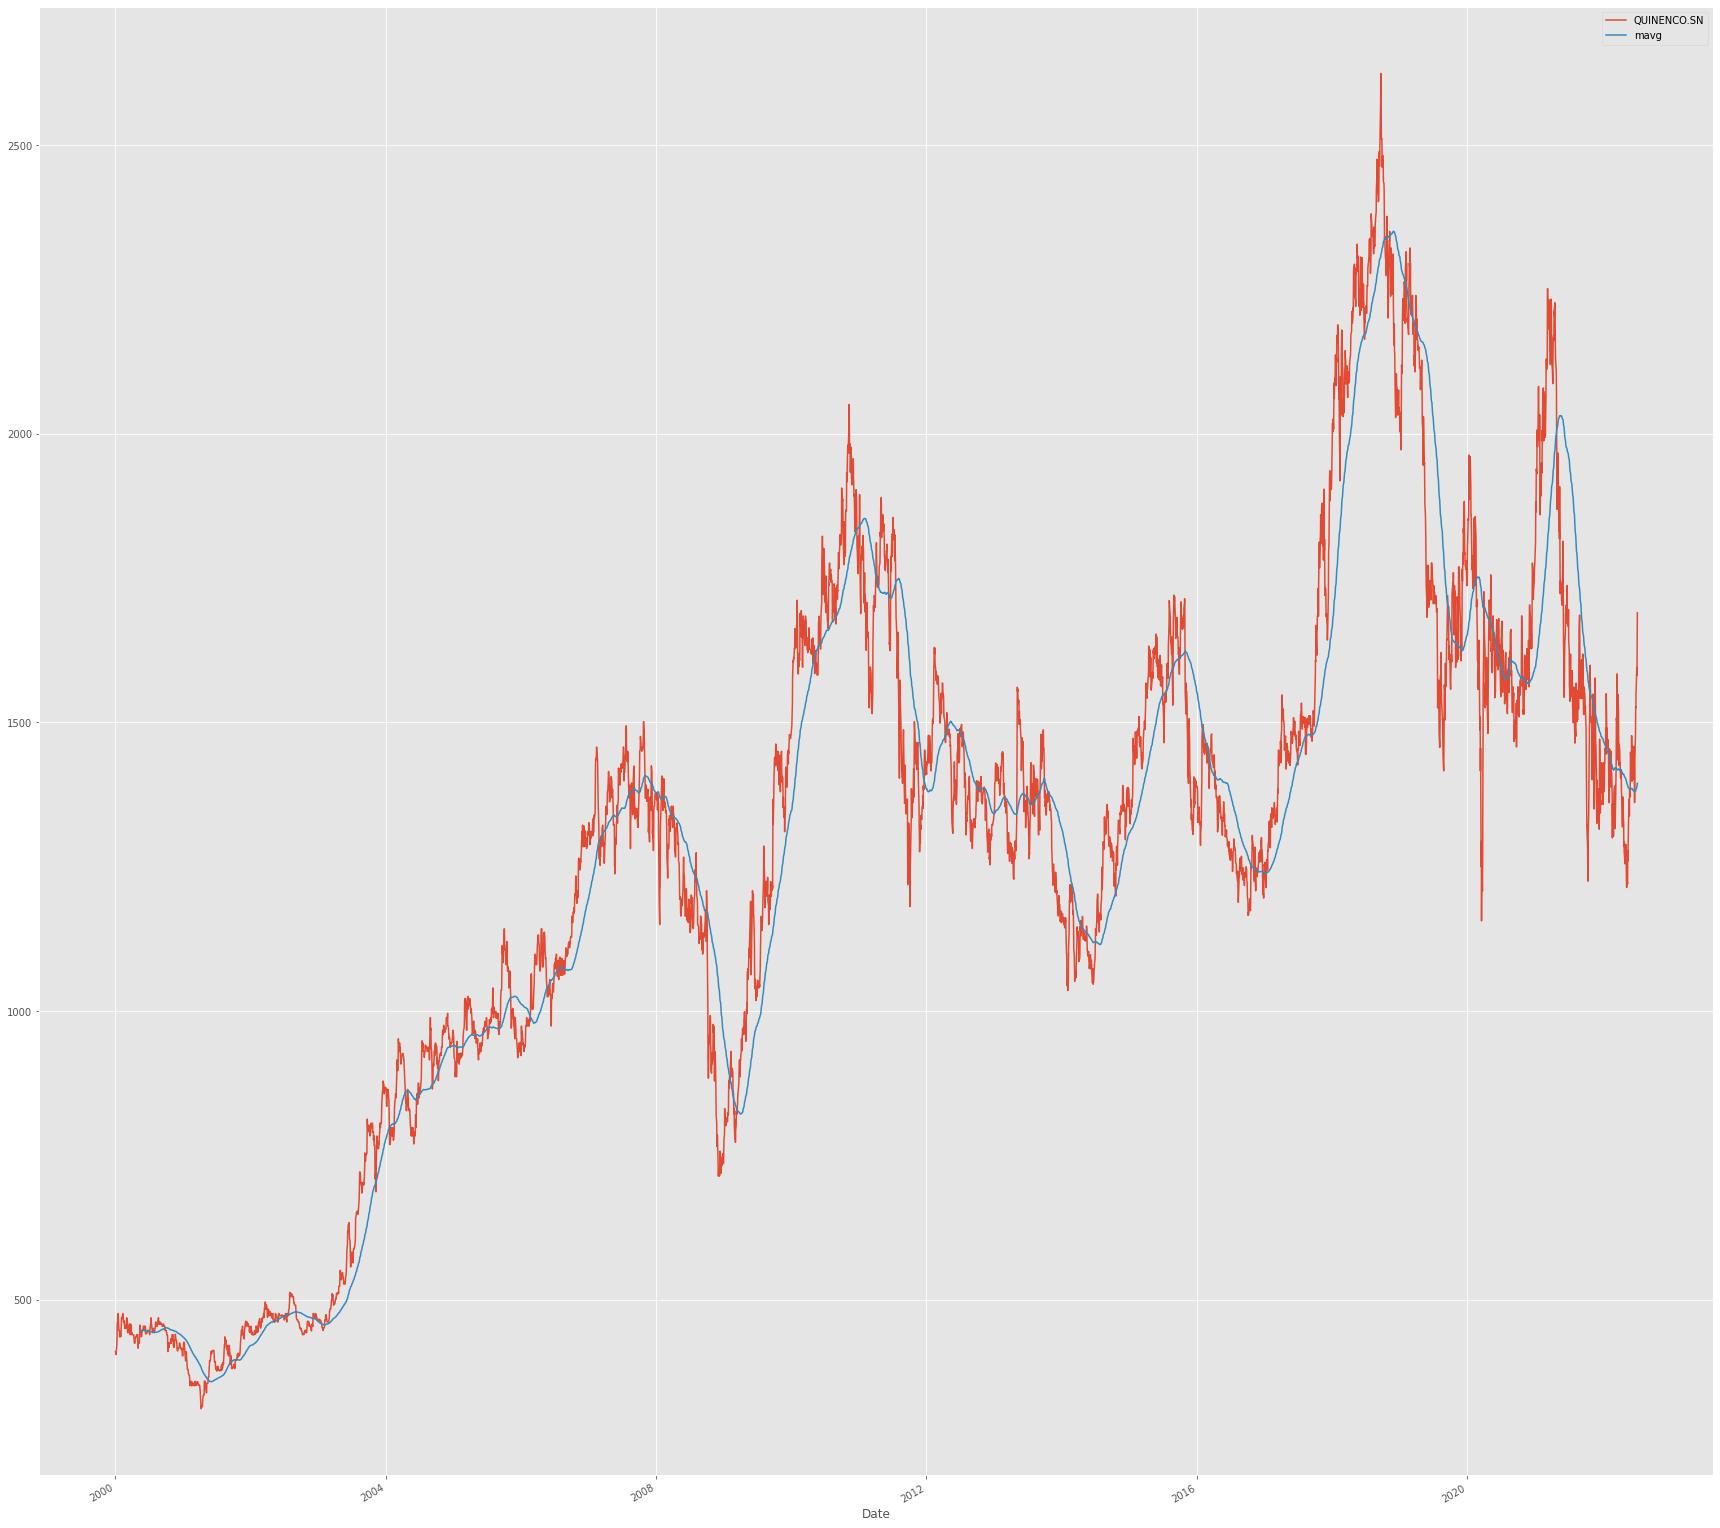

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style

# Adjusting the size of matplotlib
import matplotlib as mpl
mpl.rc('figure', figsize=(30, 30))
mpl.__version__

# Adjusting the style of matplotlib
style.use('ggplot')

close_px.plot(label=accion_predecir)
mavg.plot(label='mavg')
plt.legend()

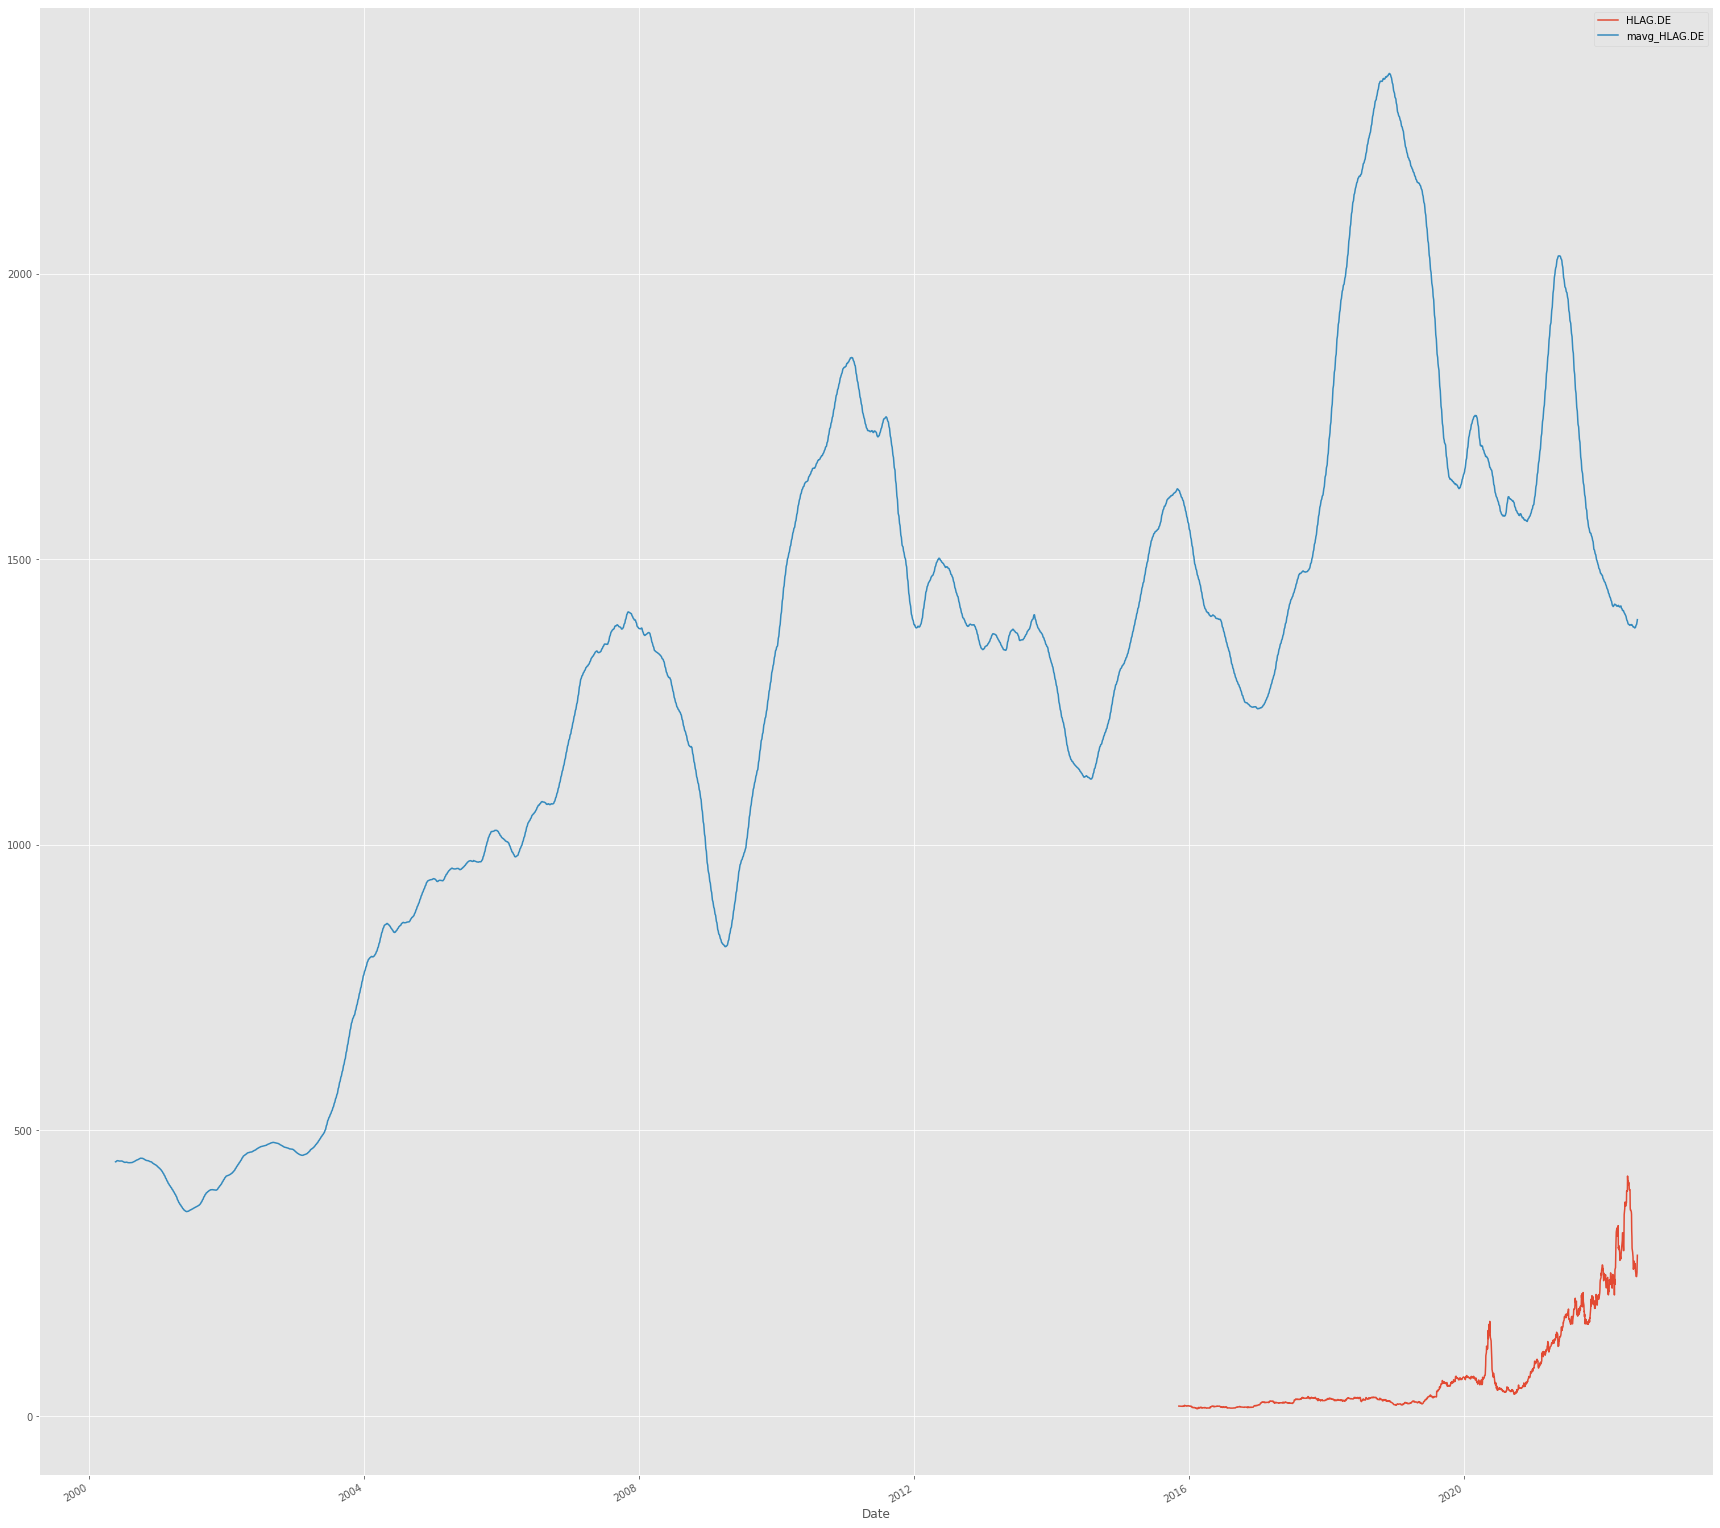

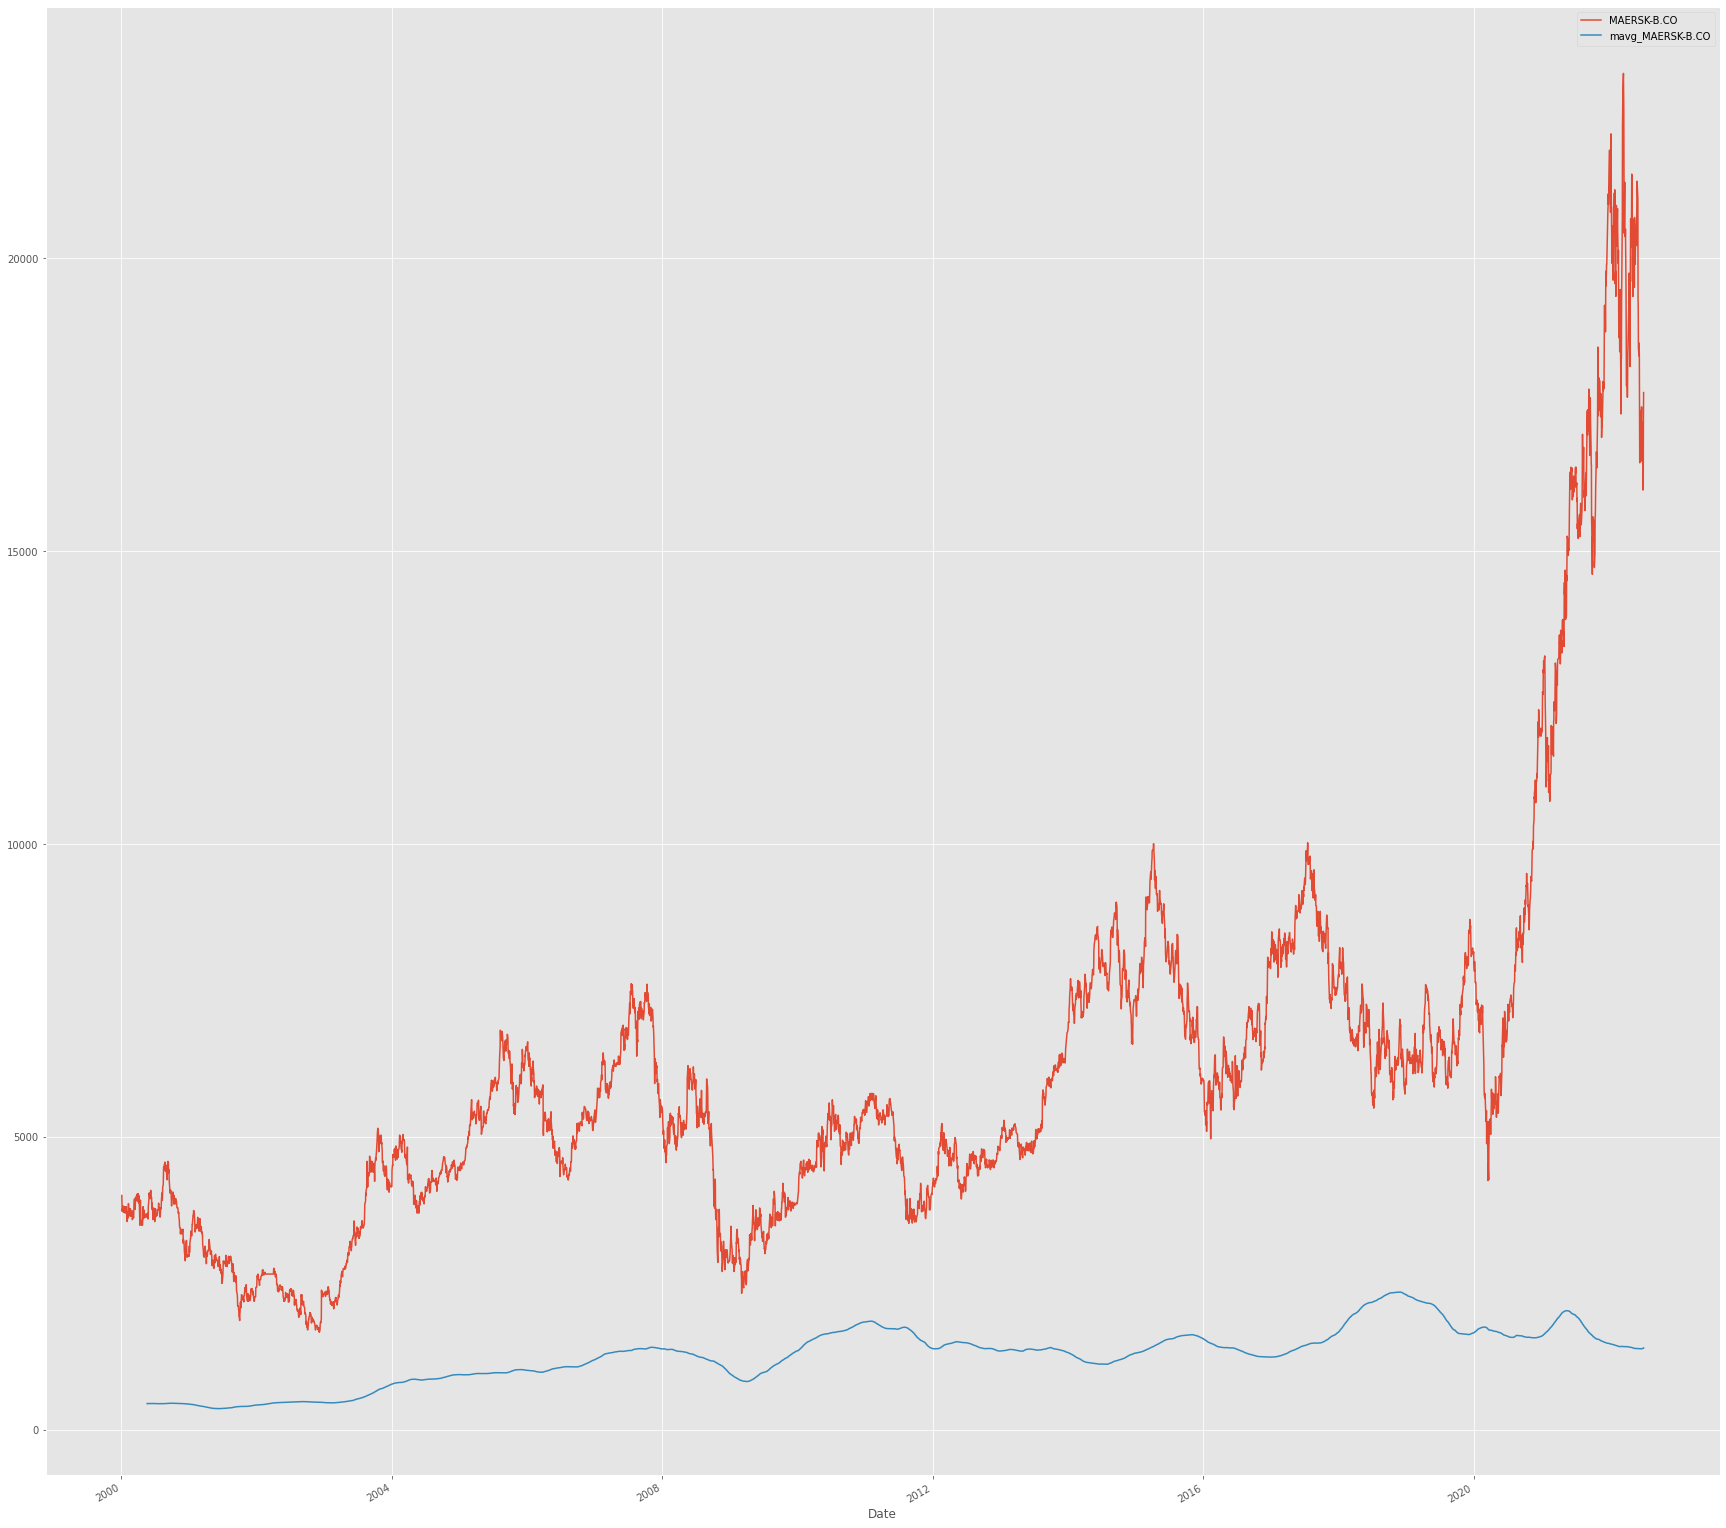

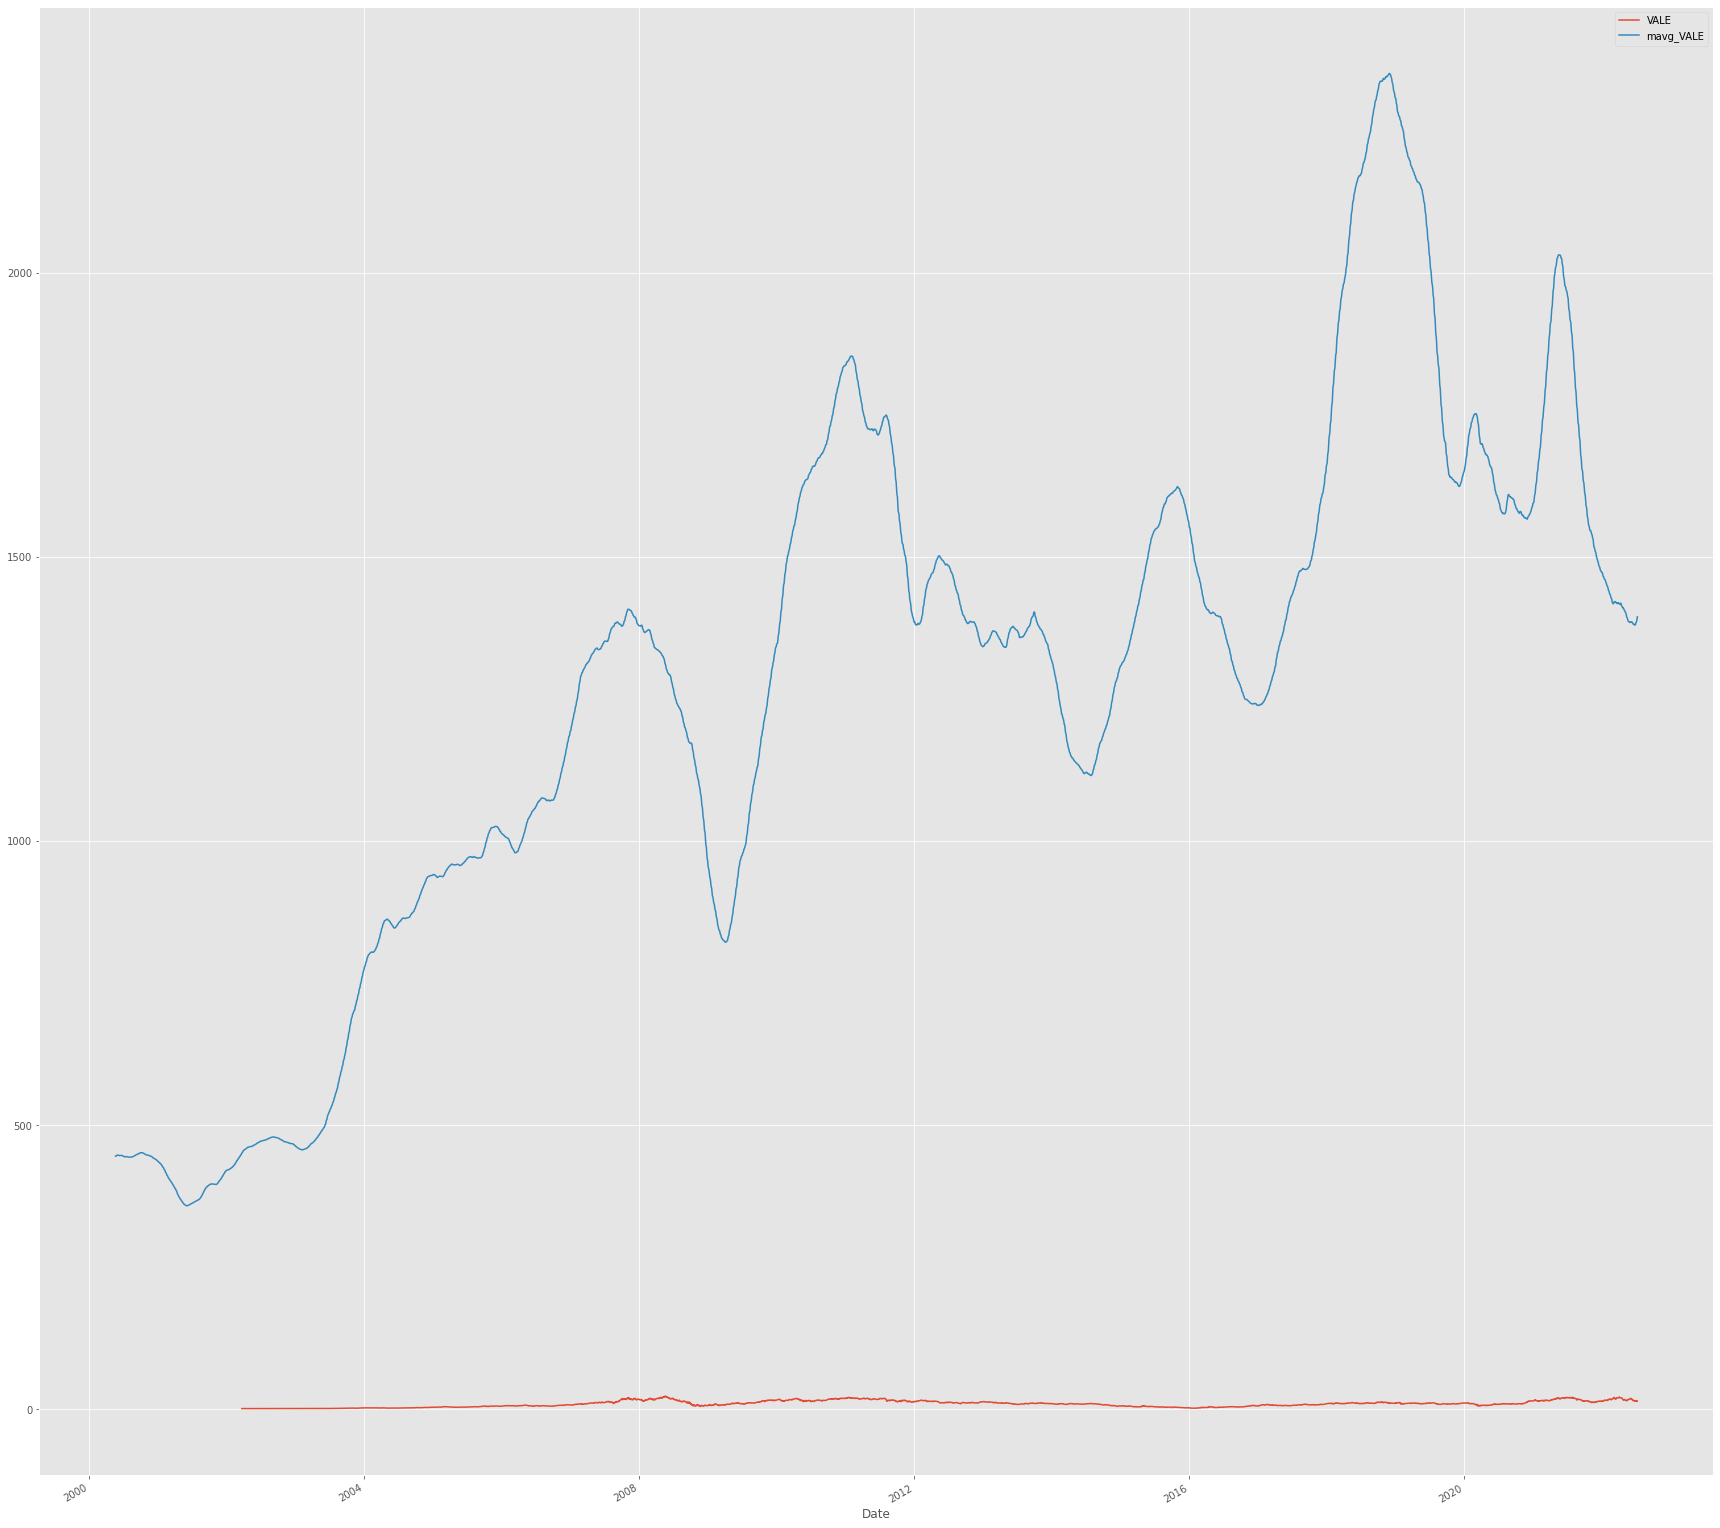

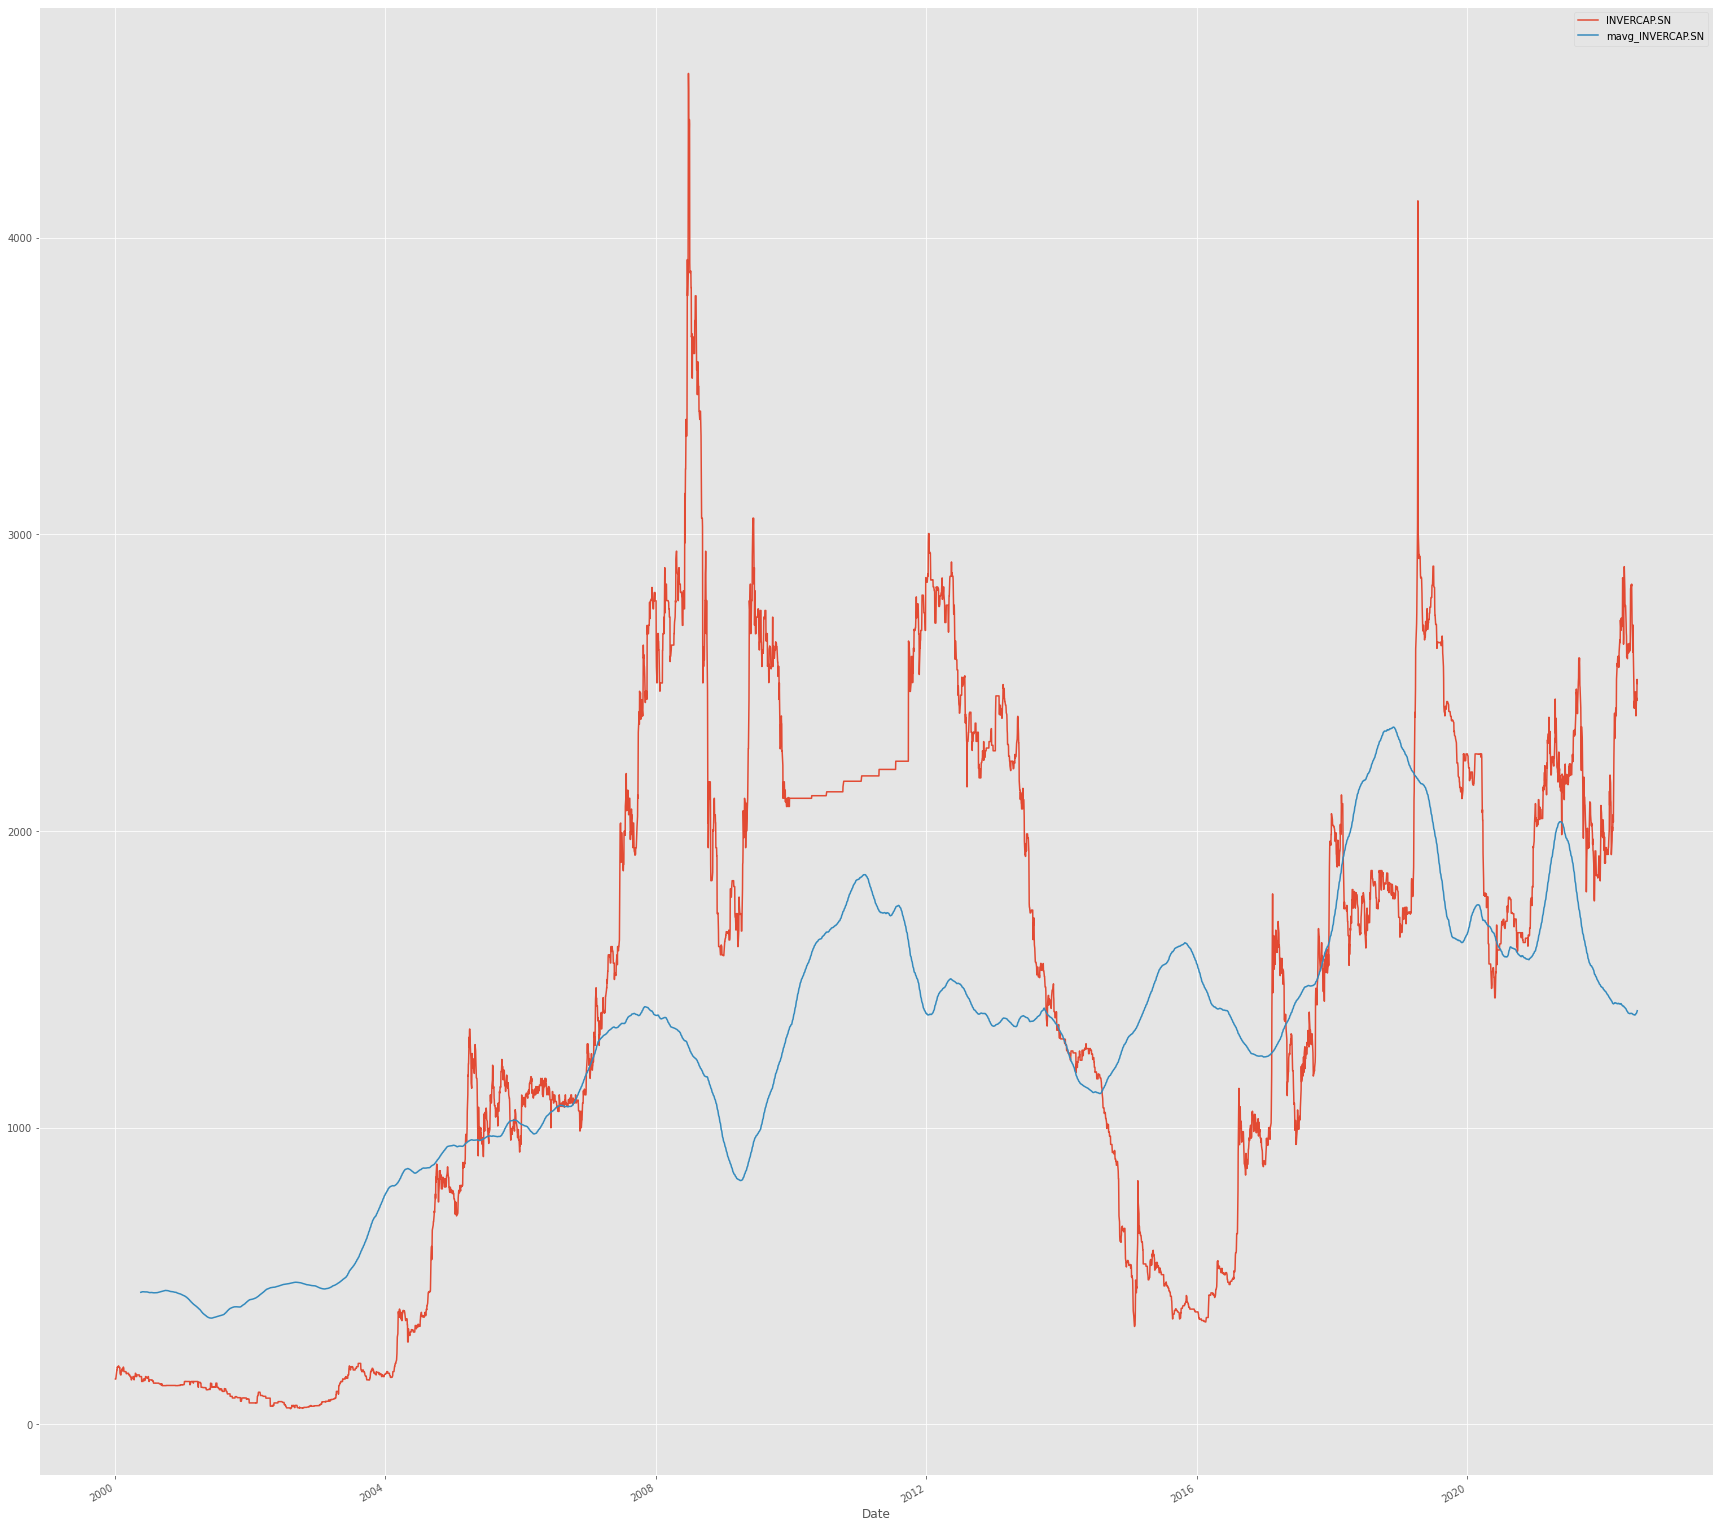

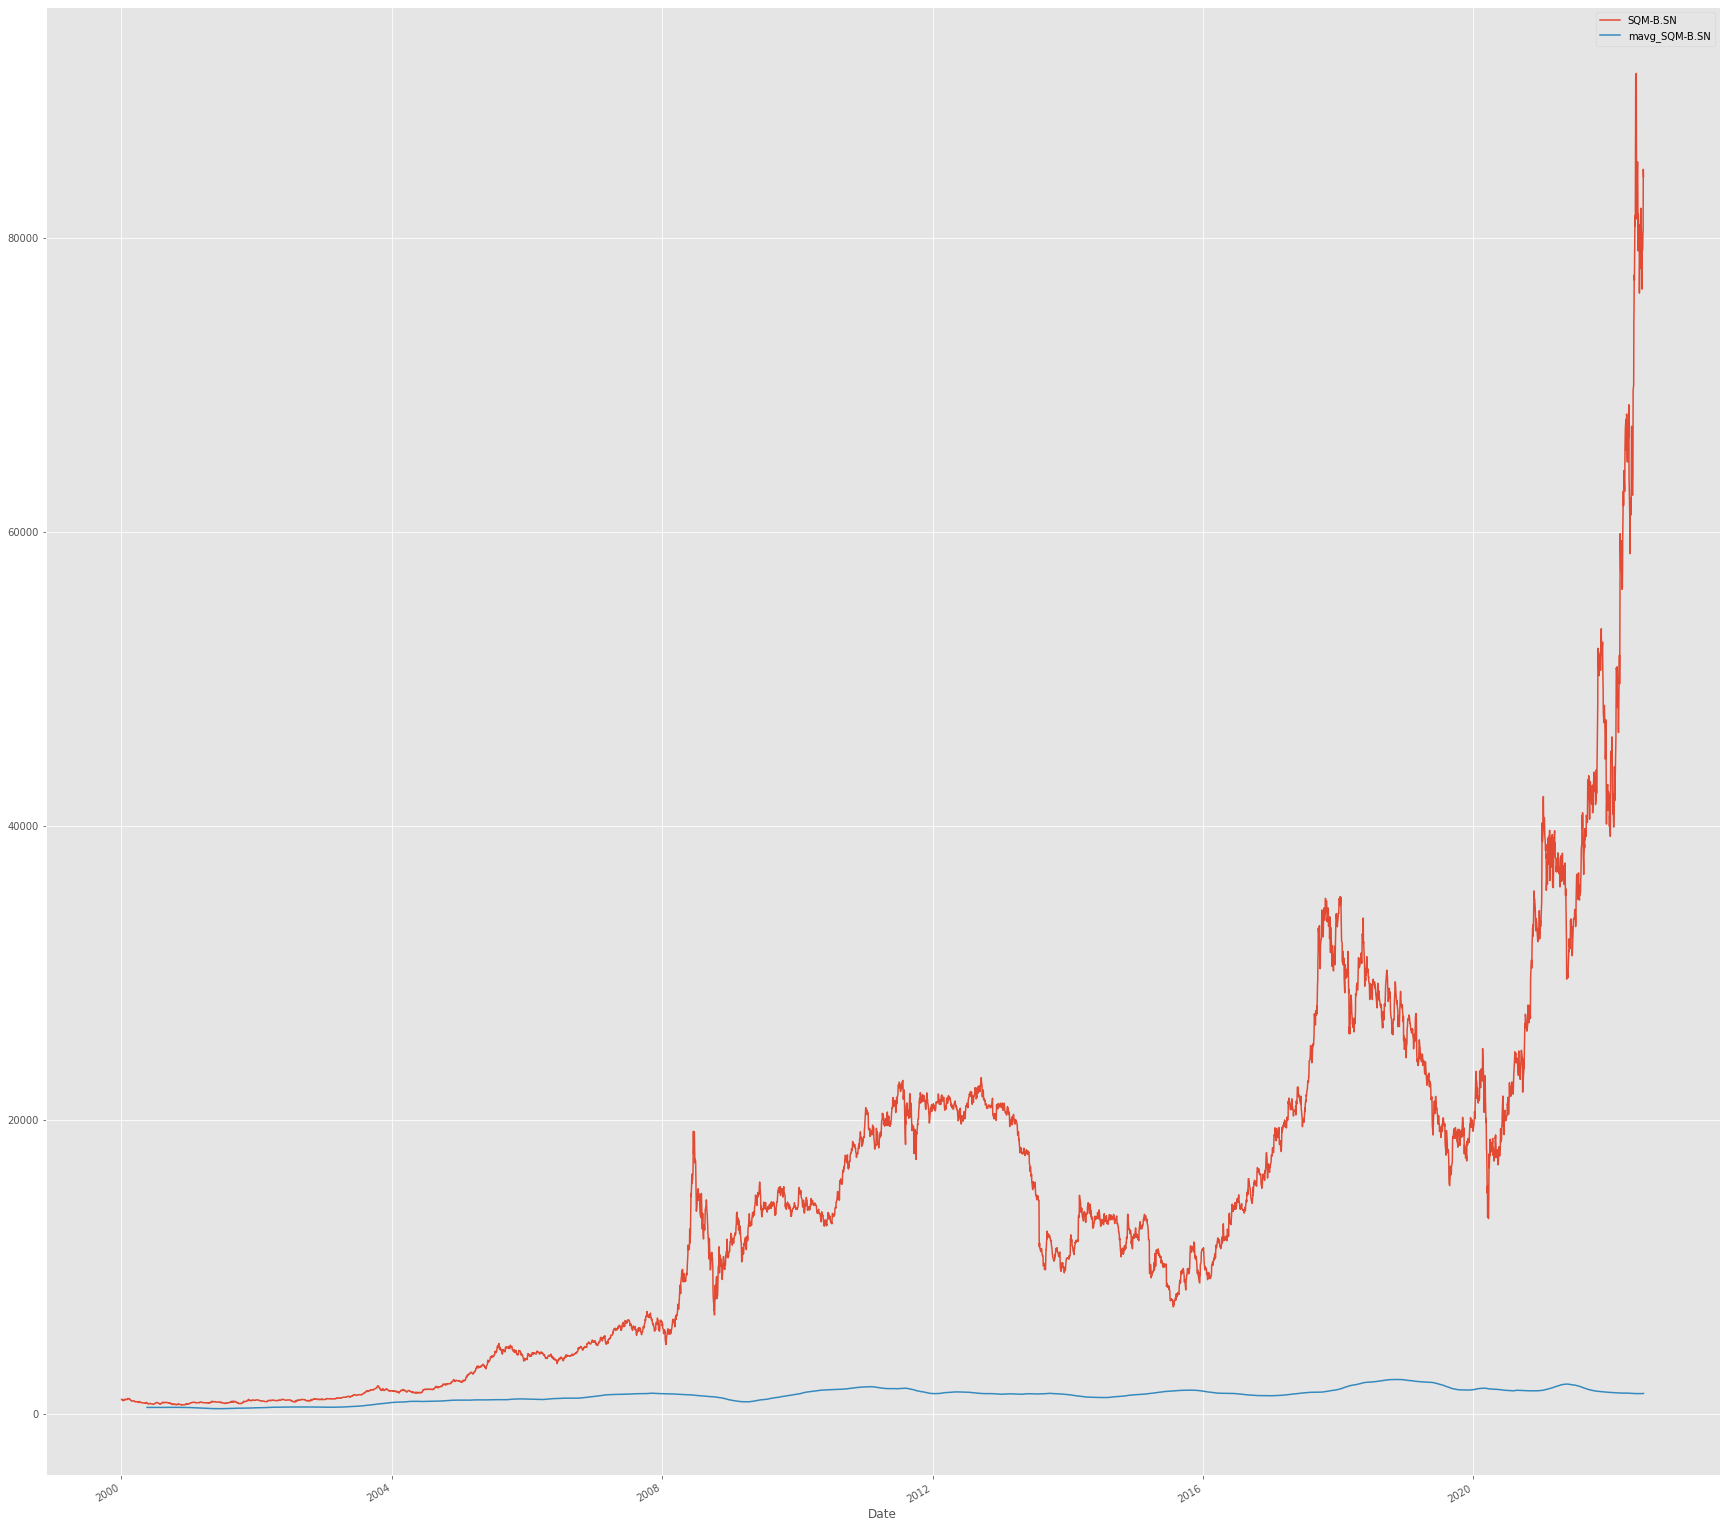

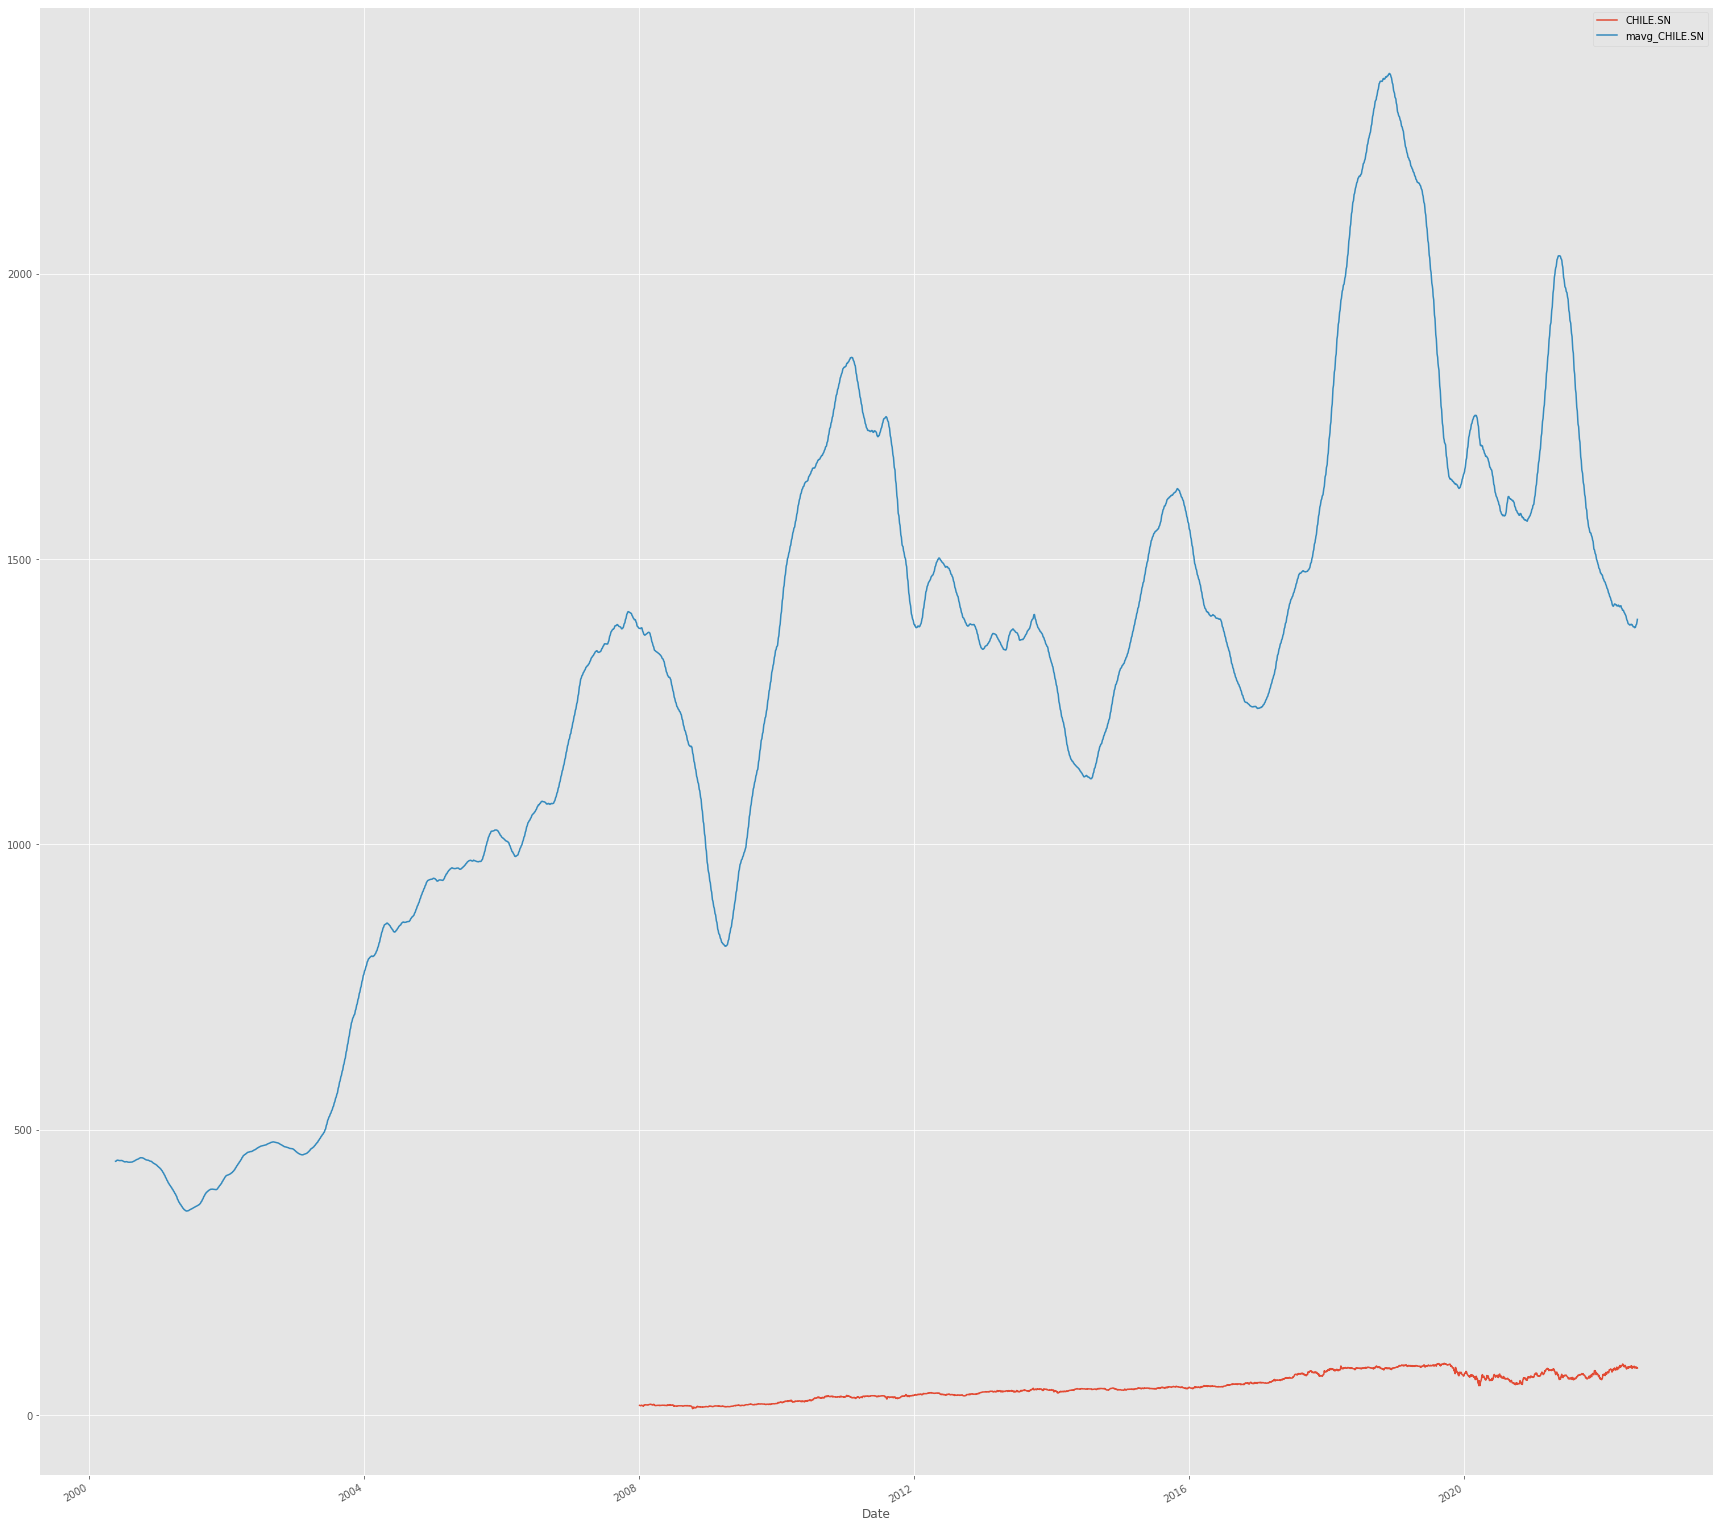

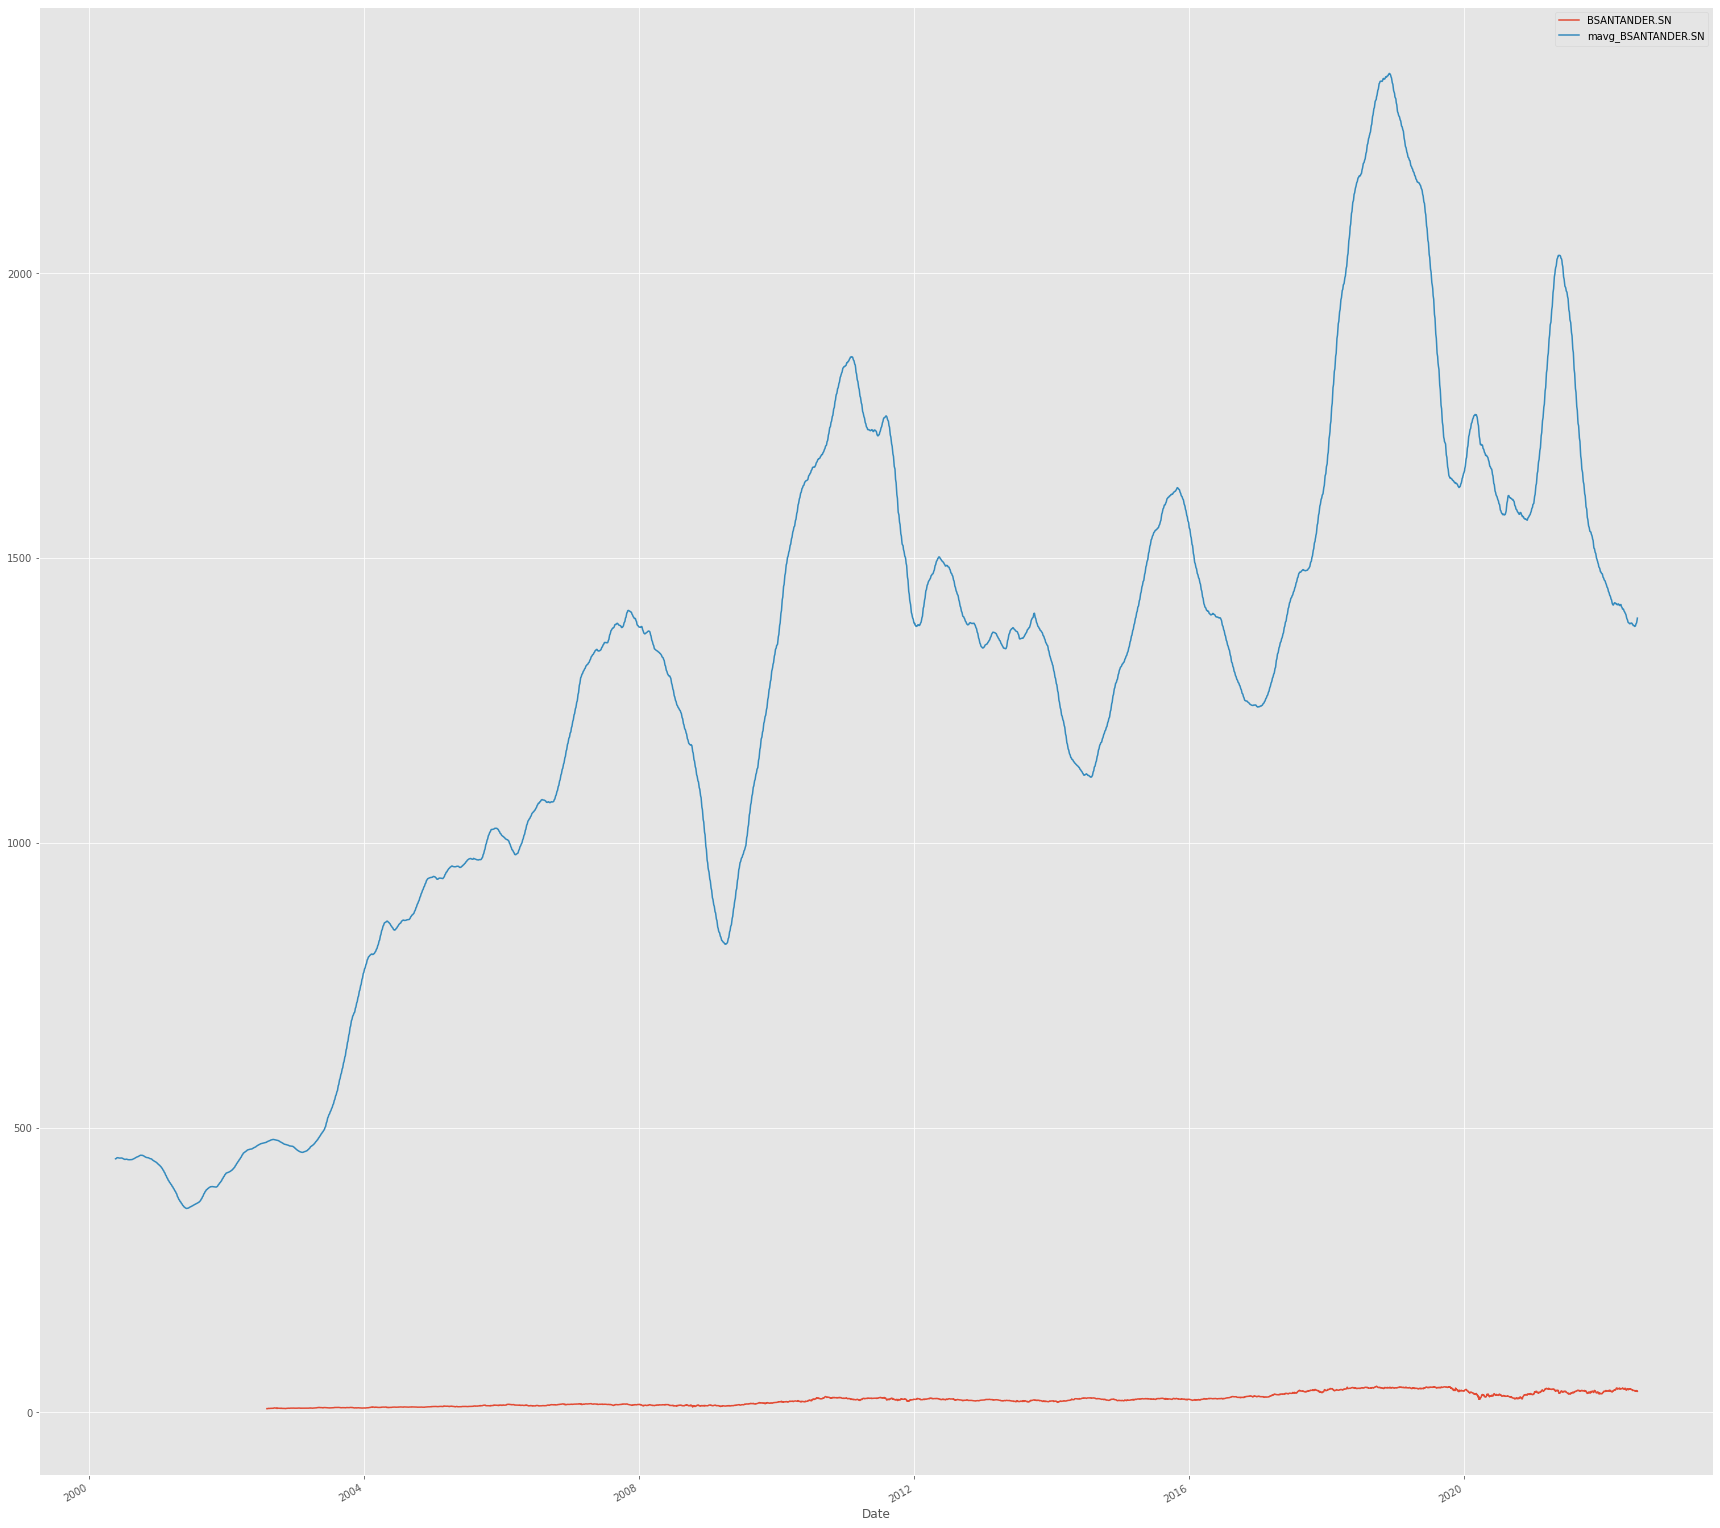

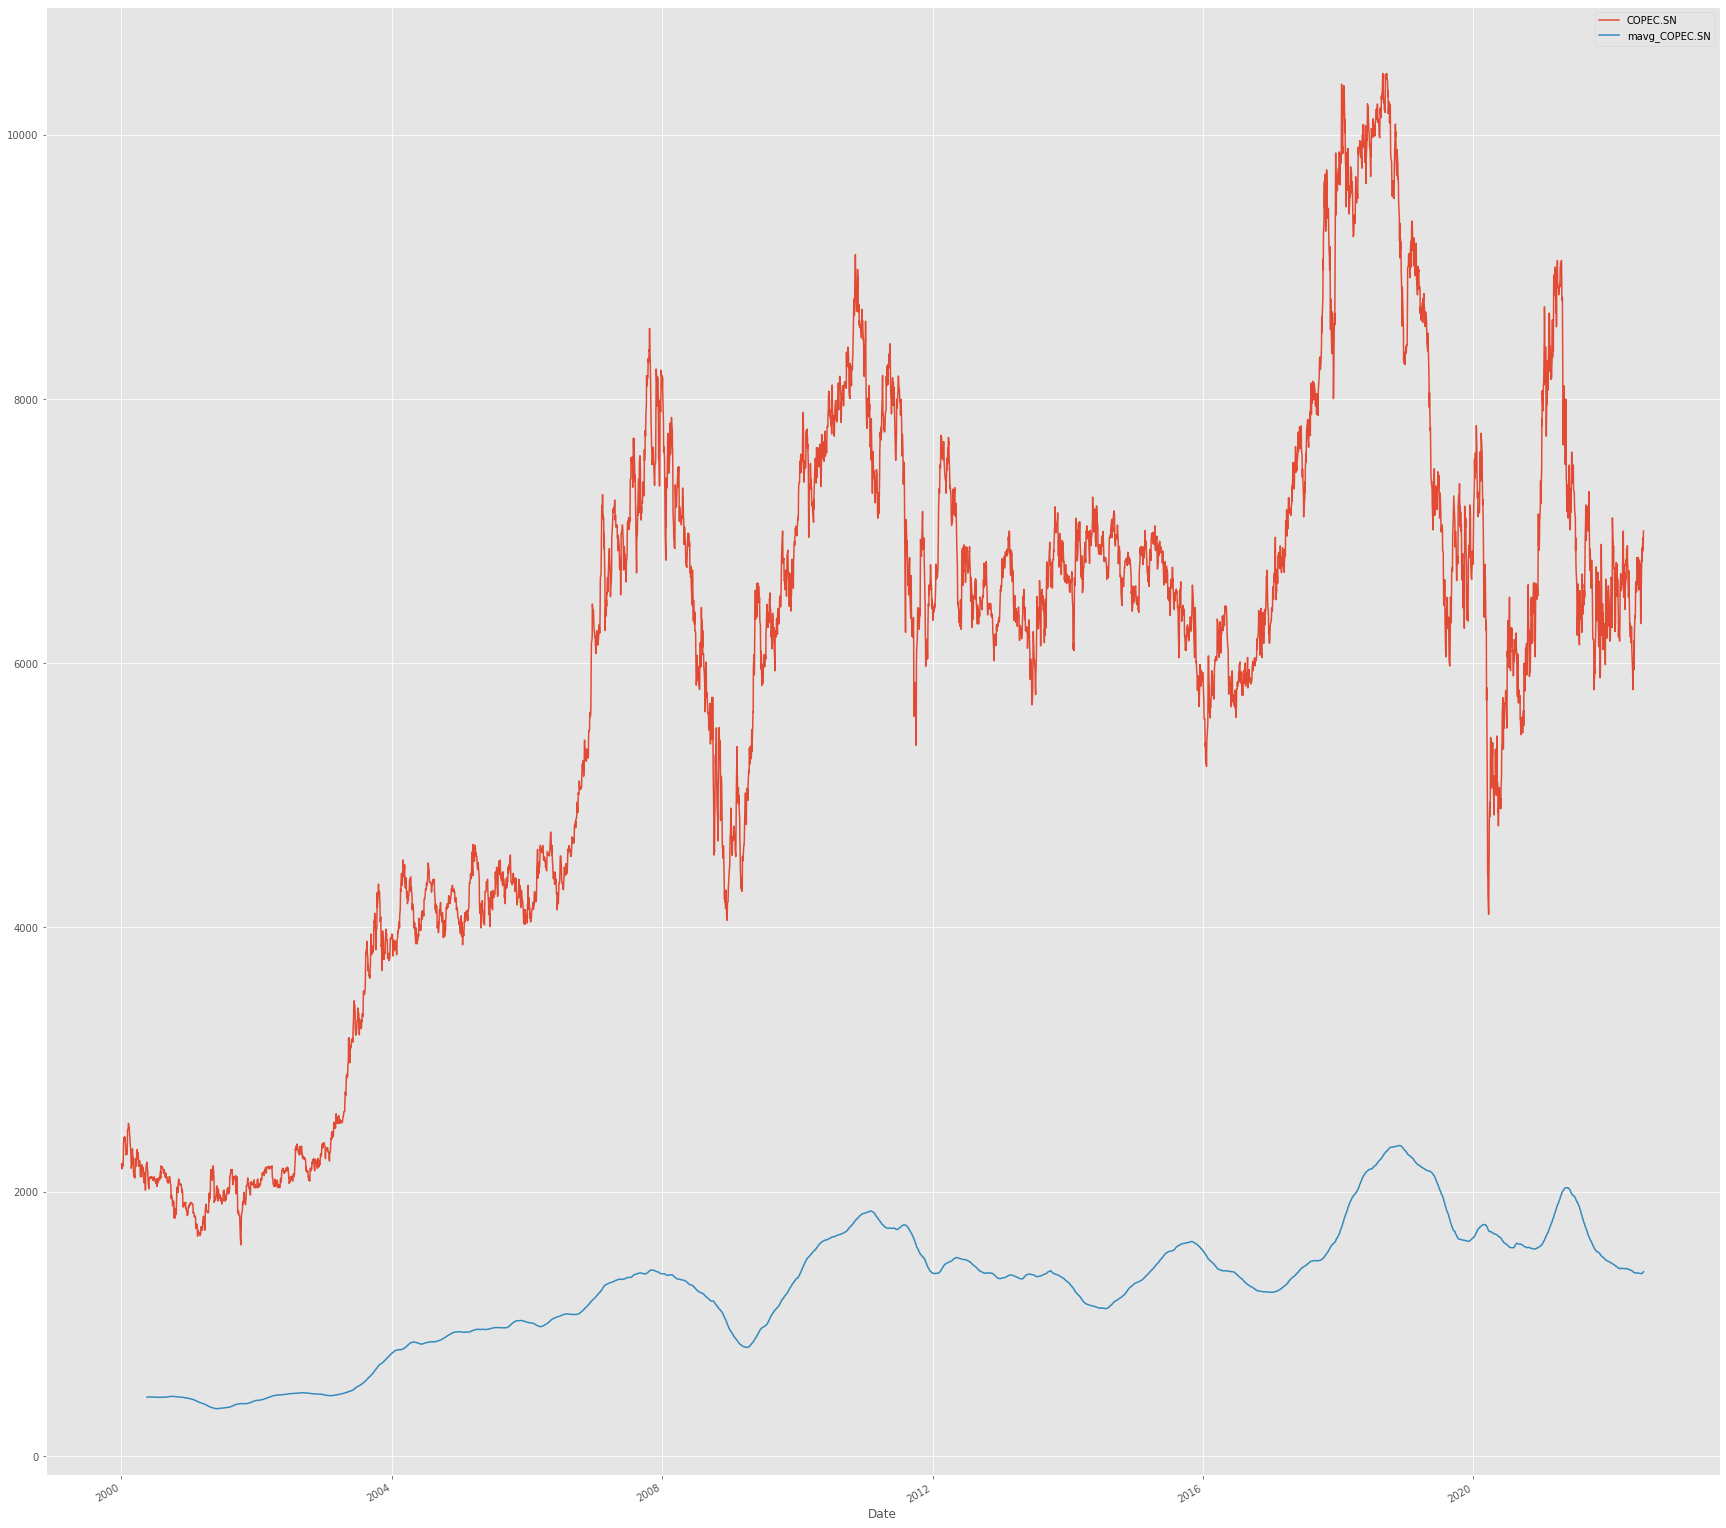

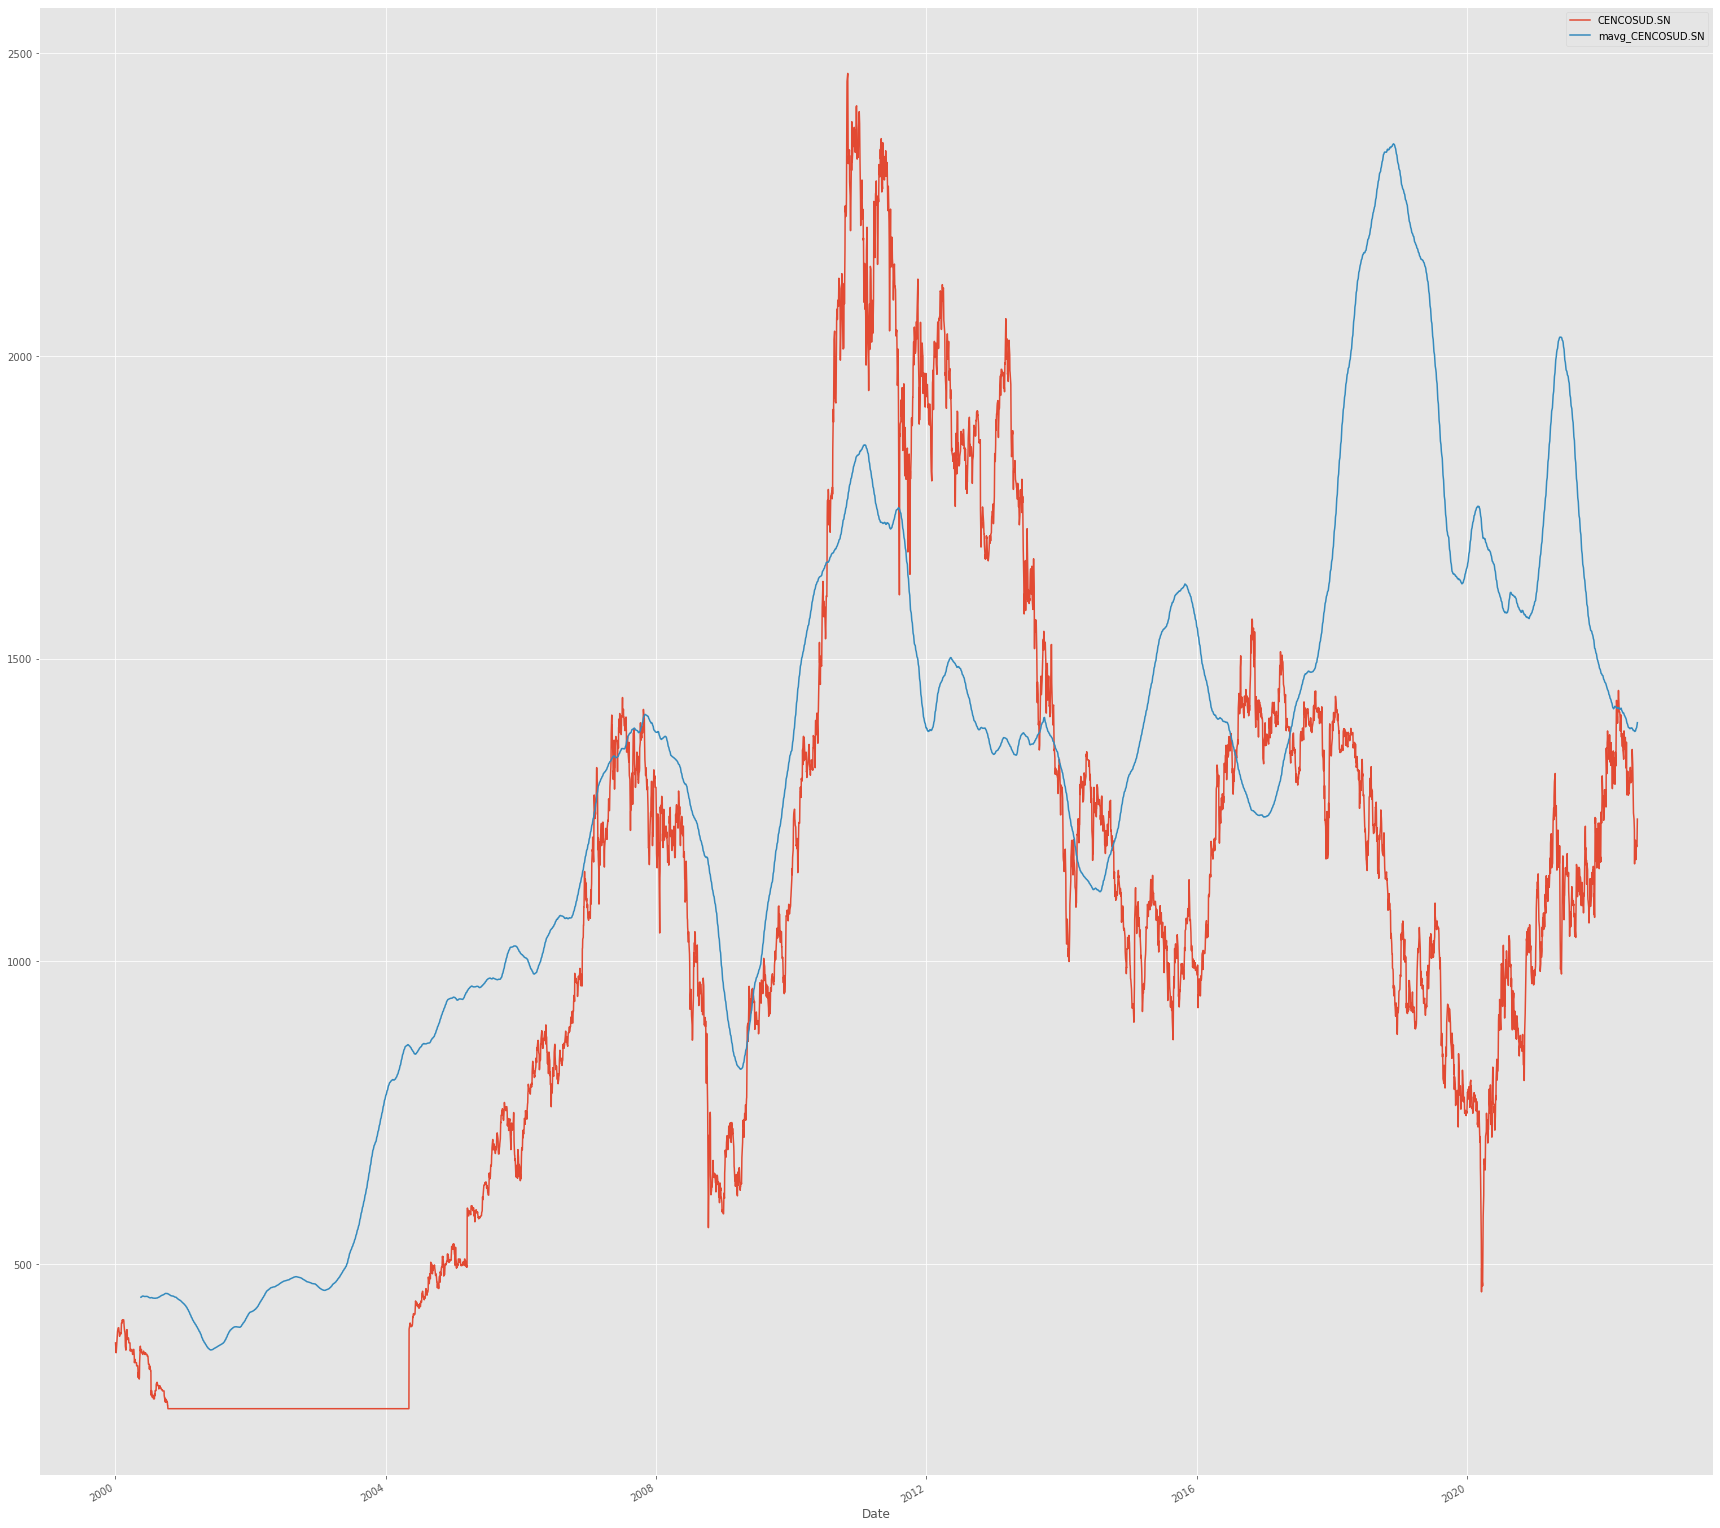

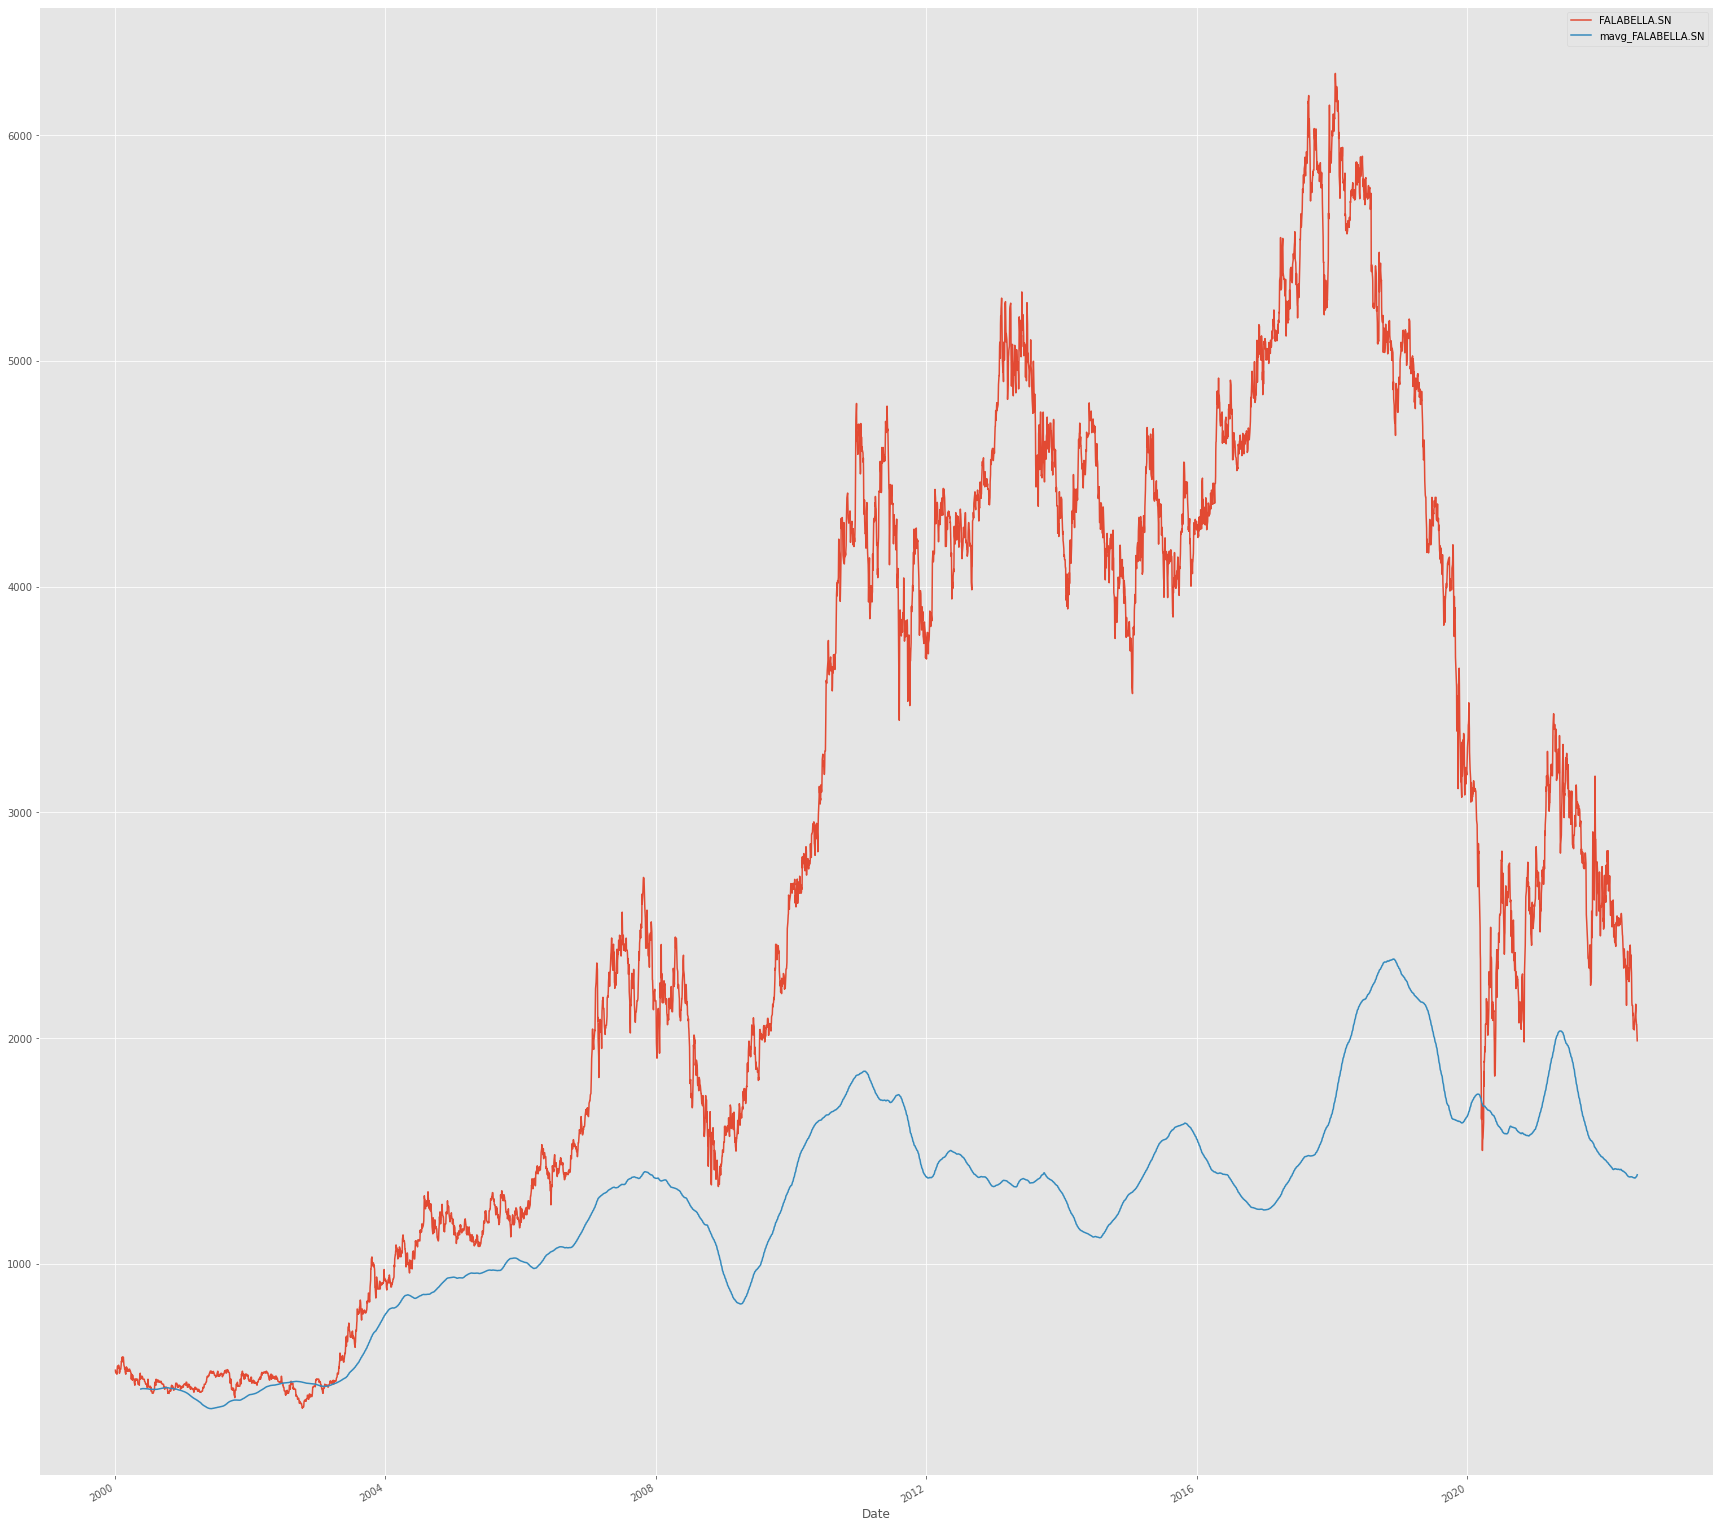

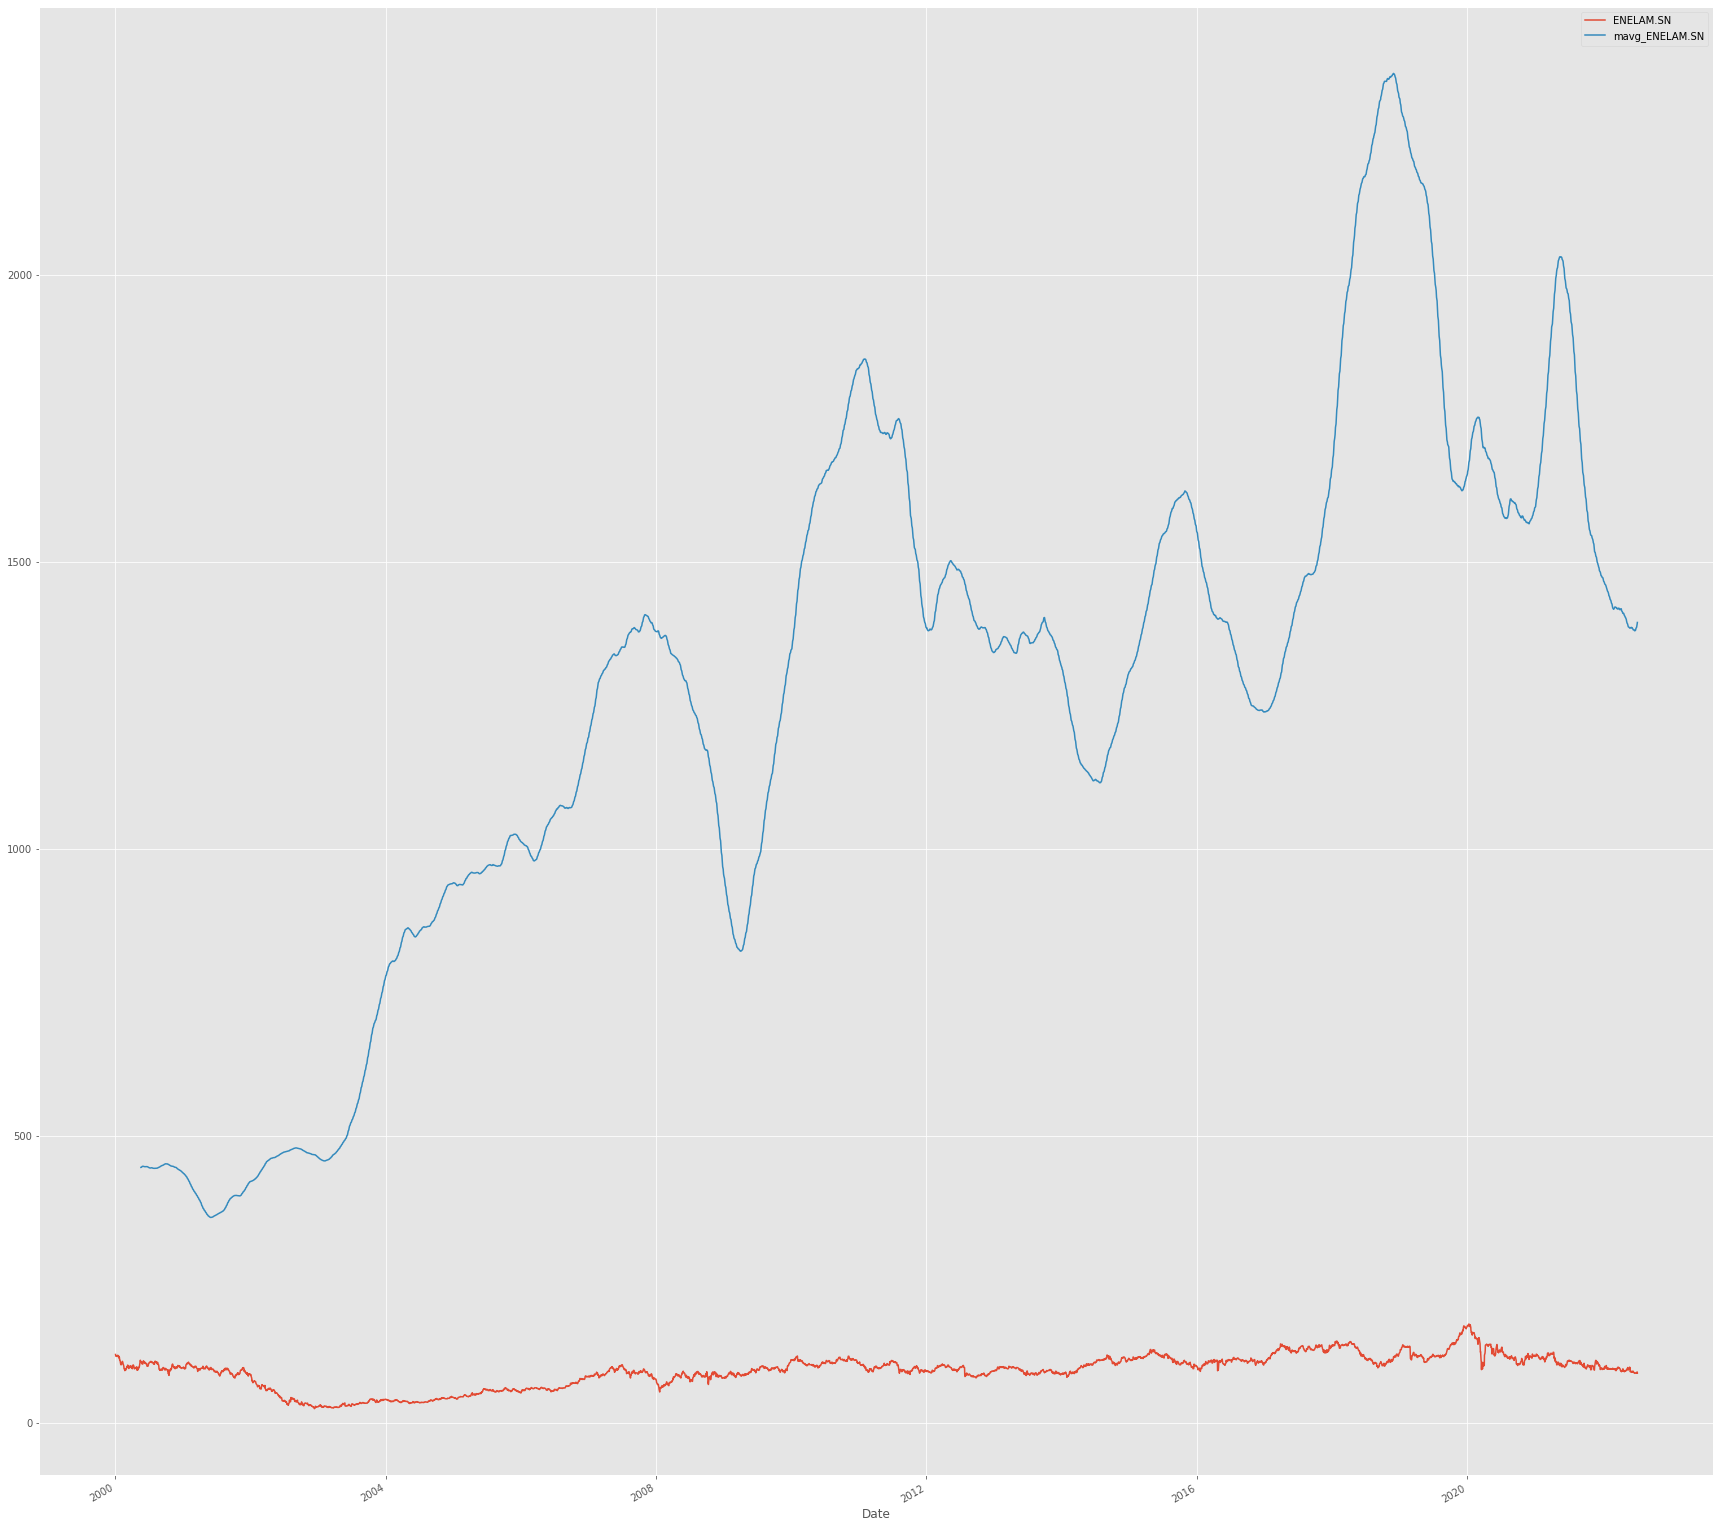

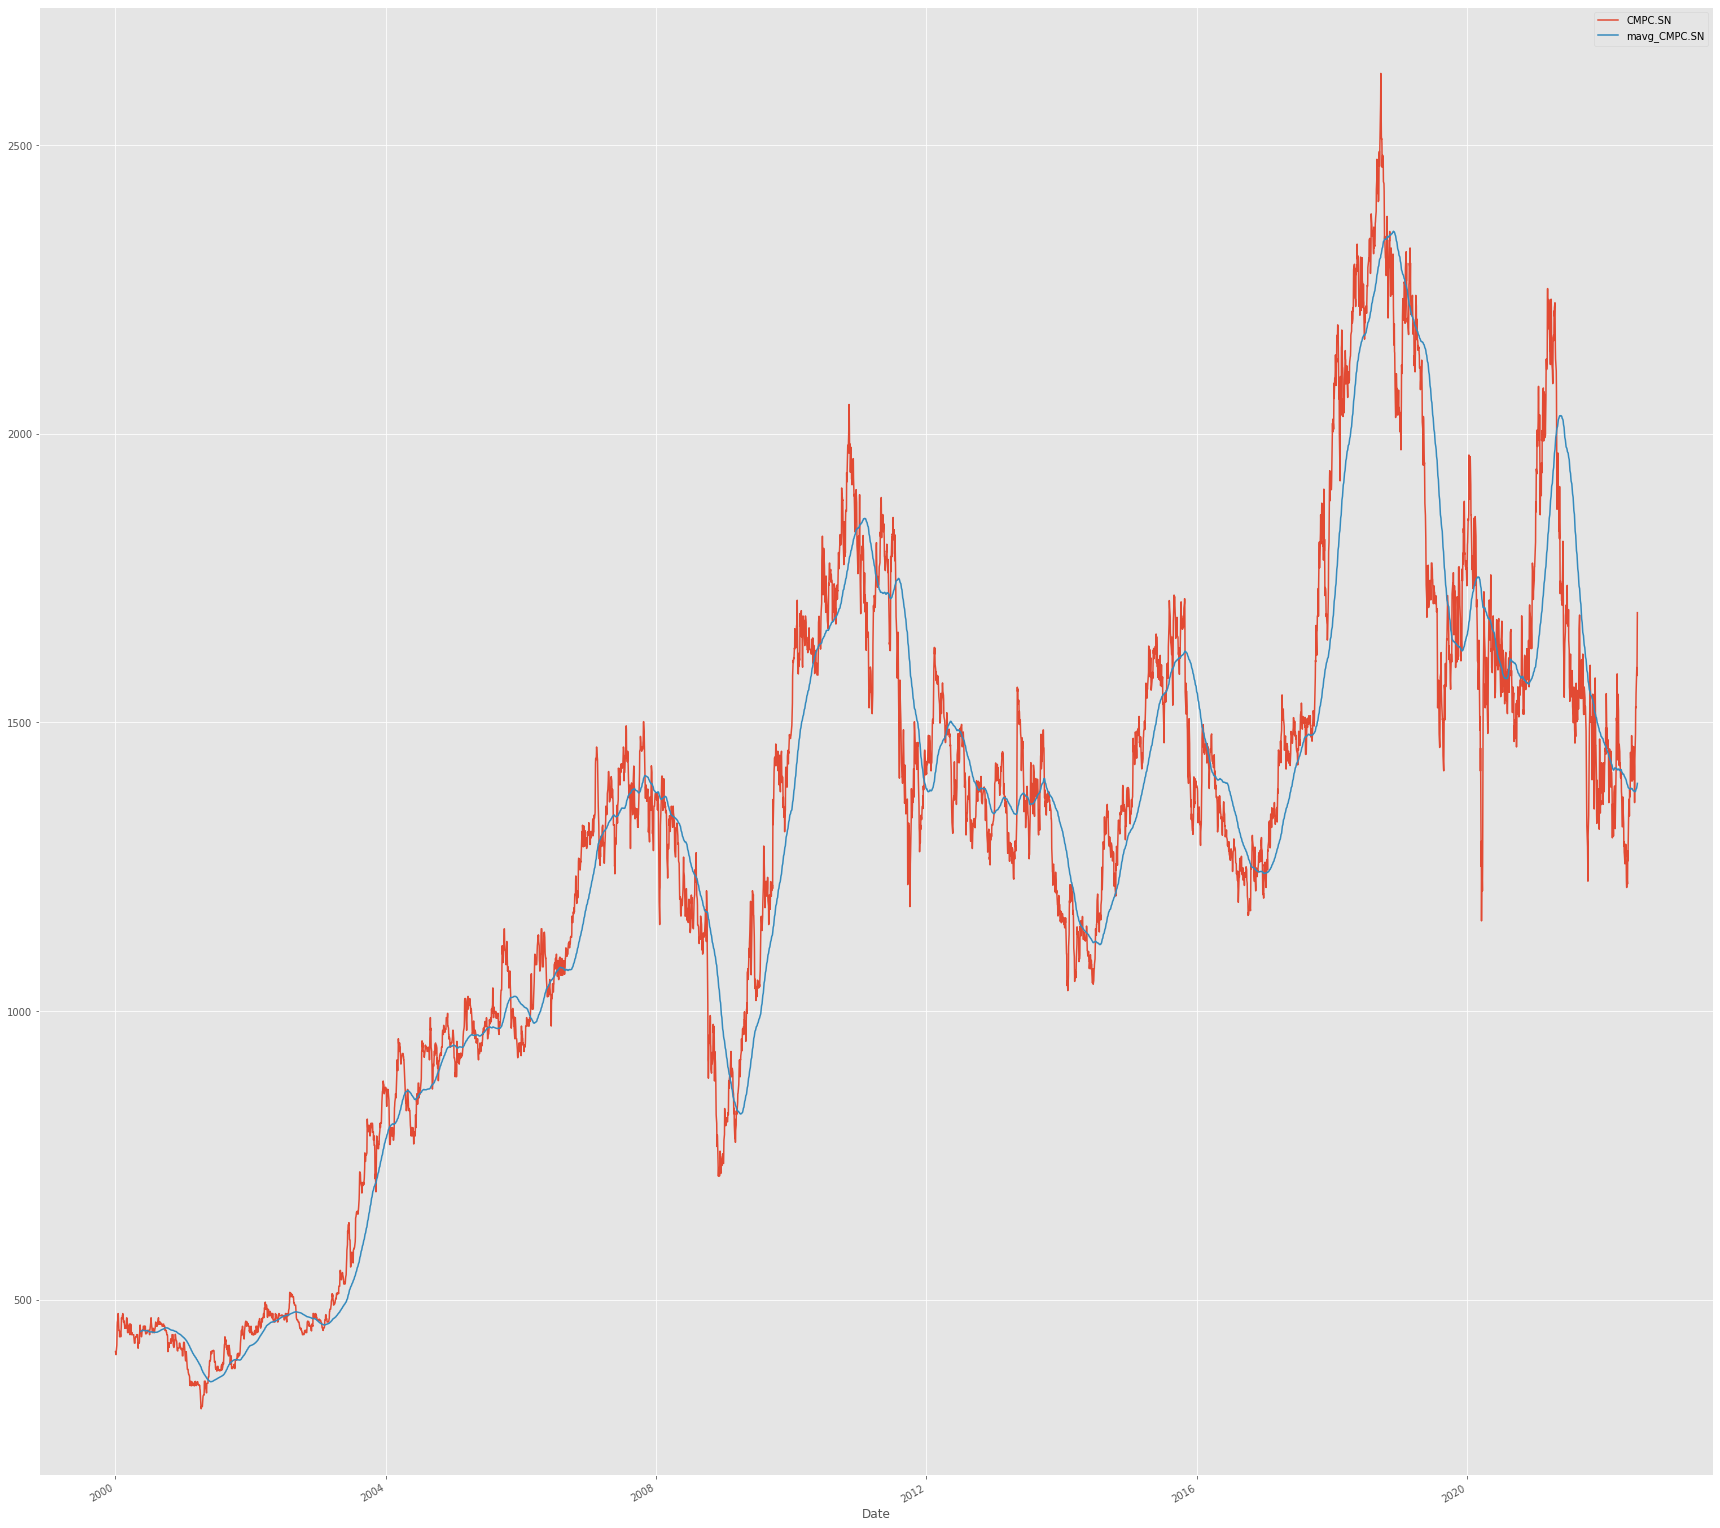

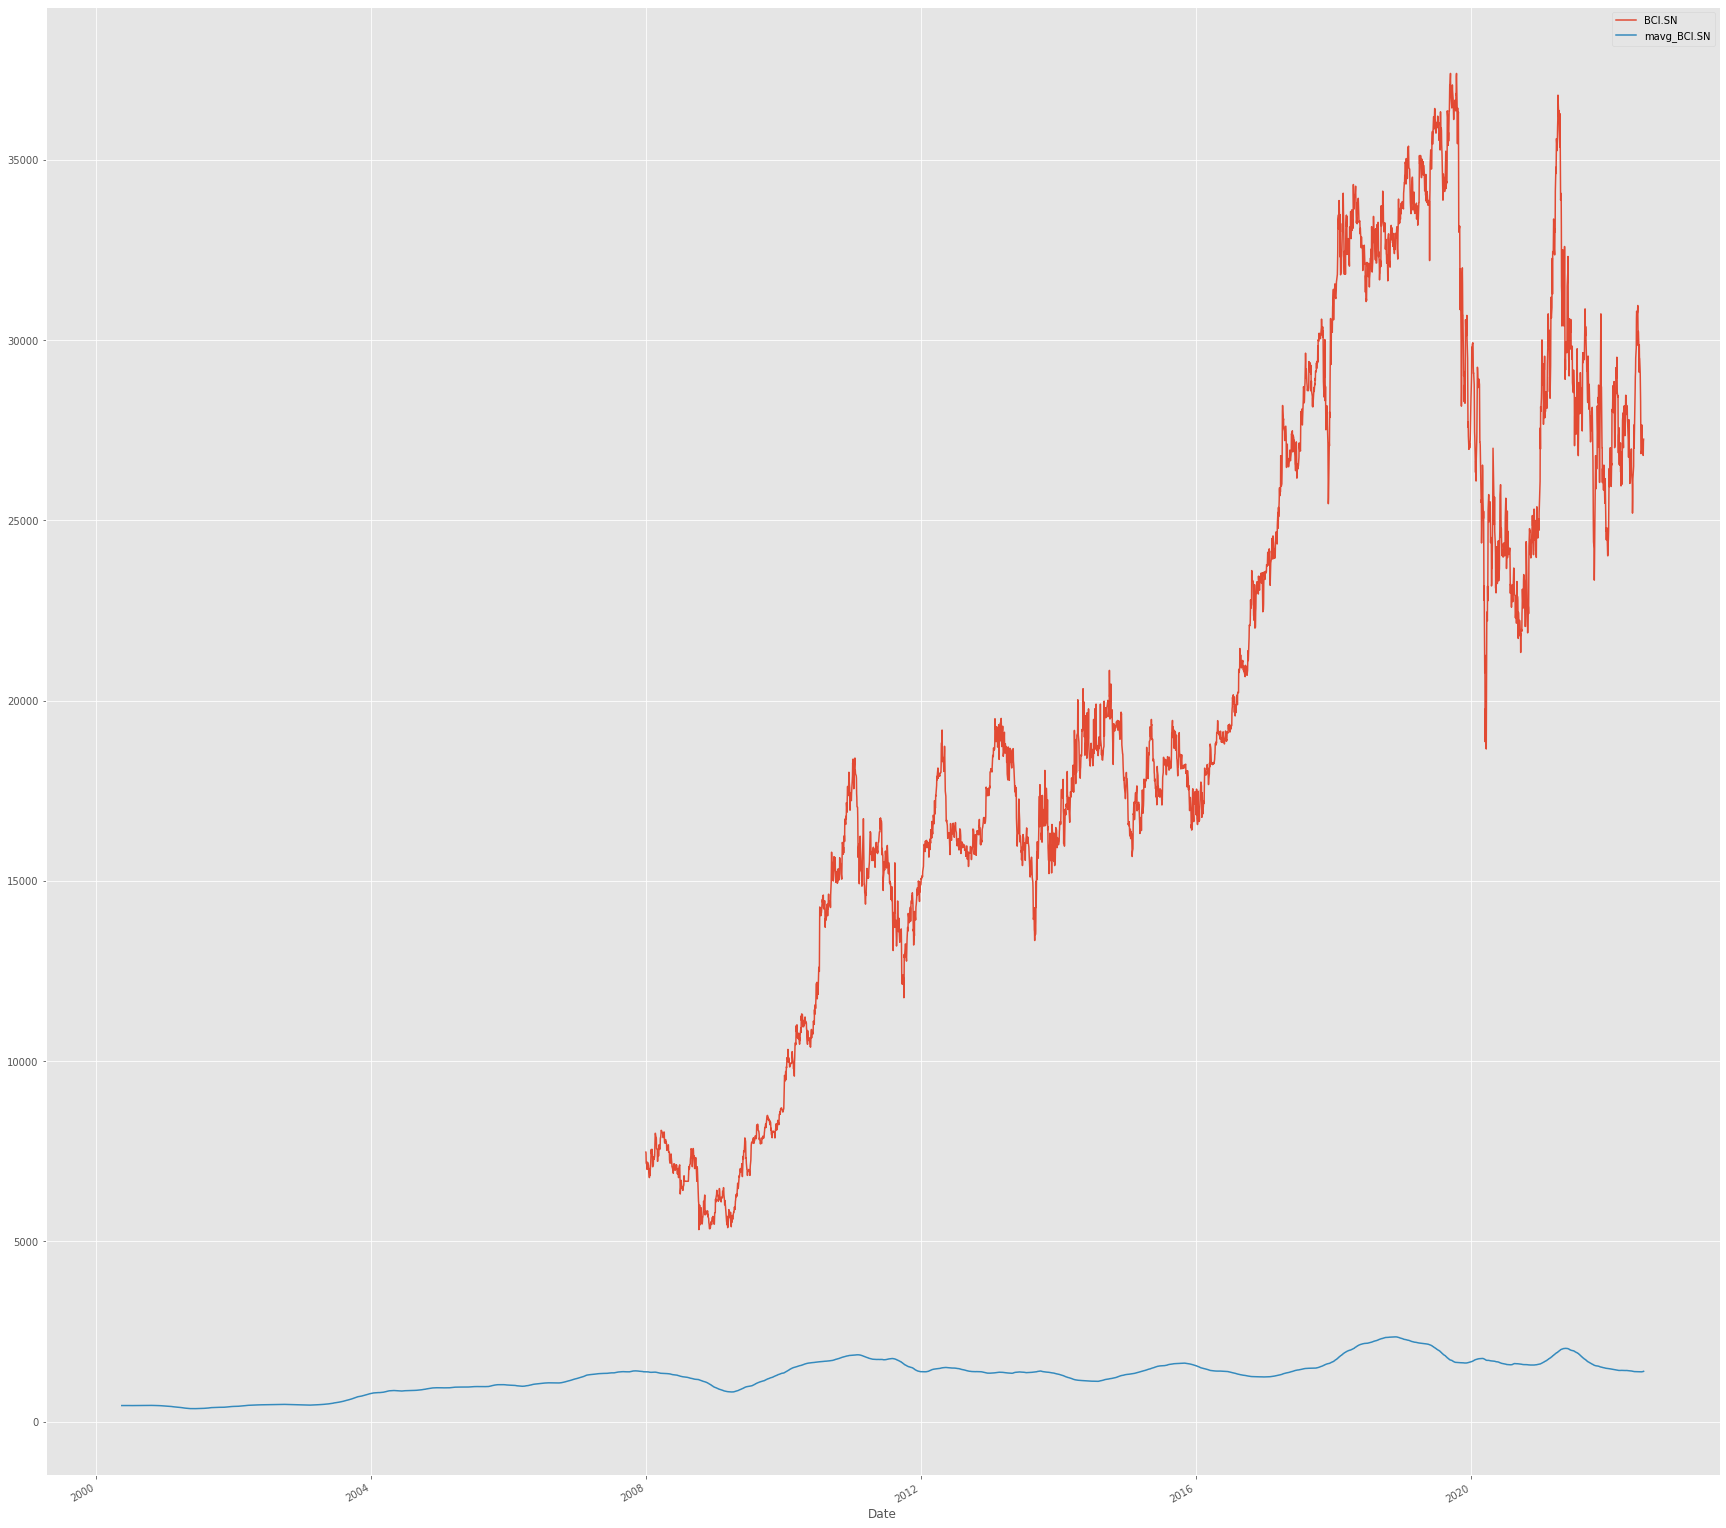

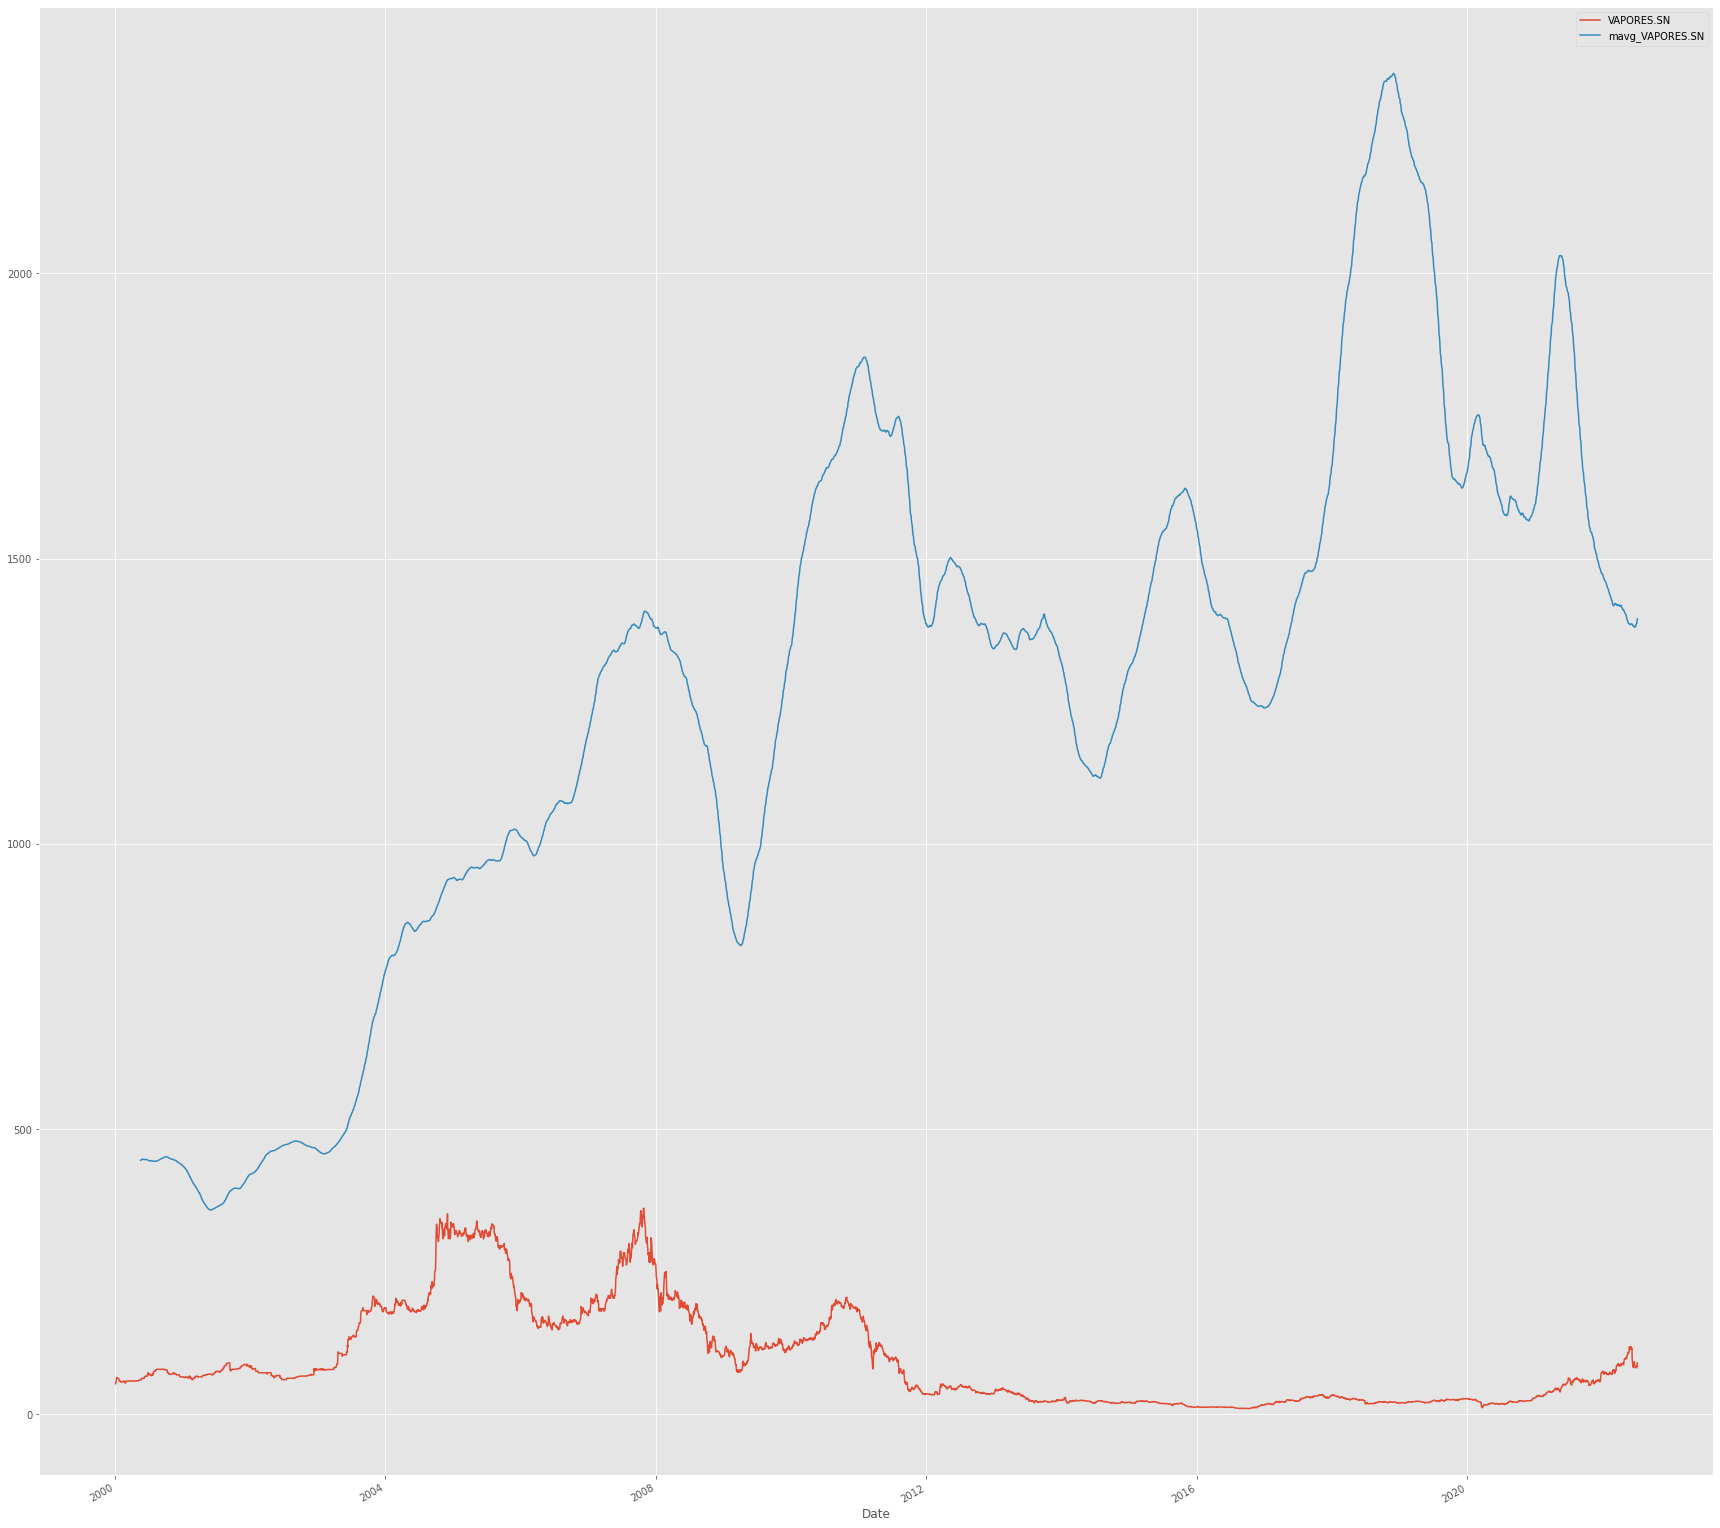

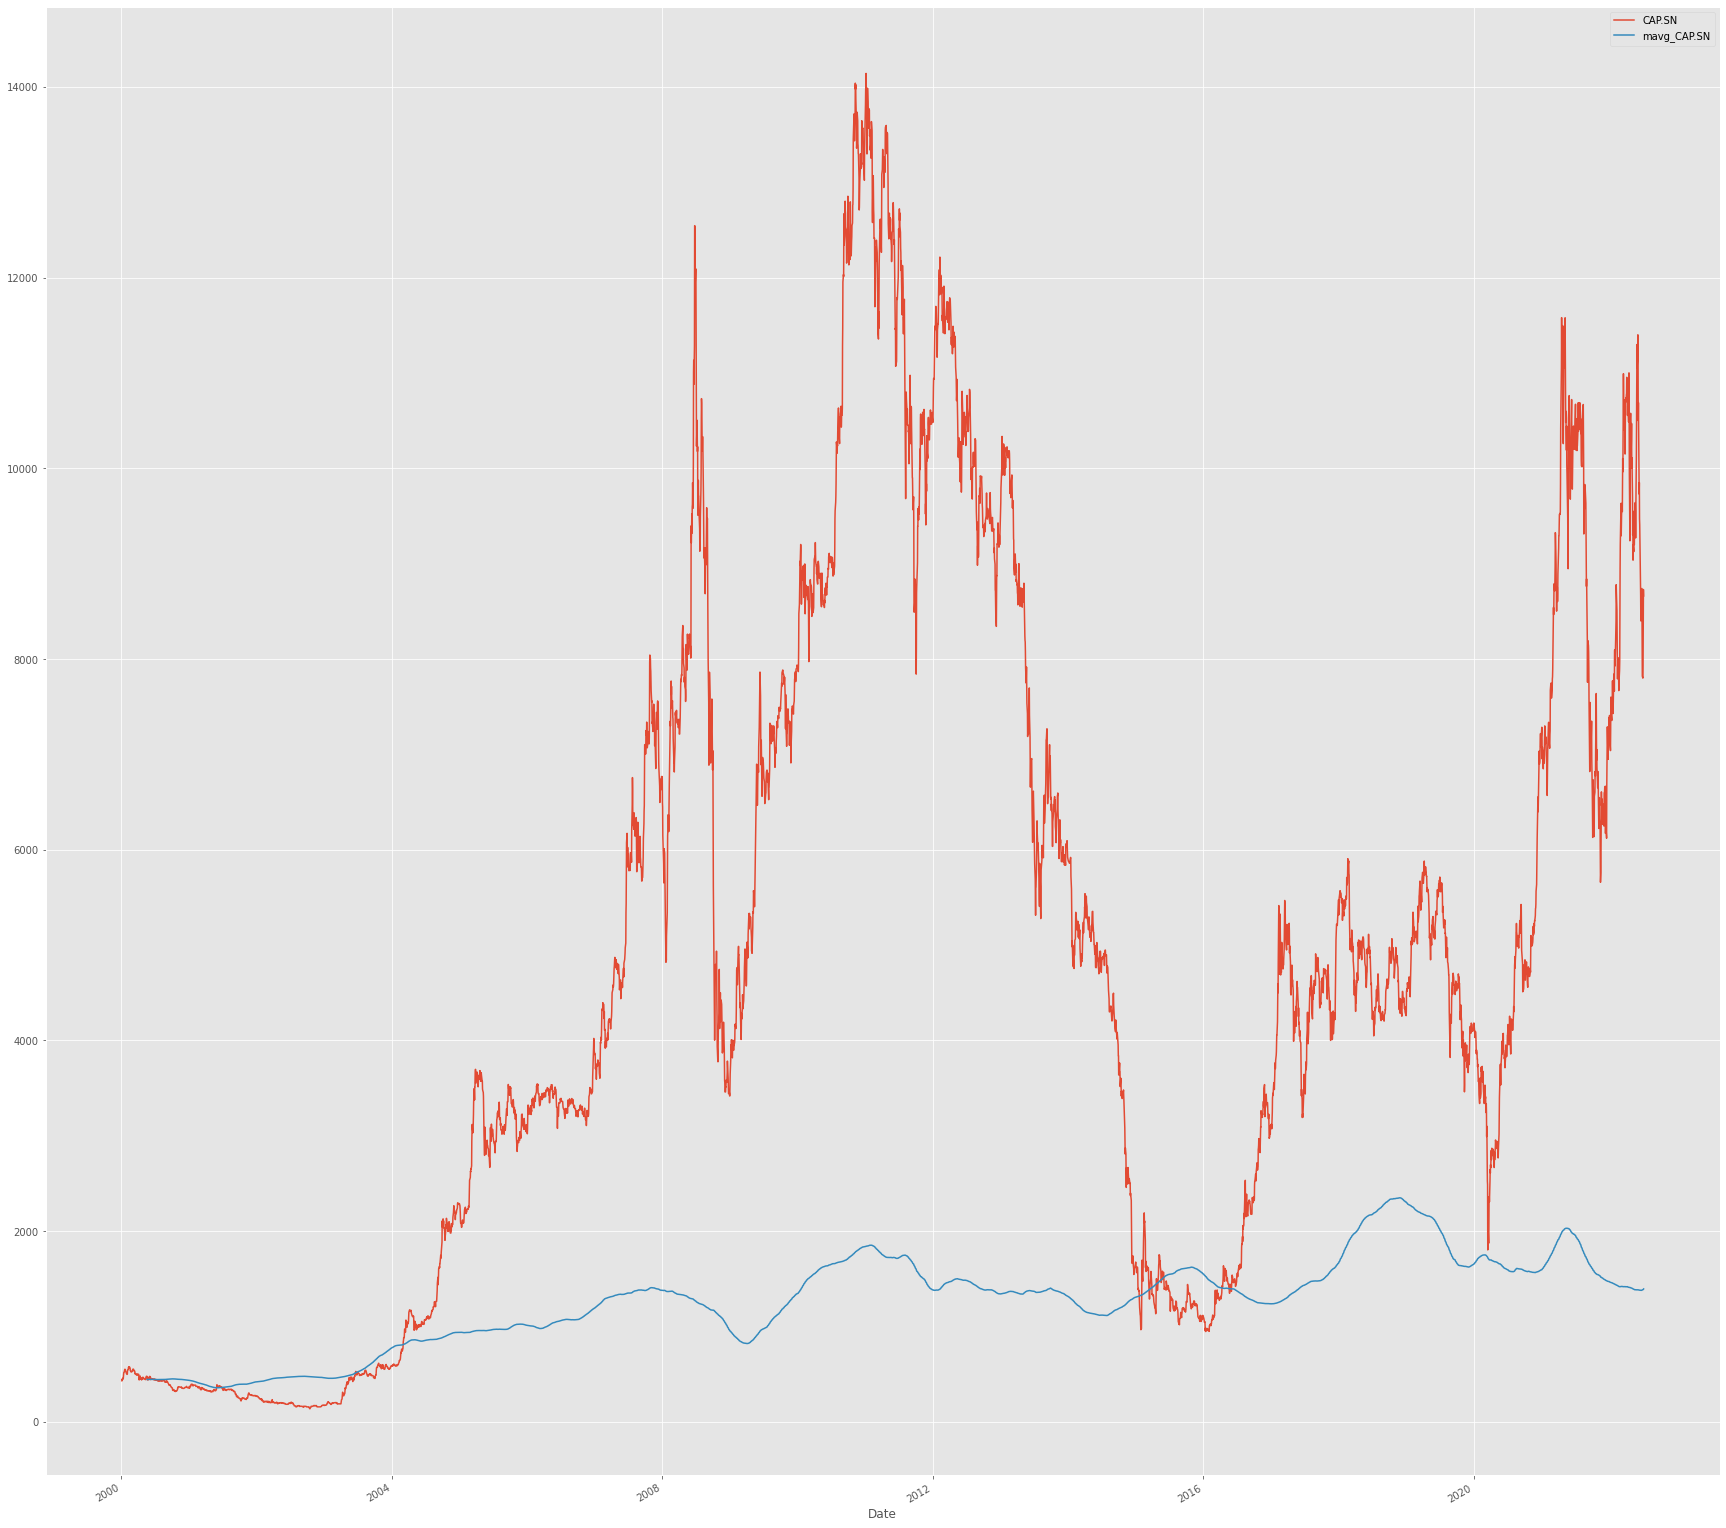

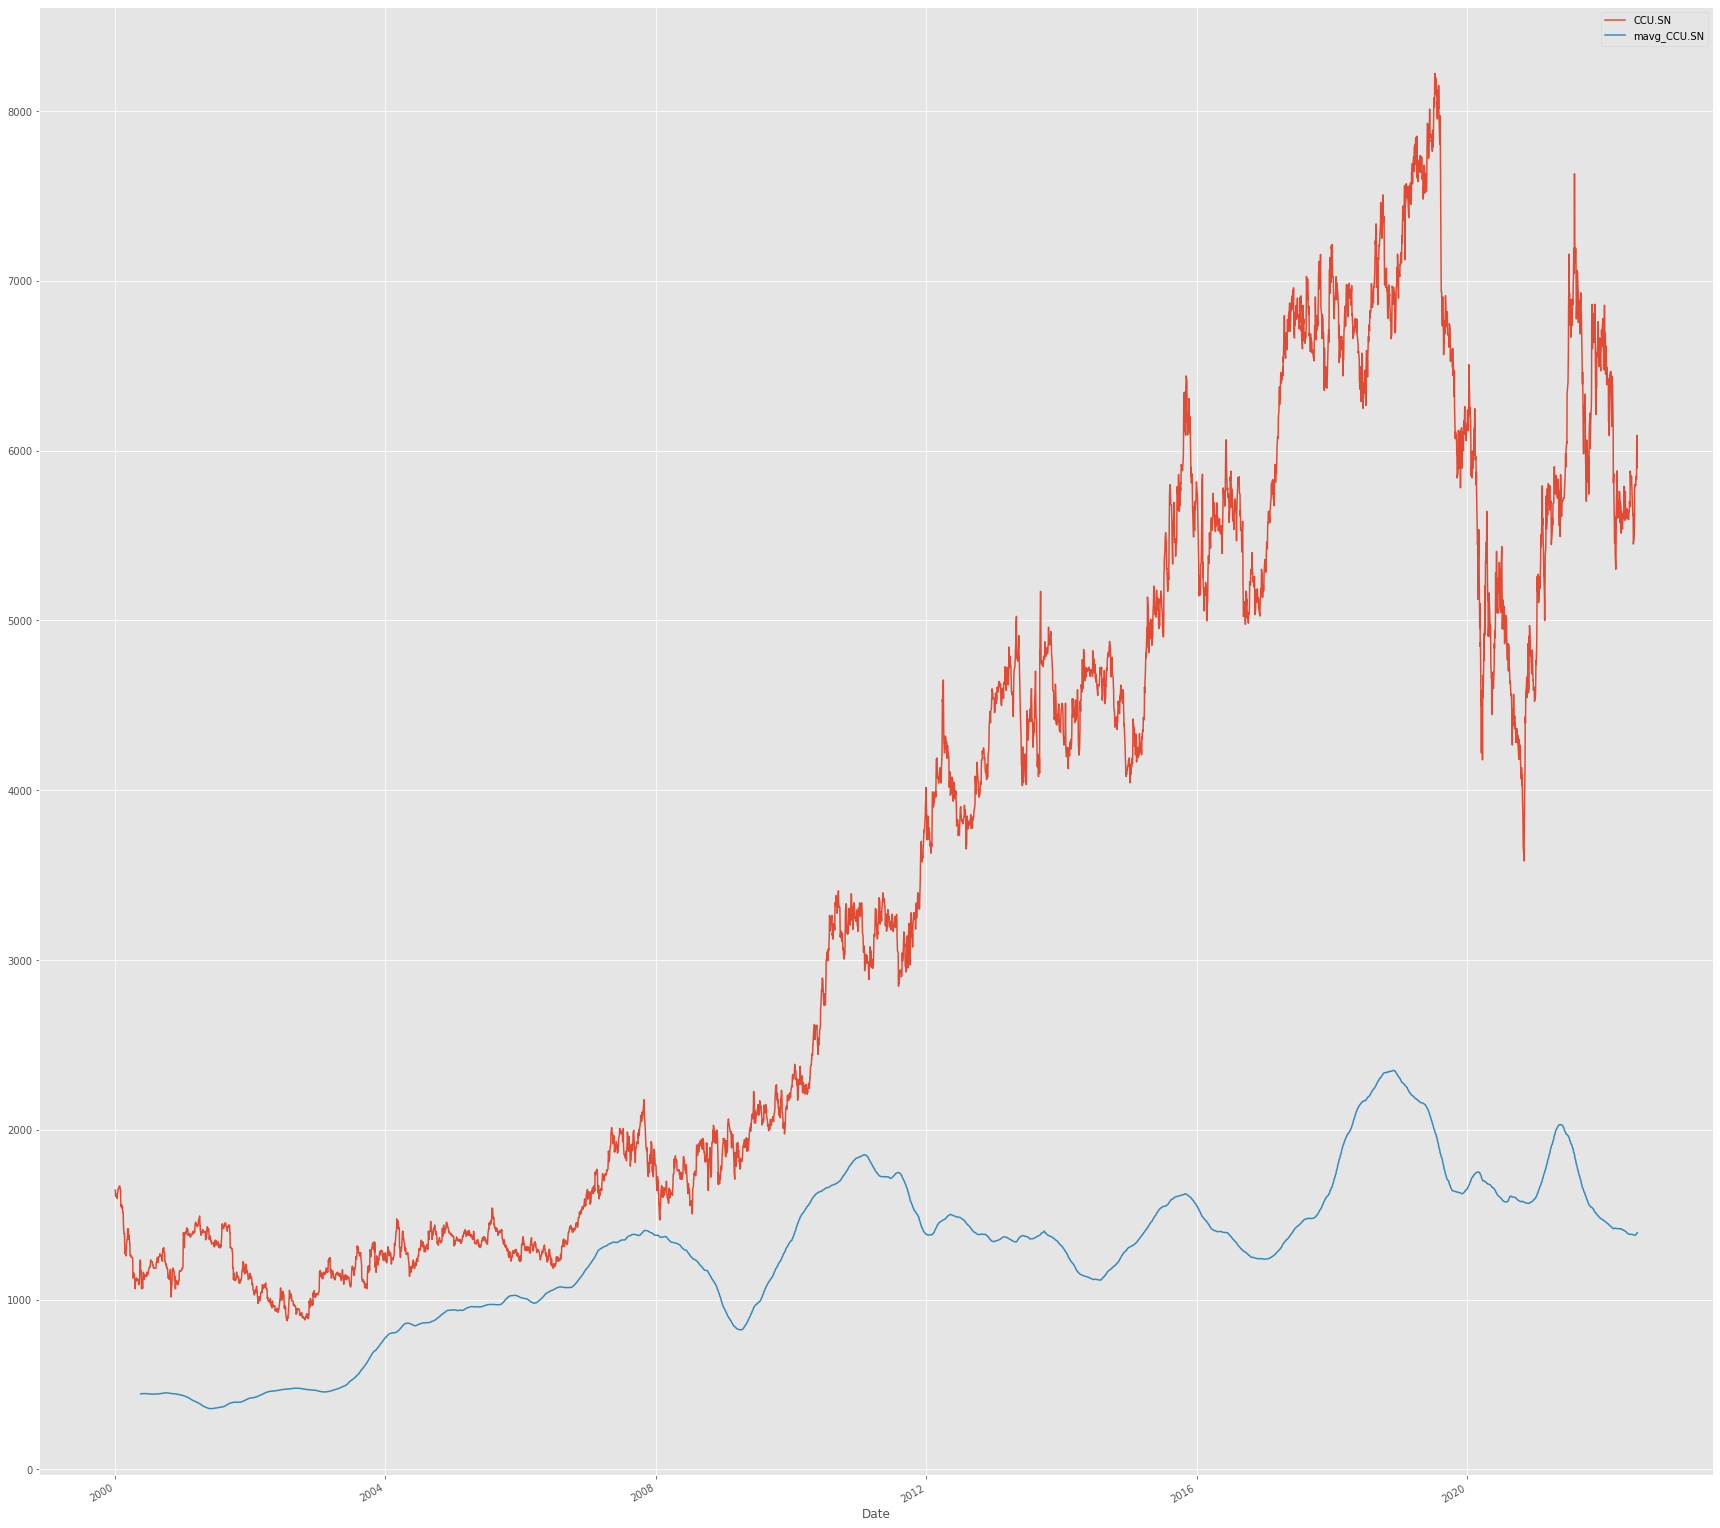

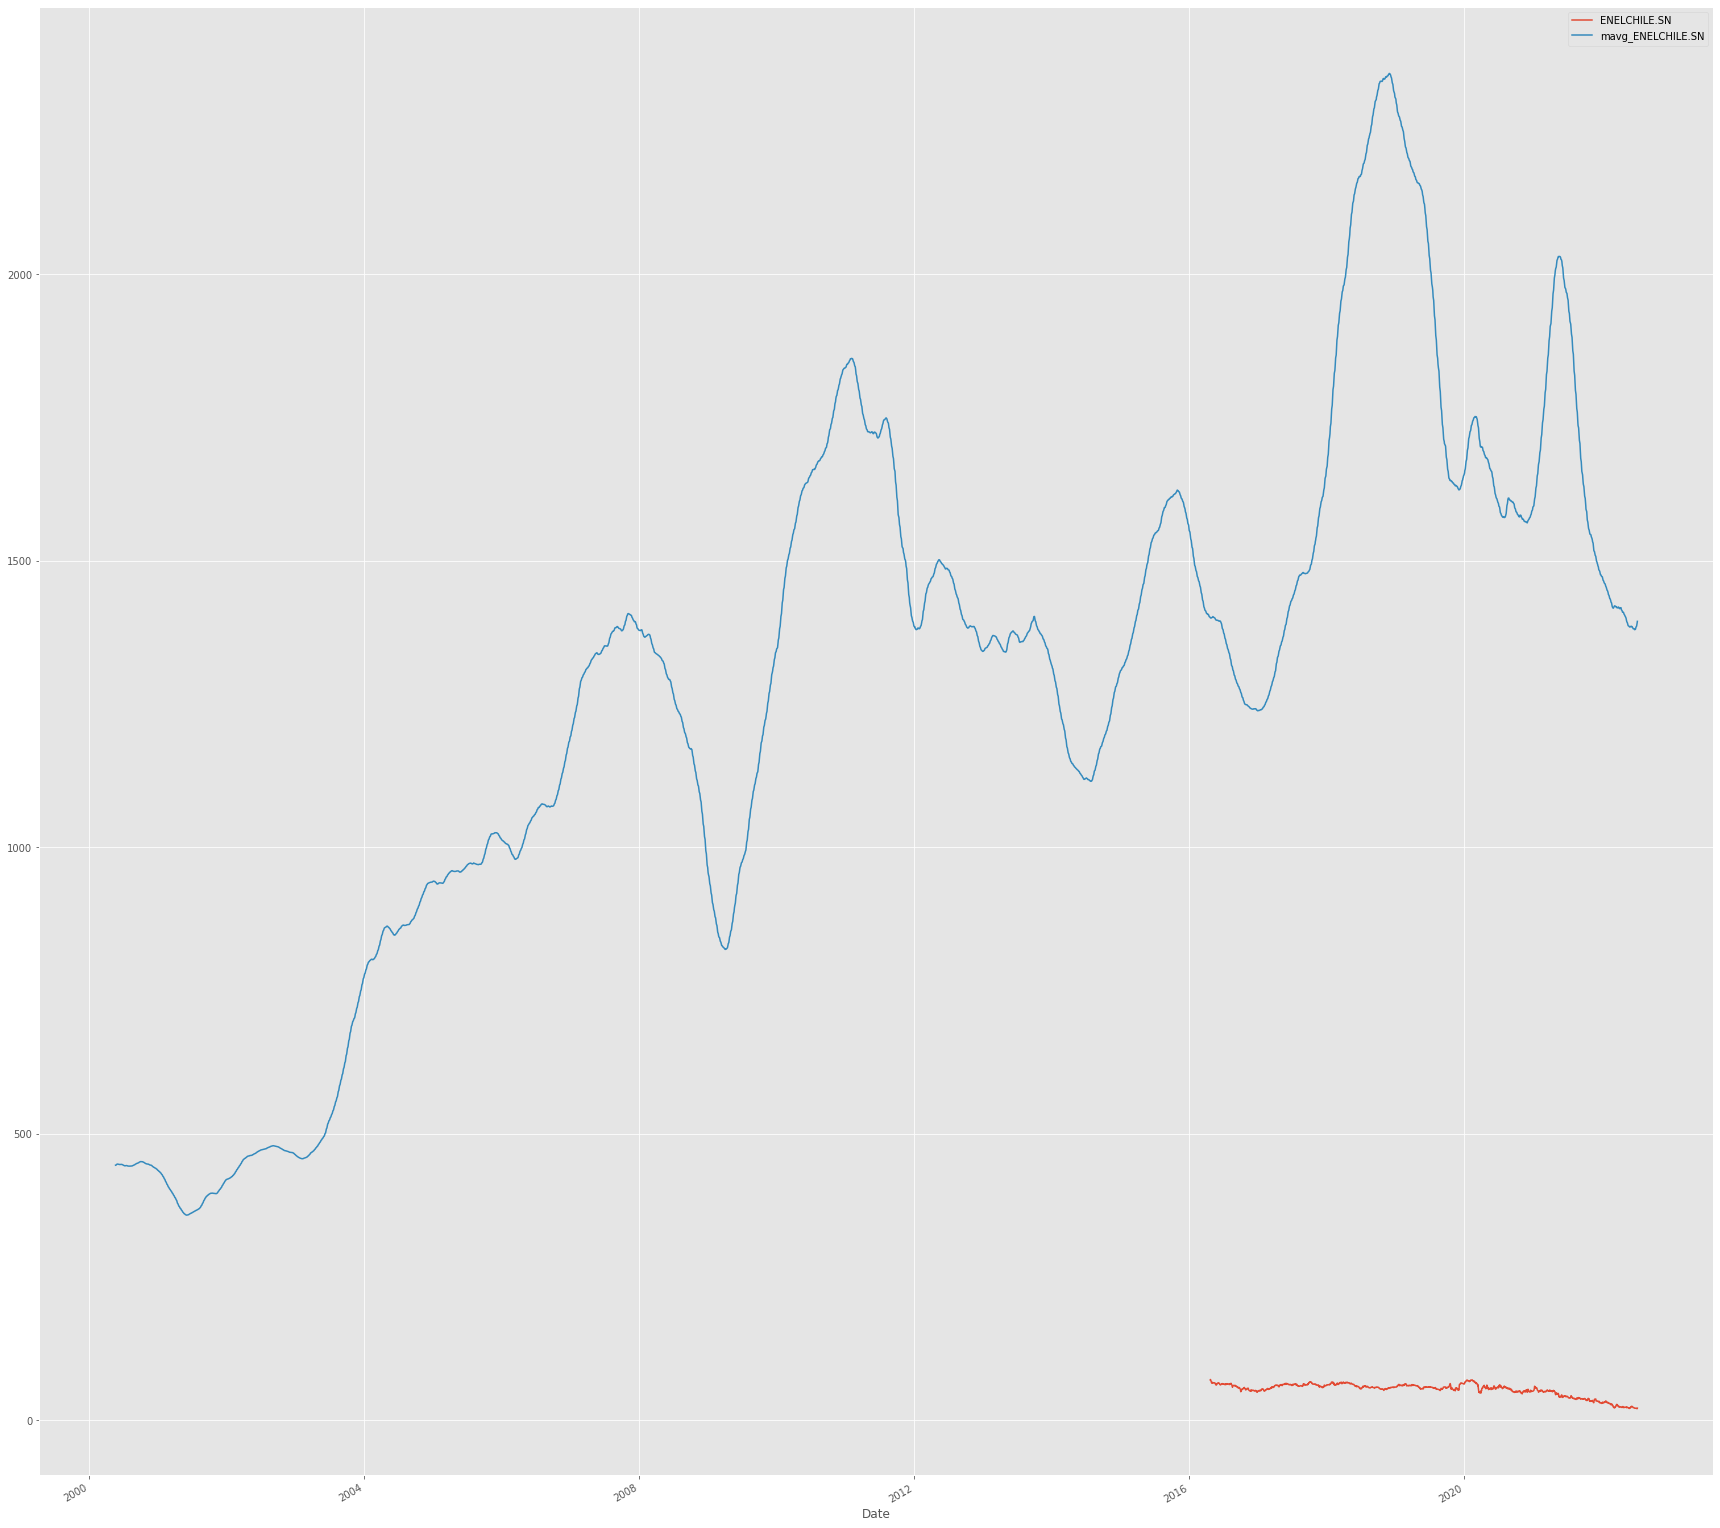

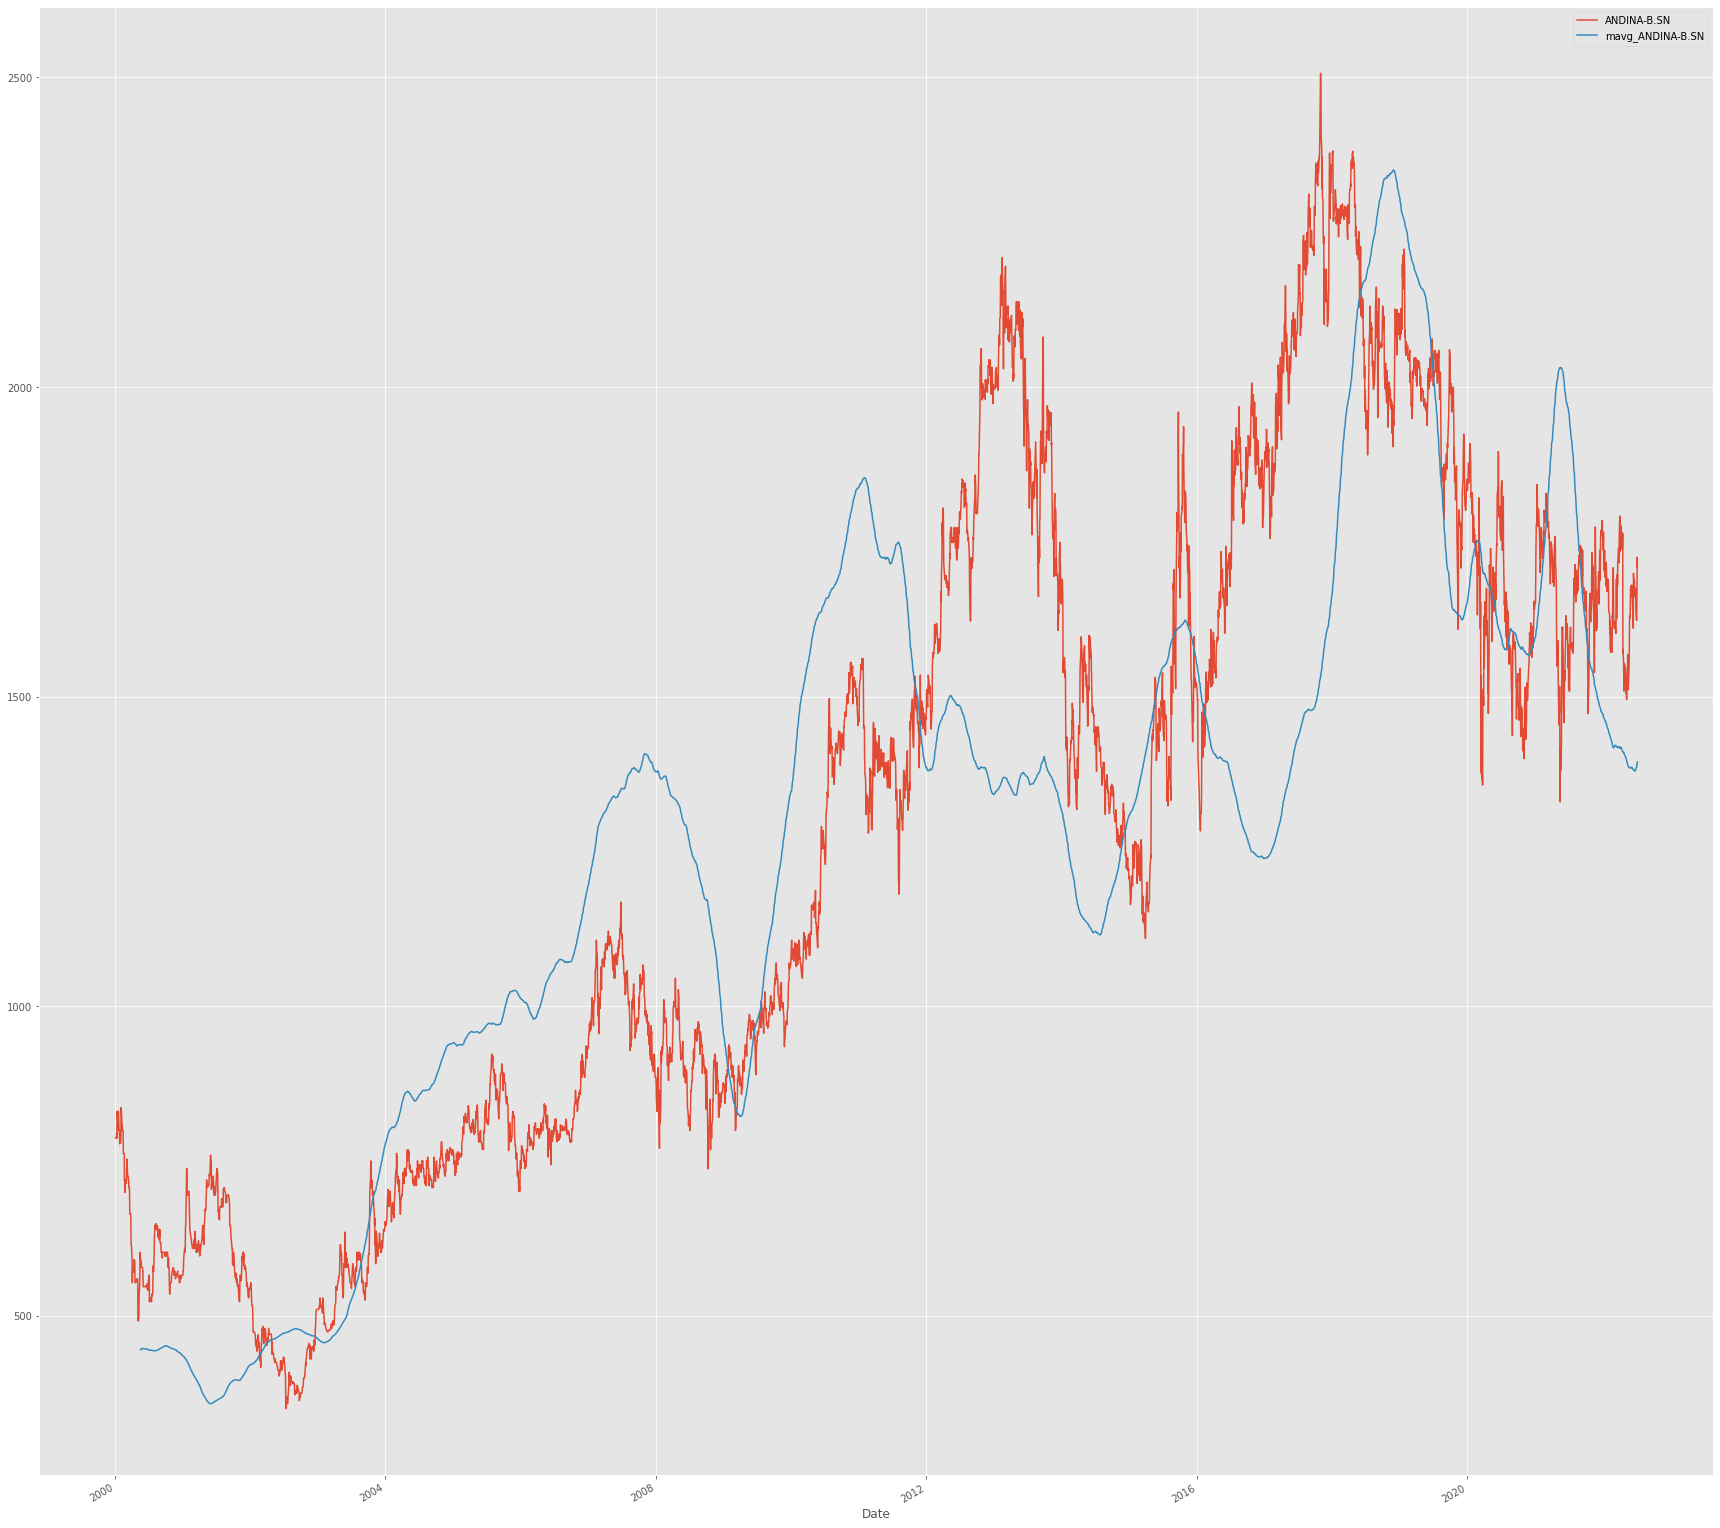

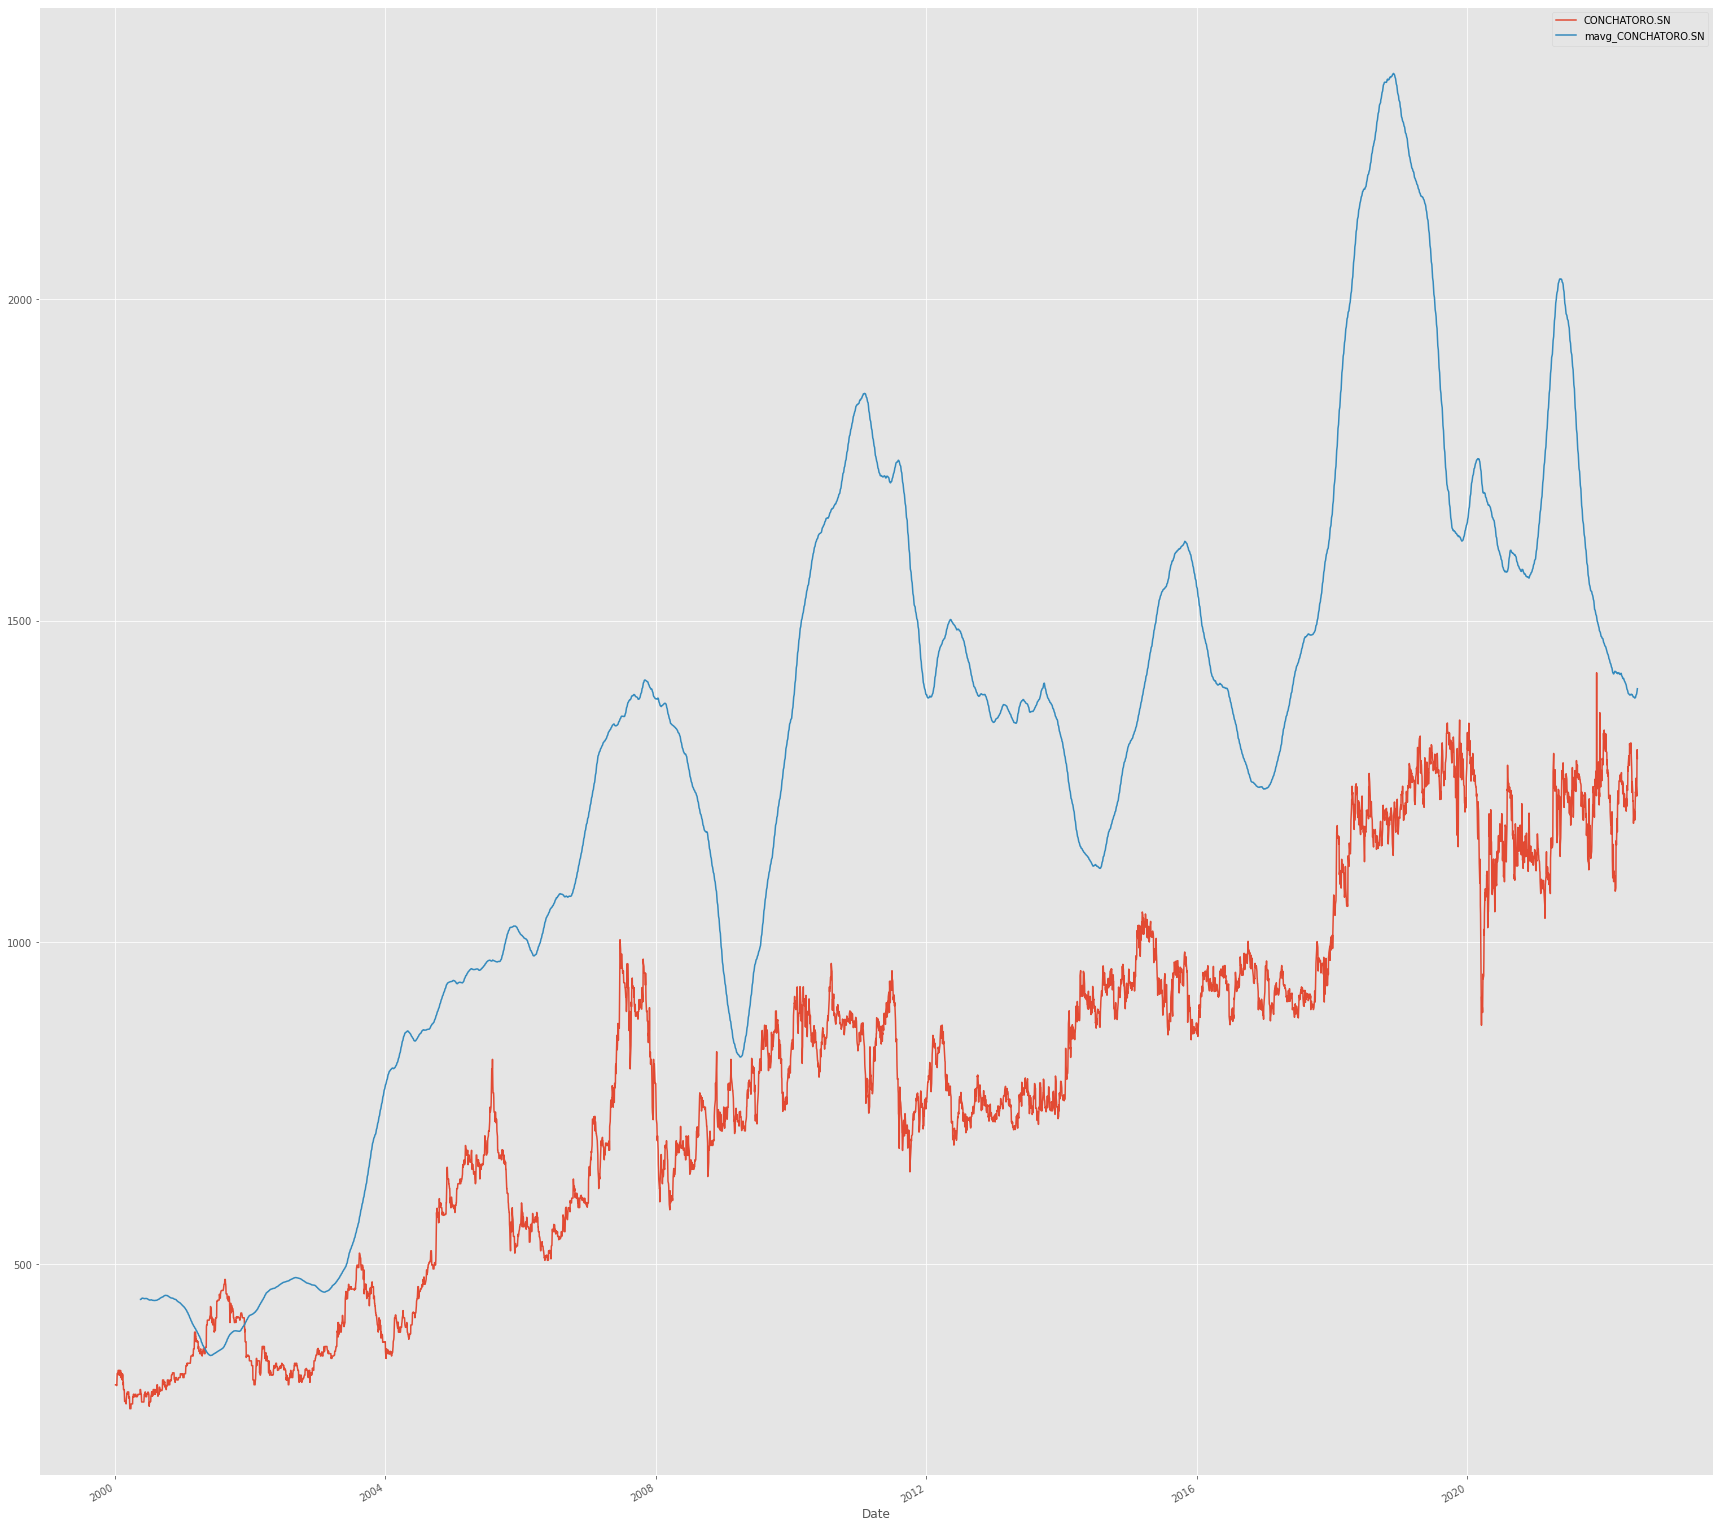

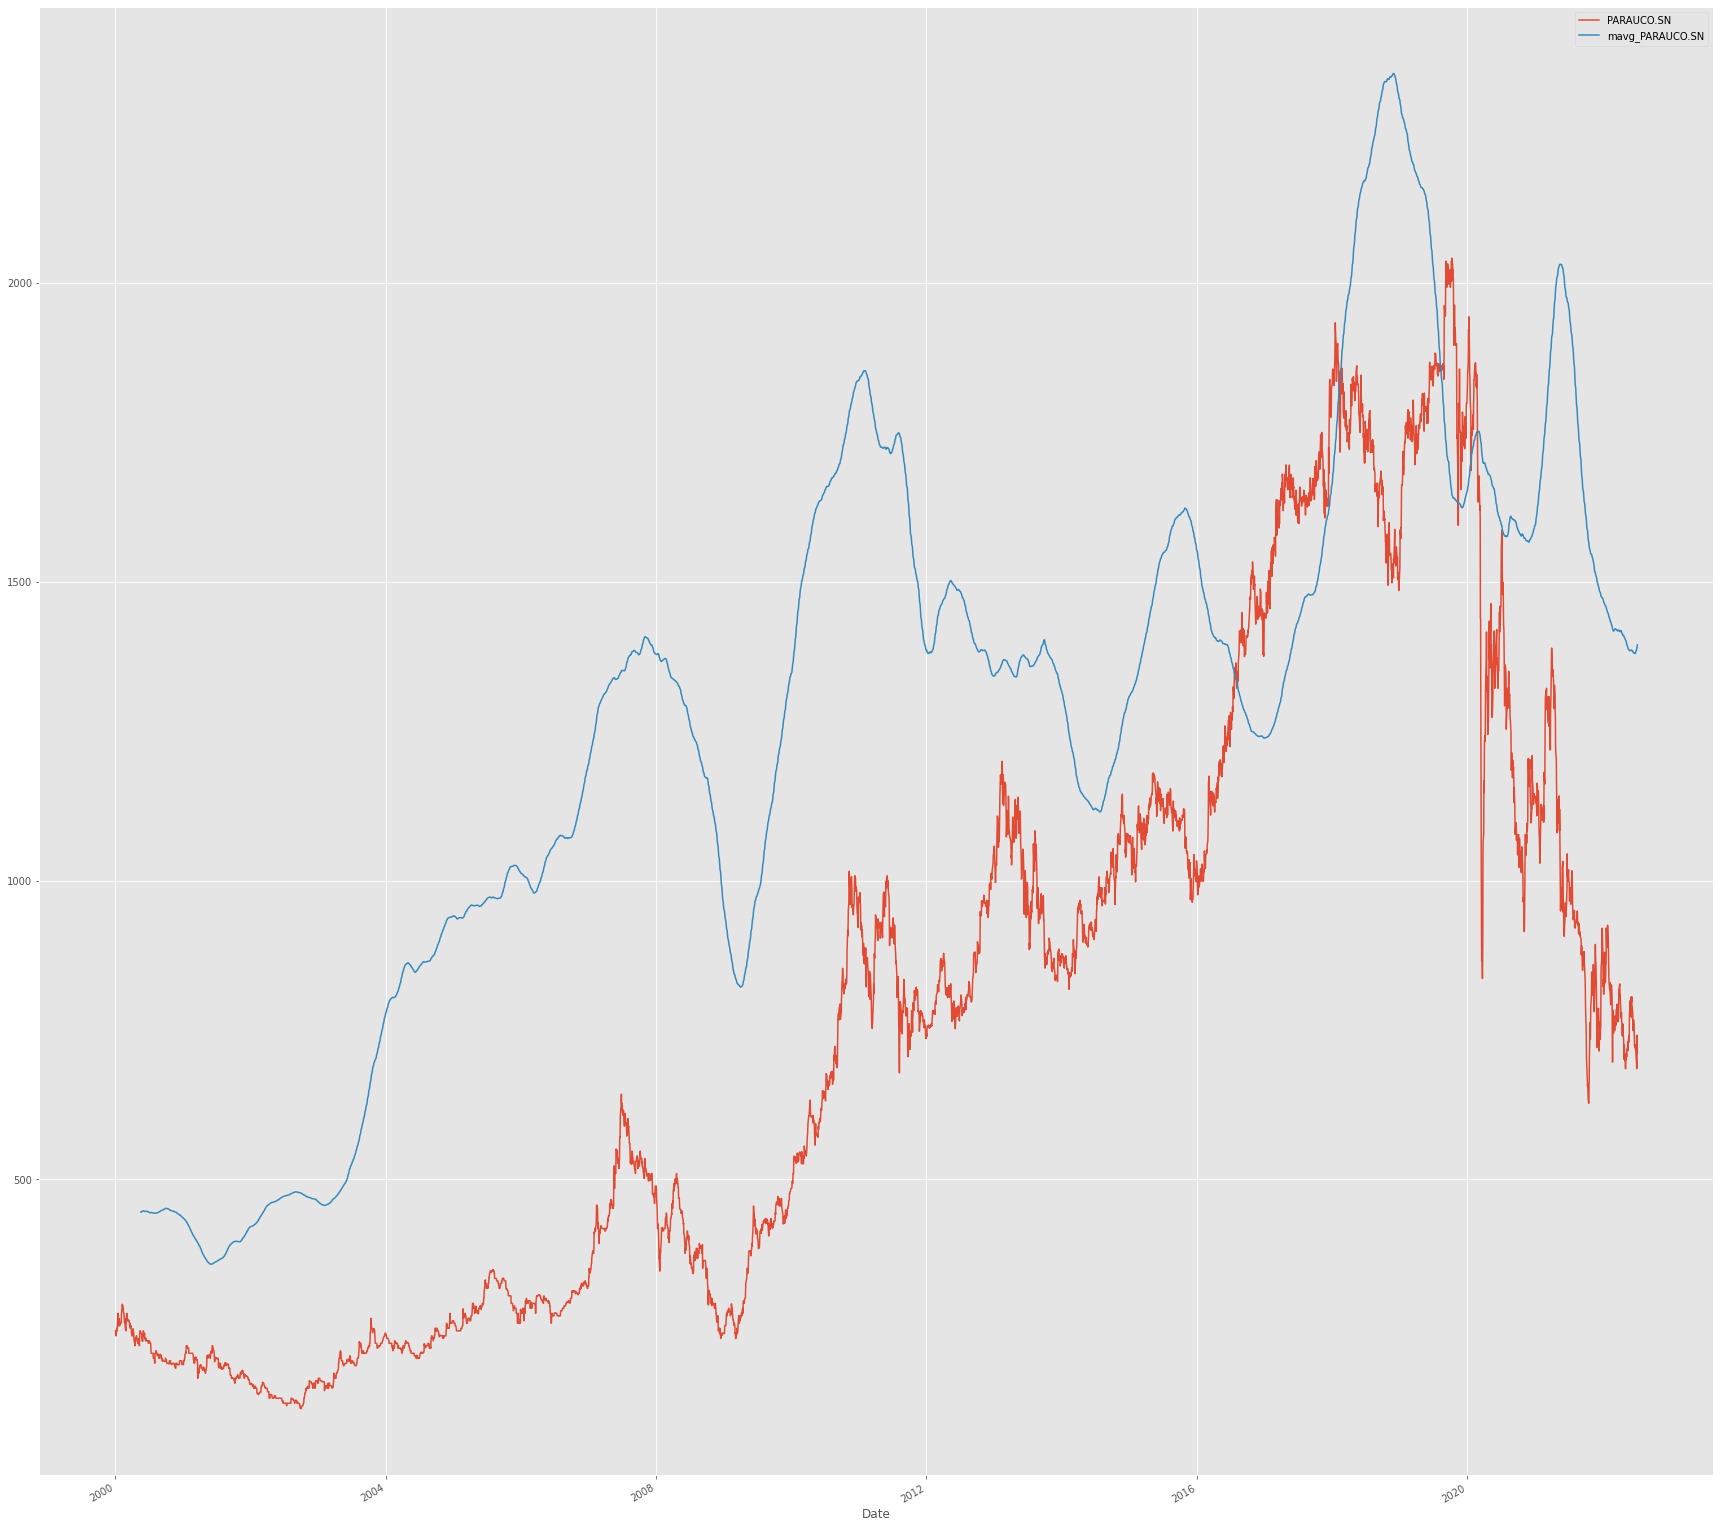

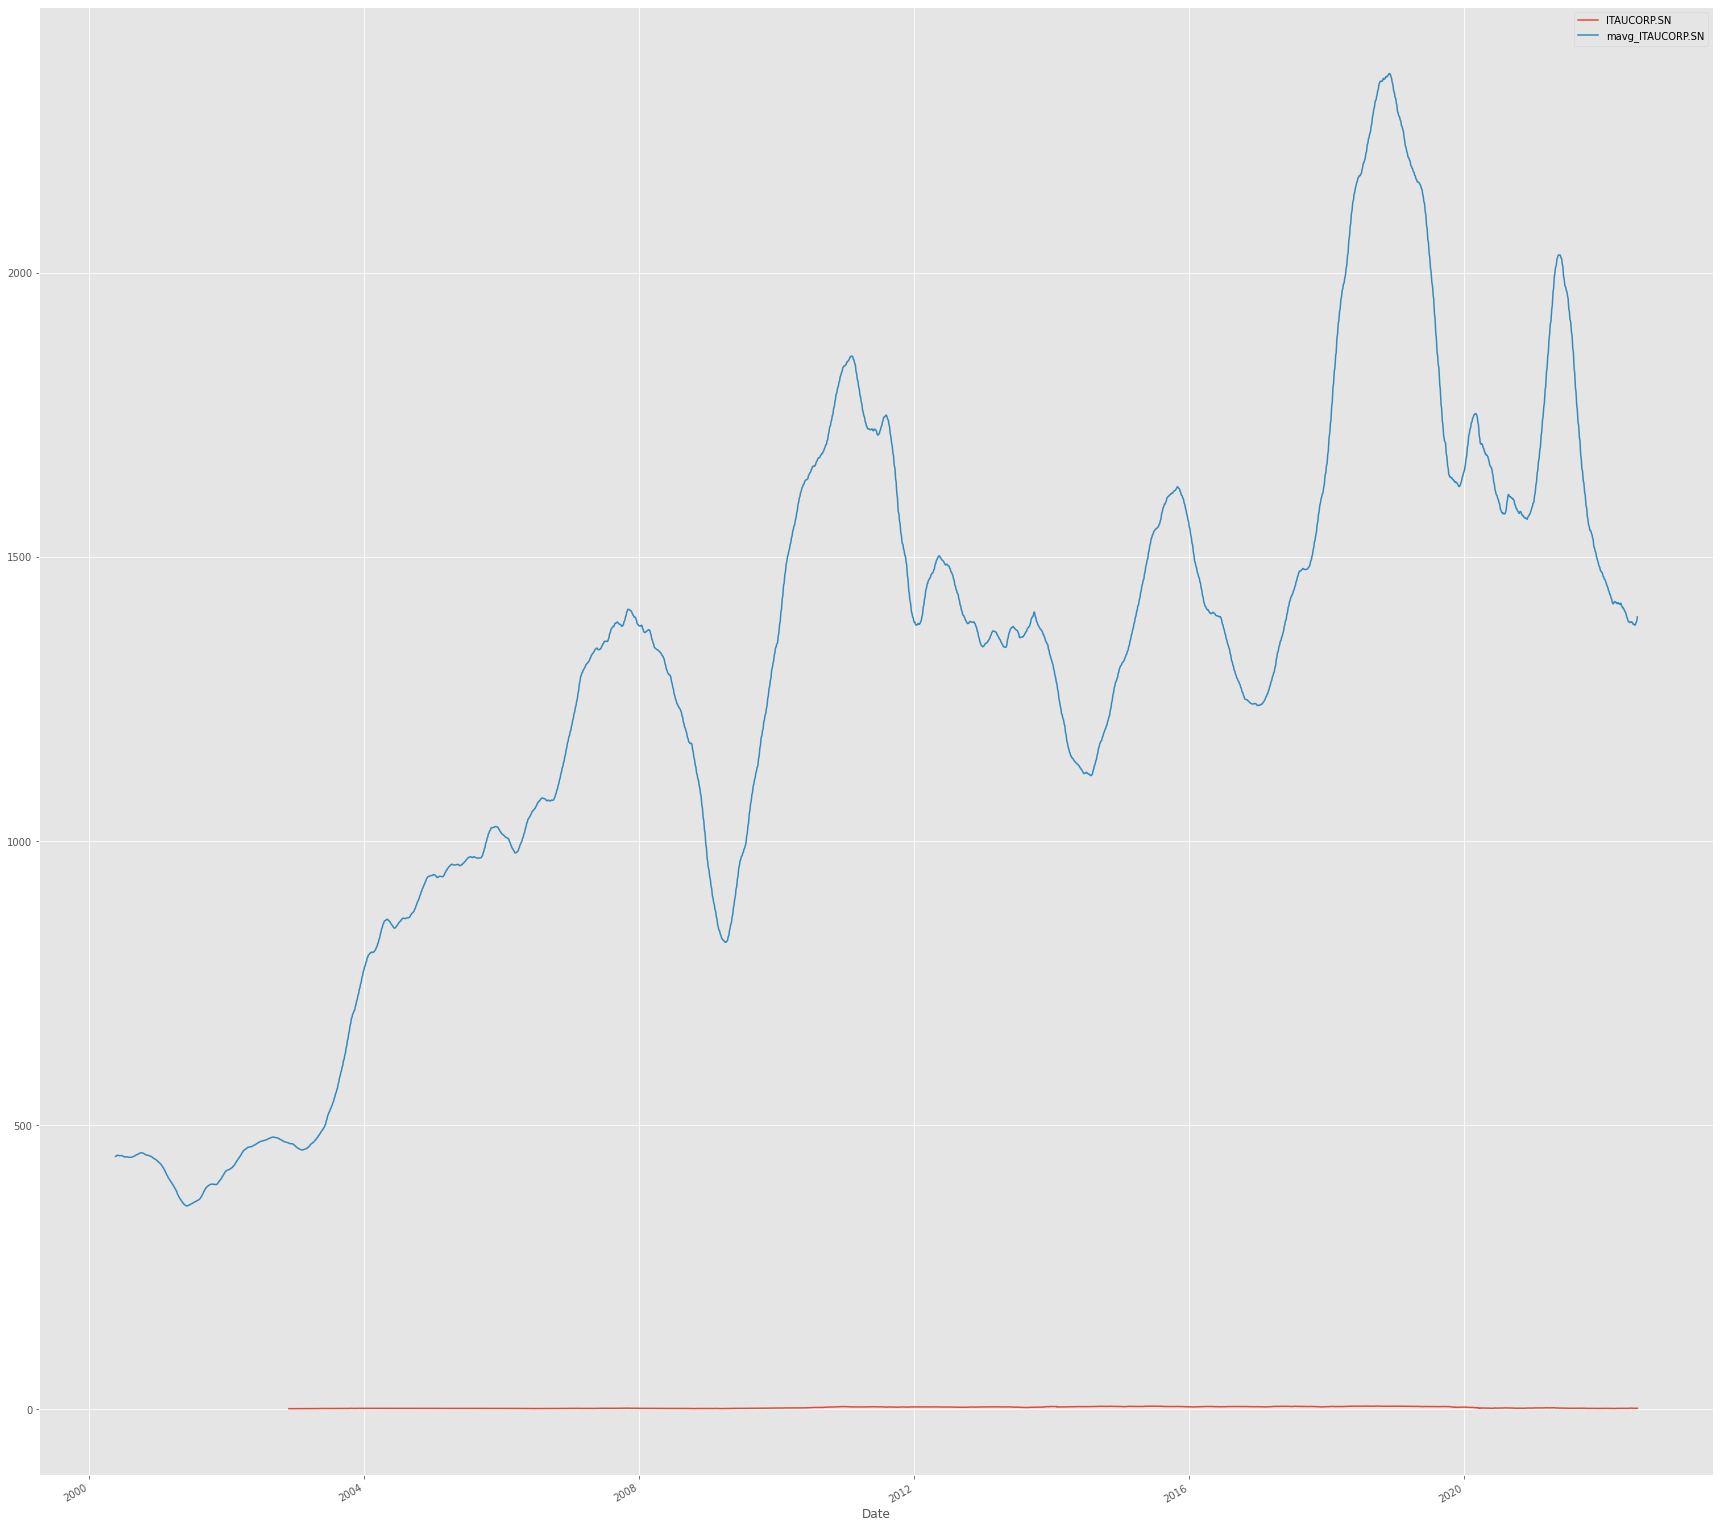

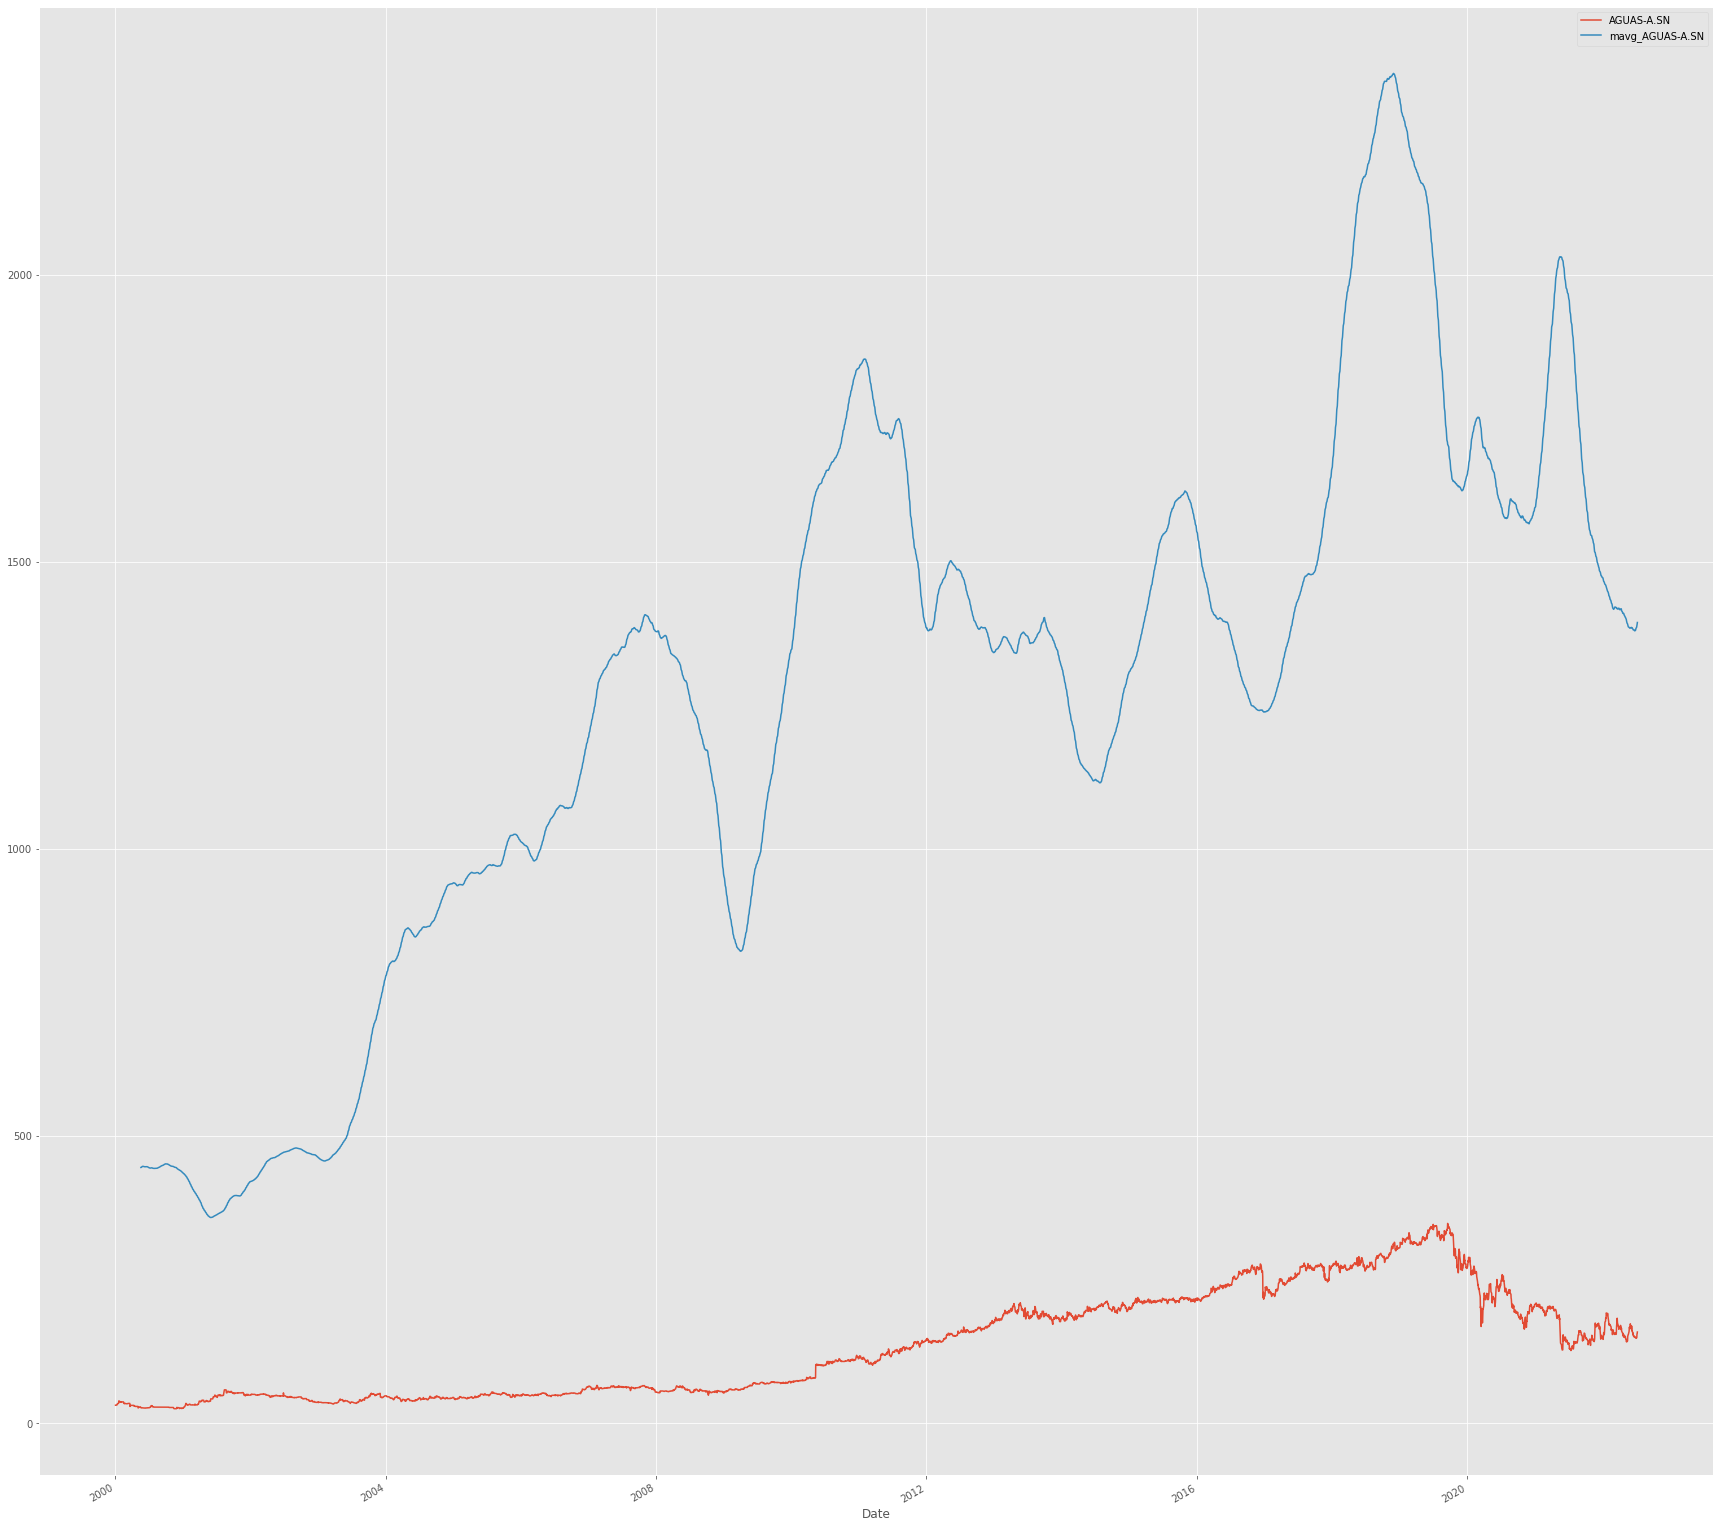

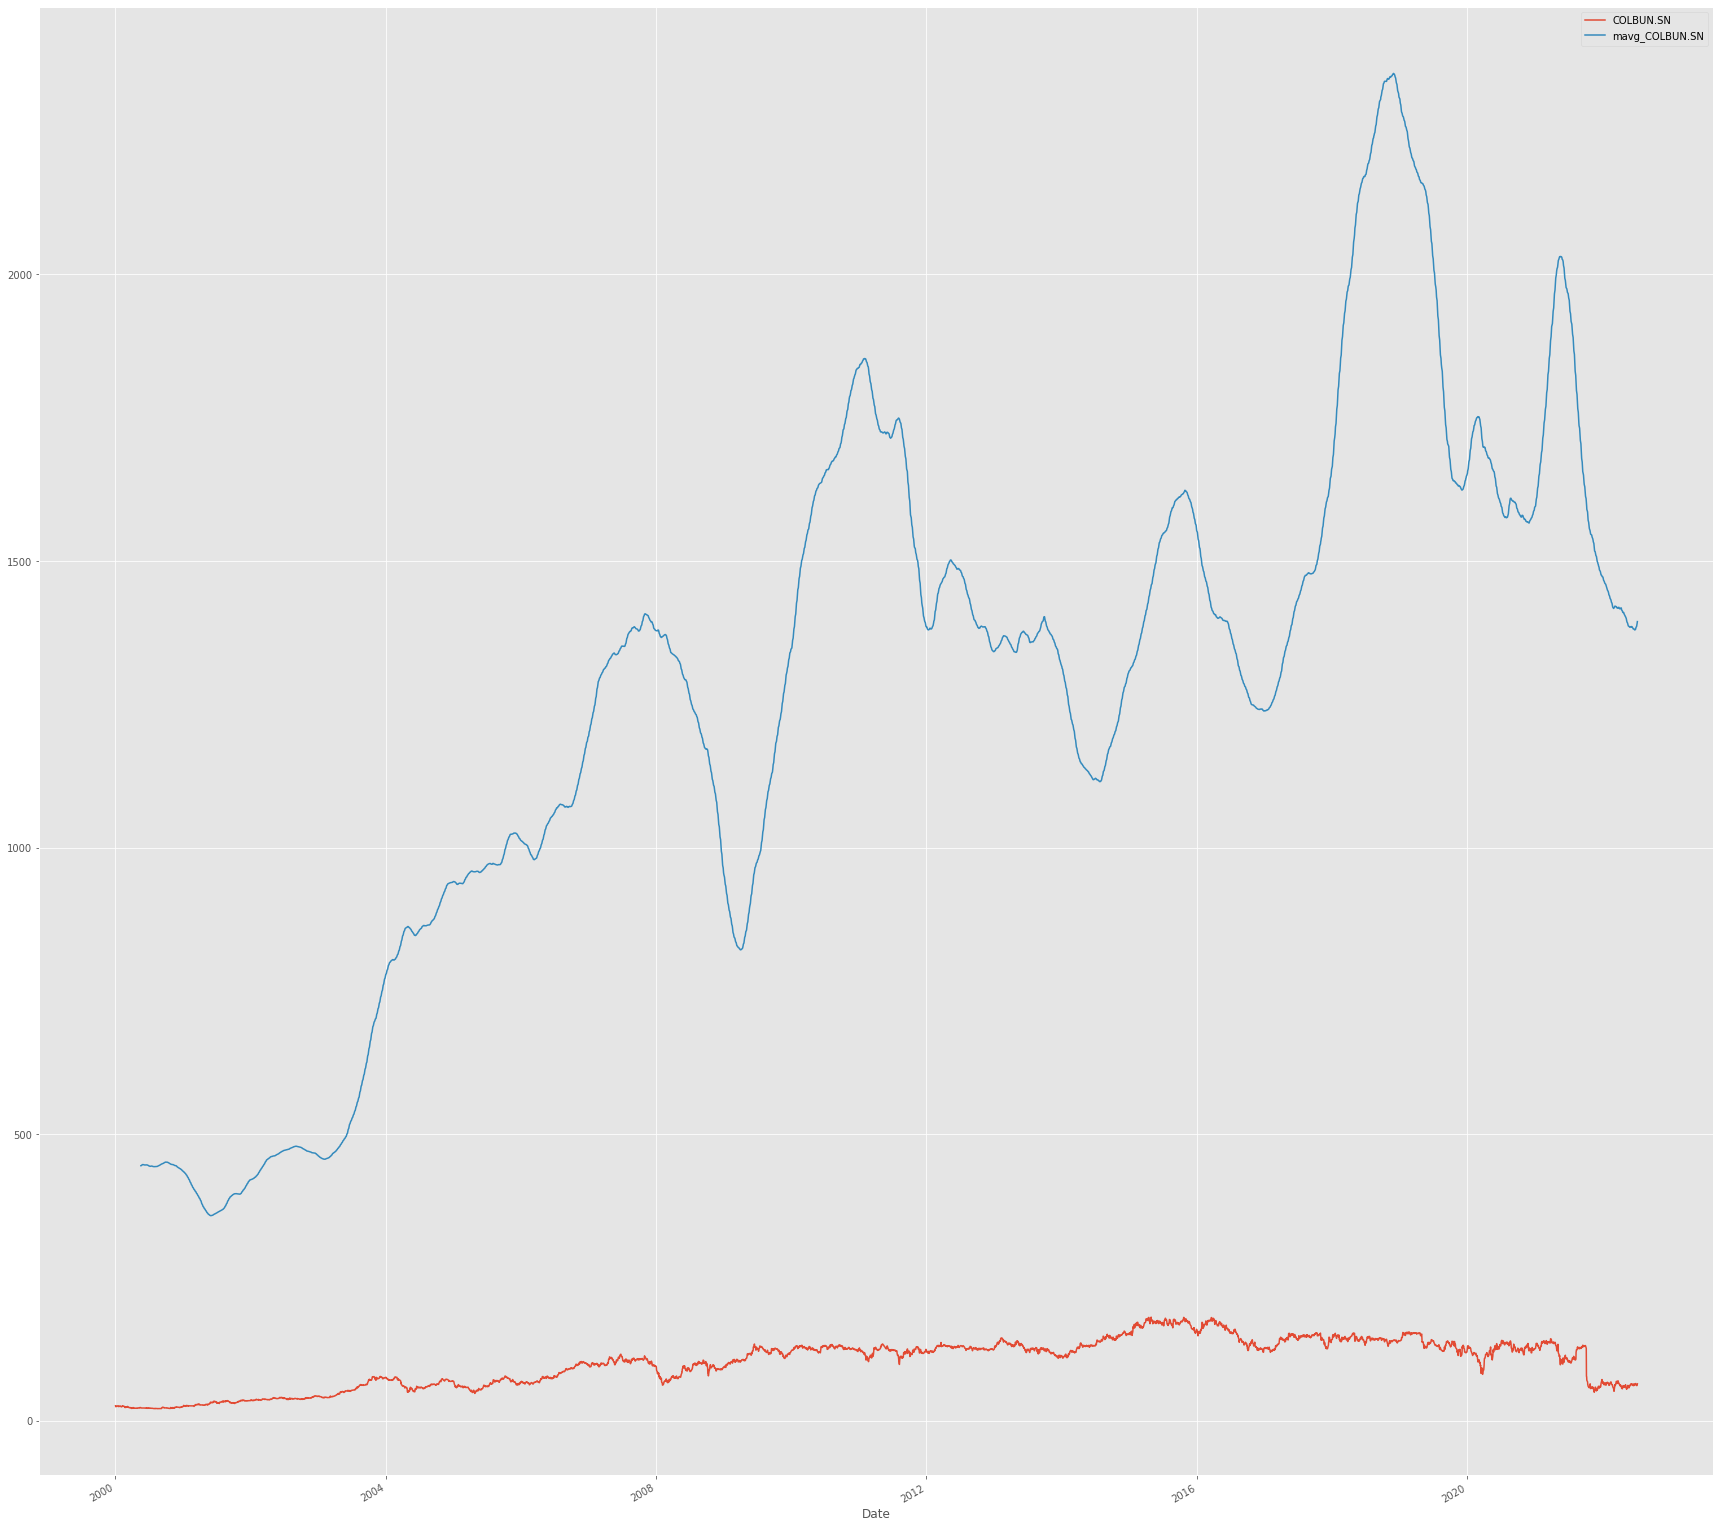

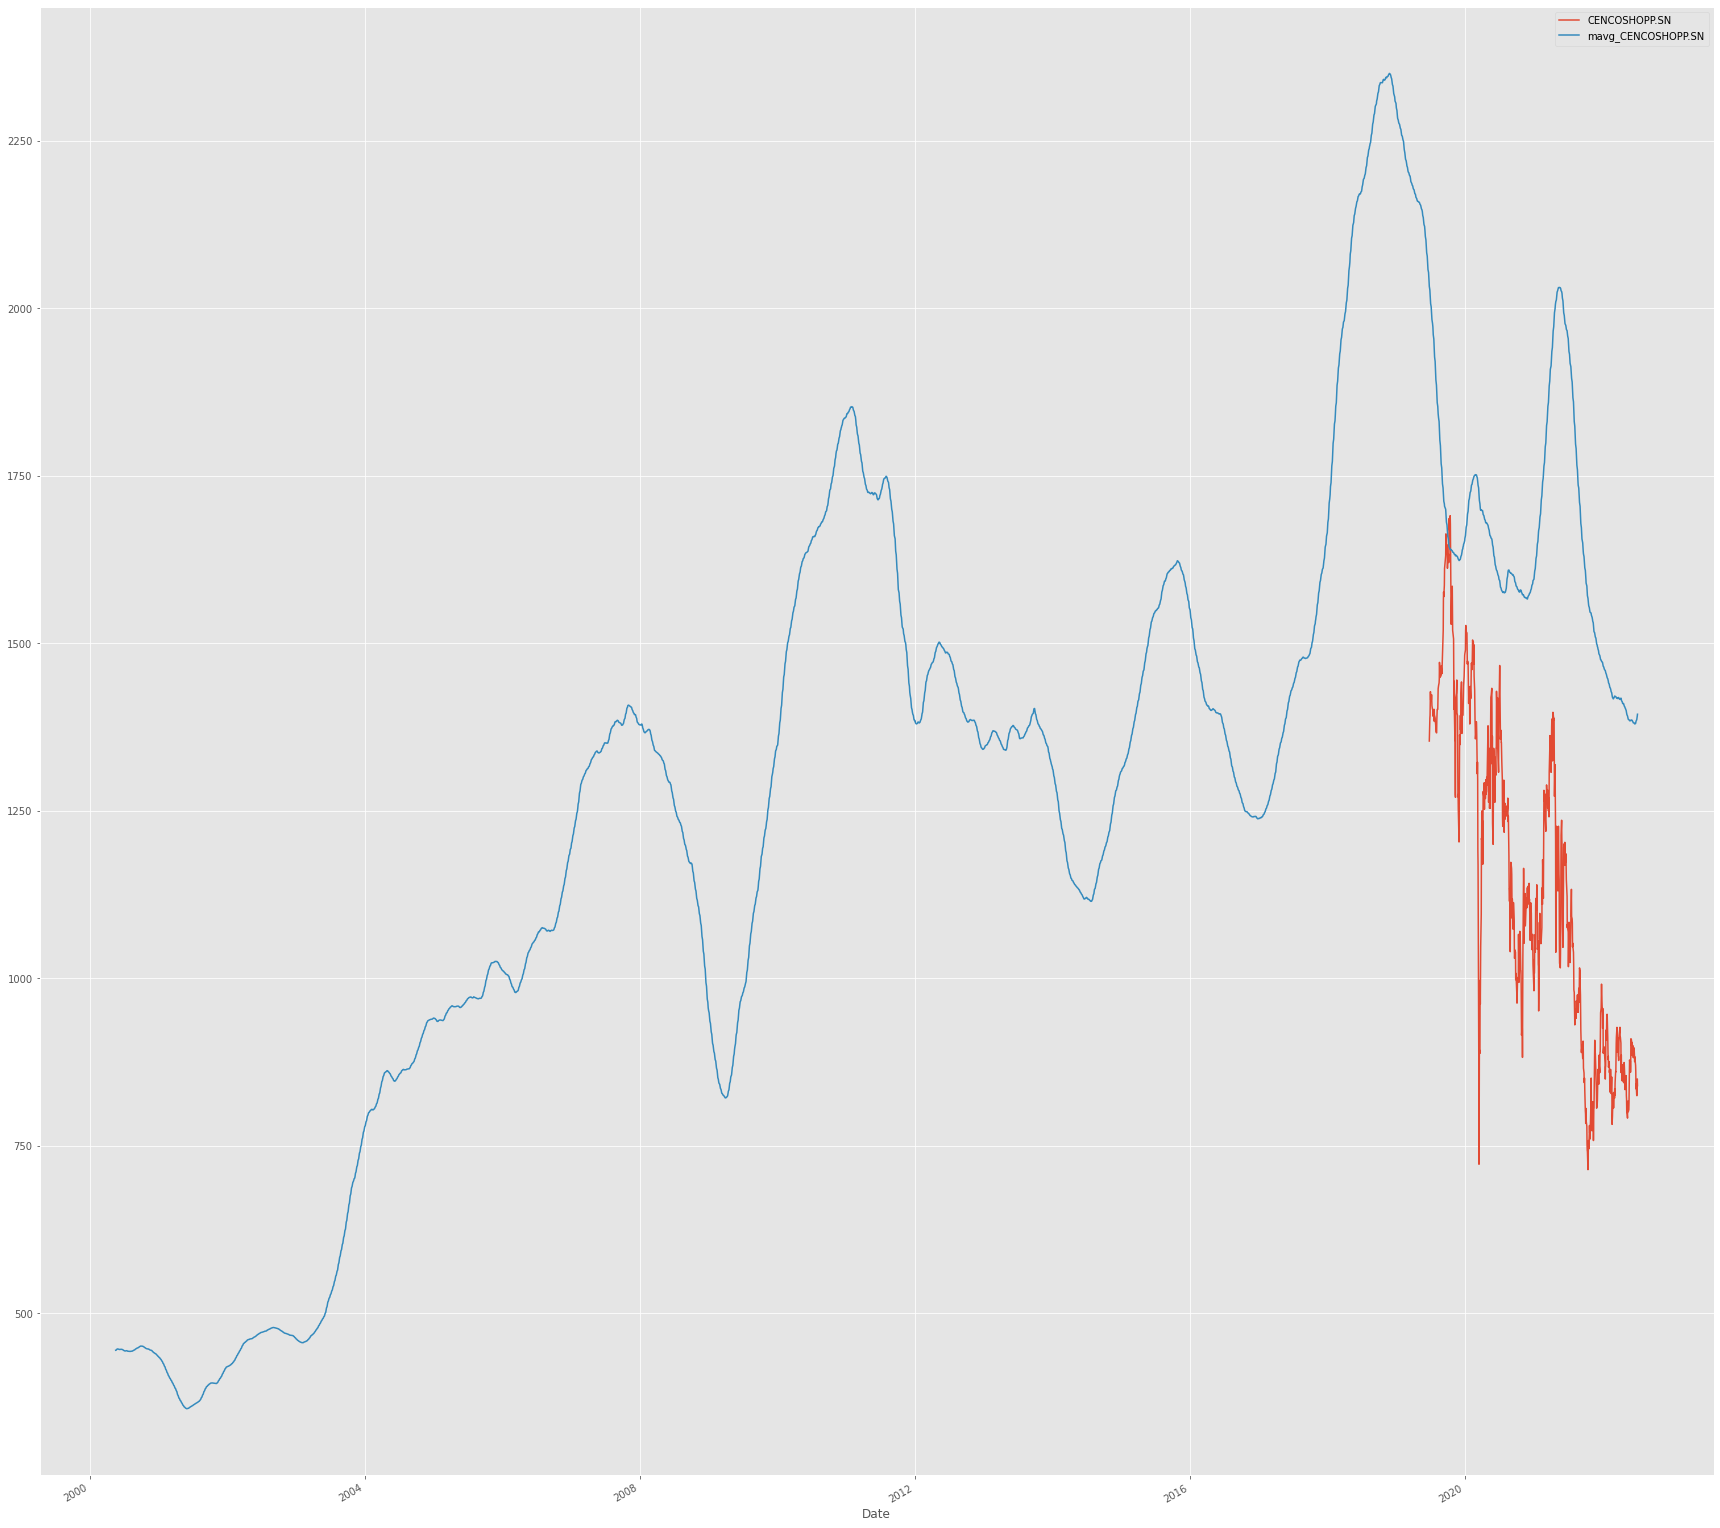

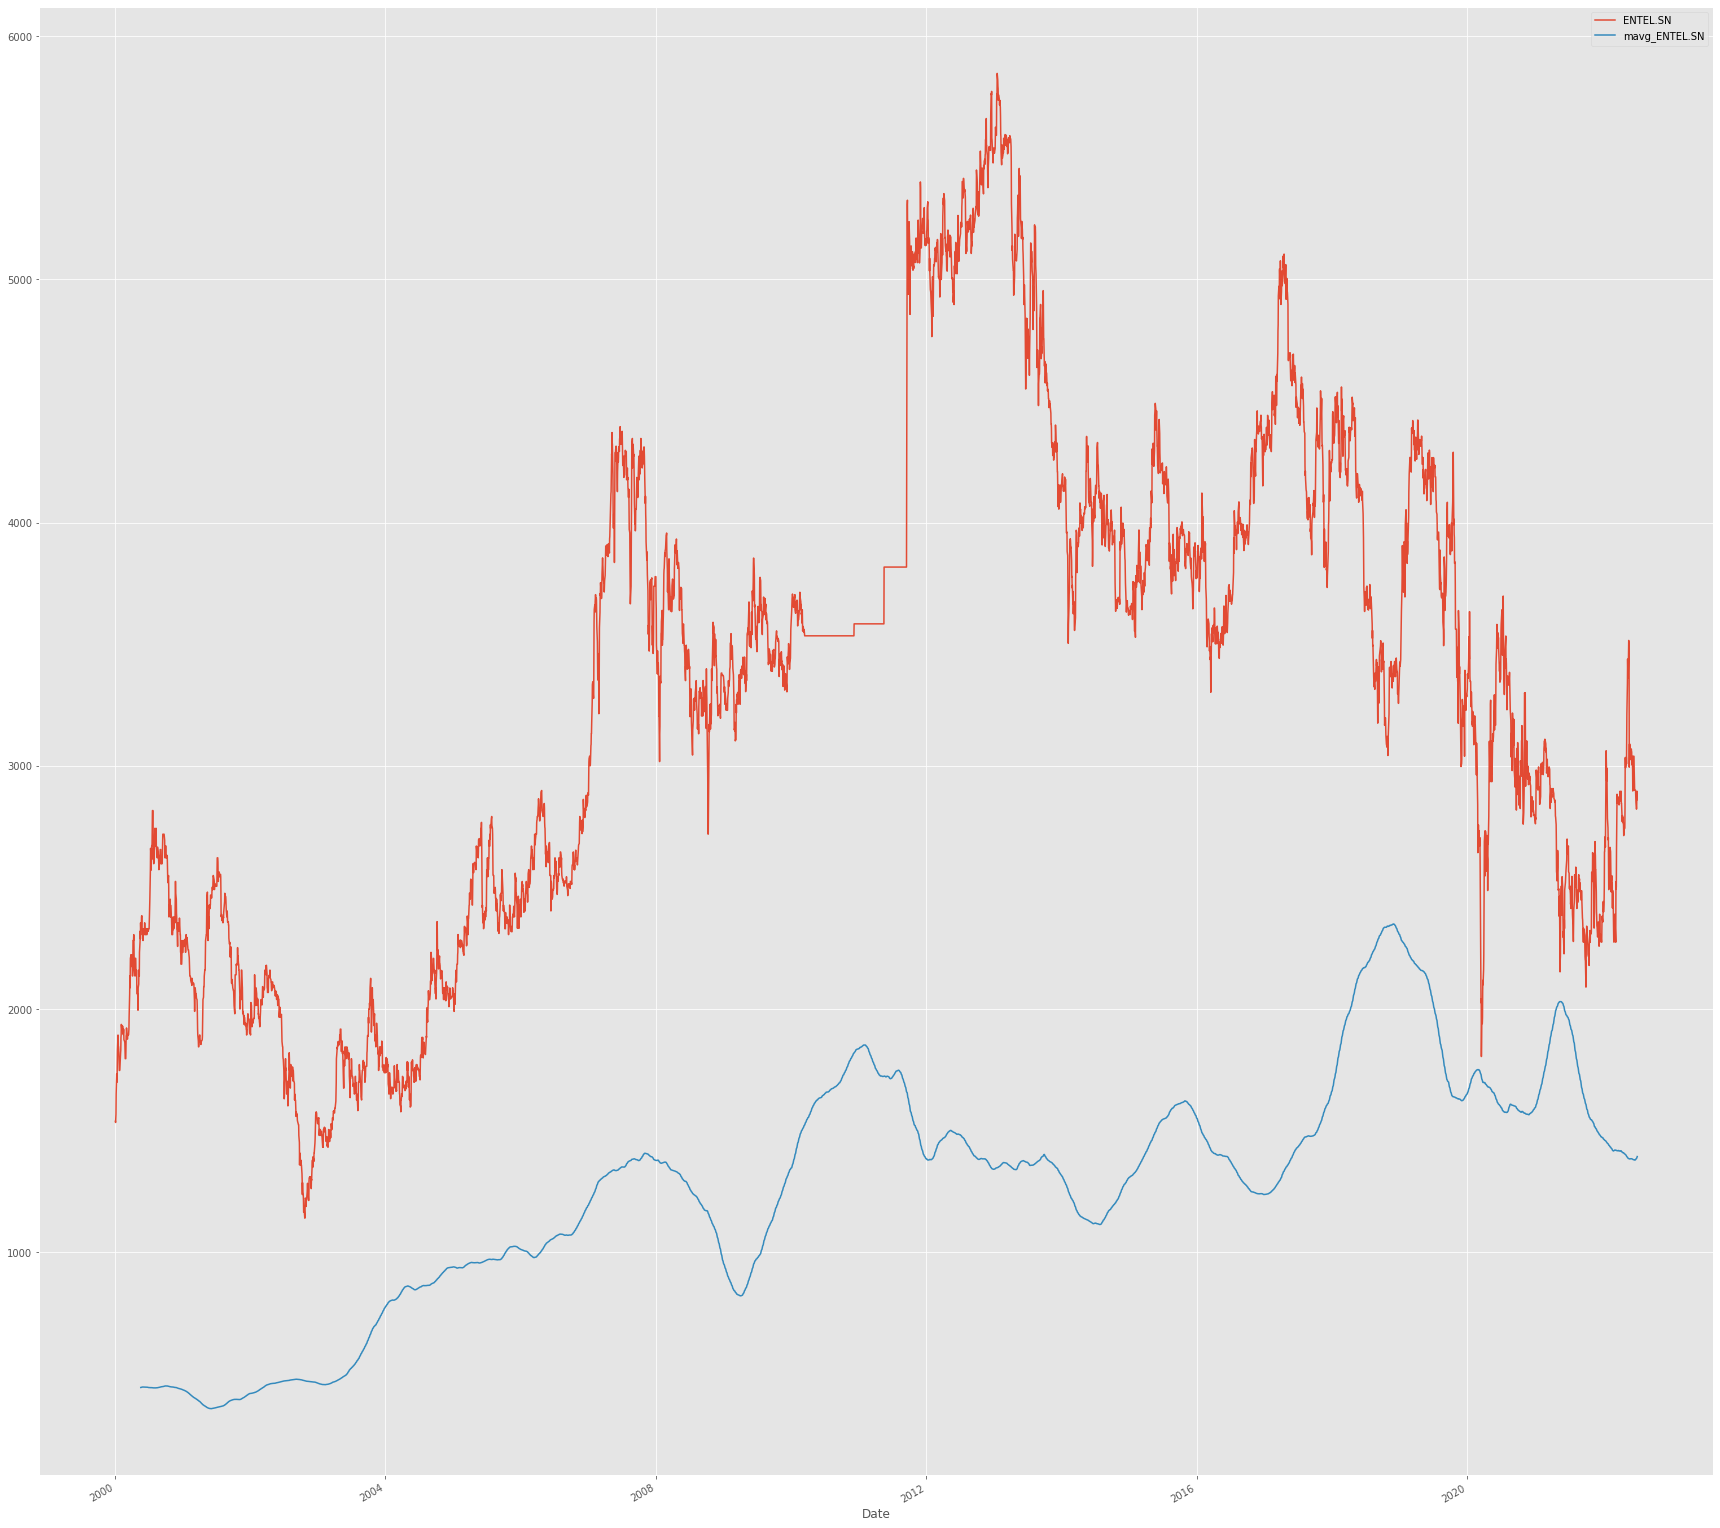

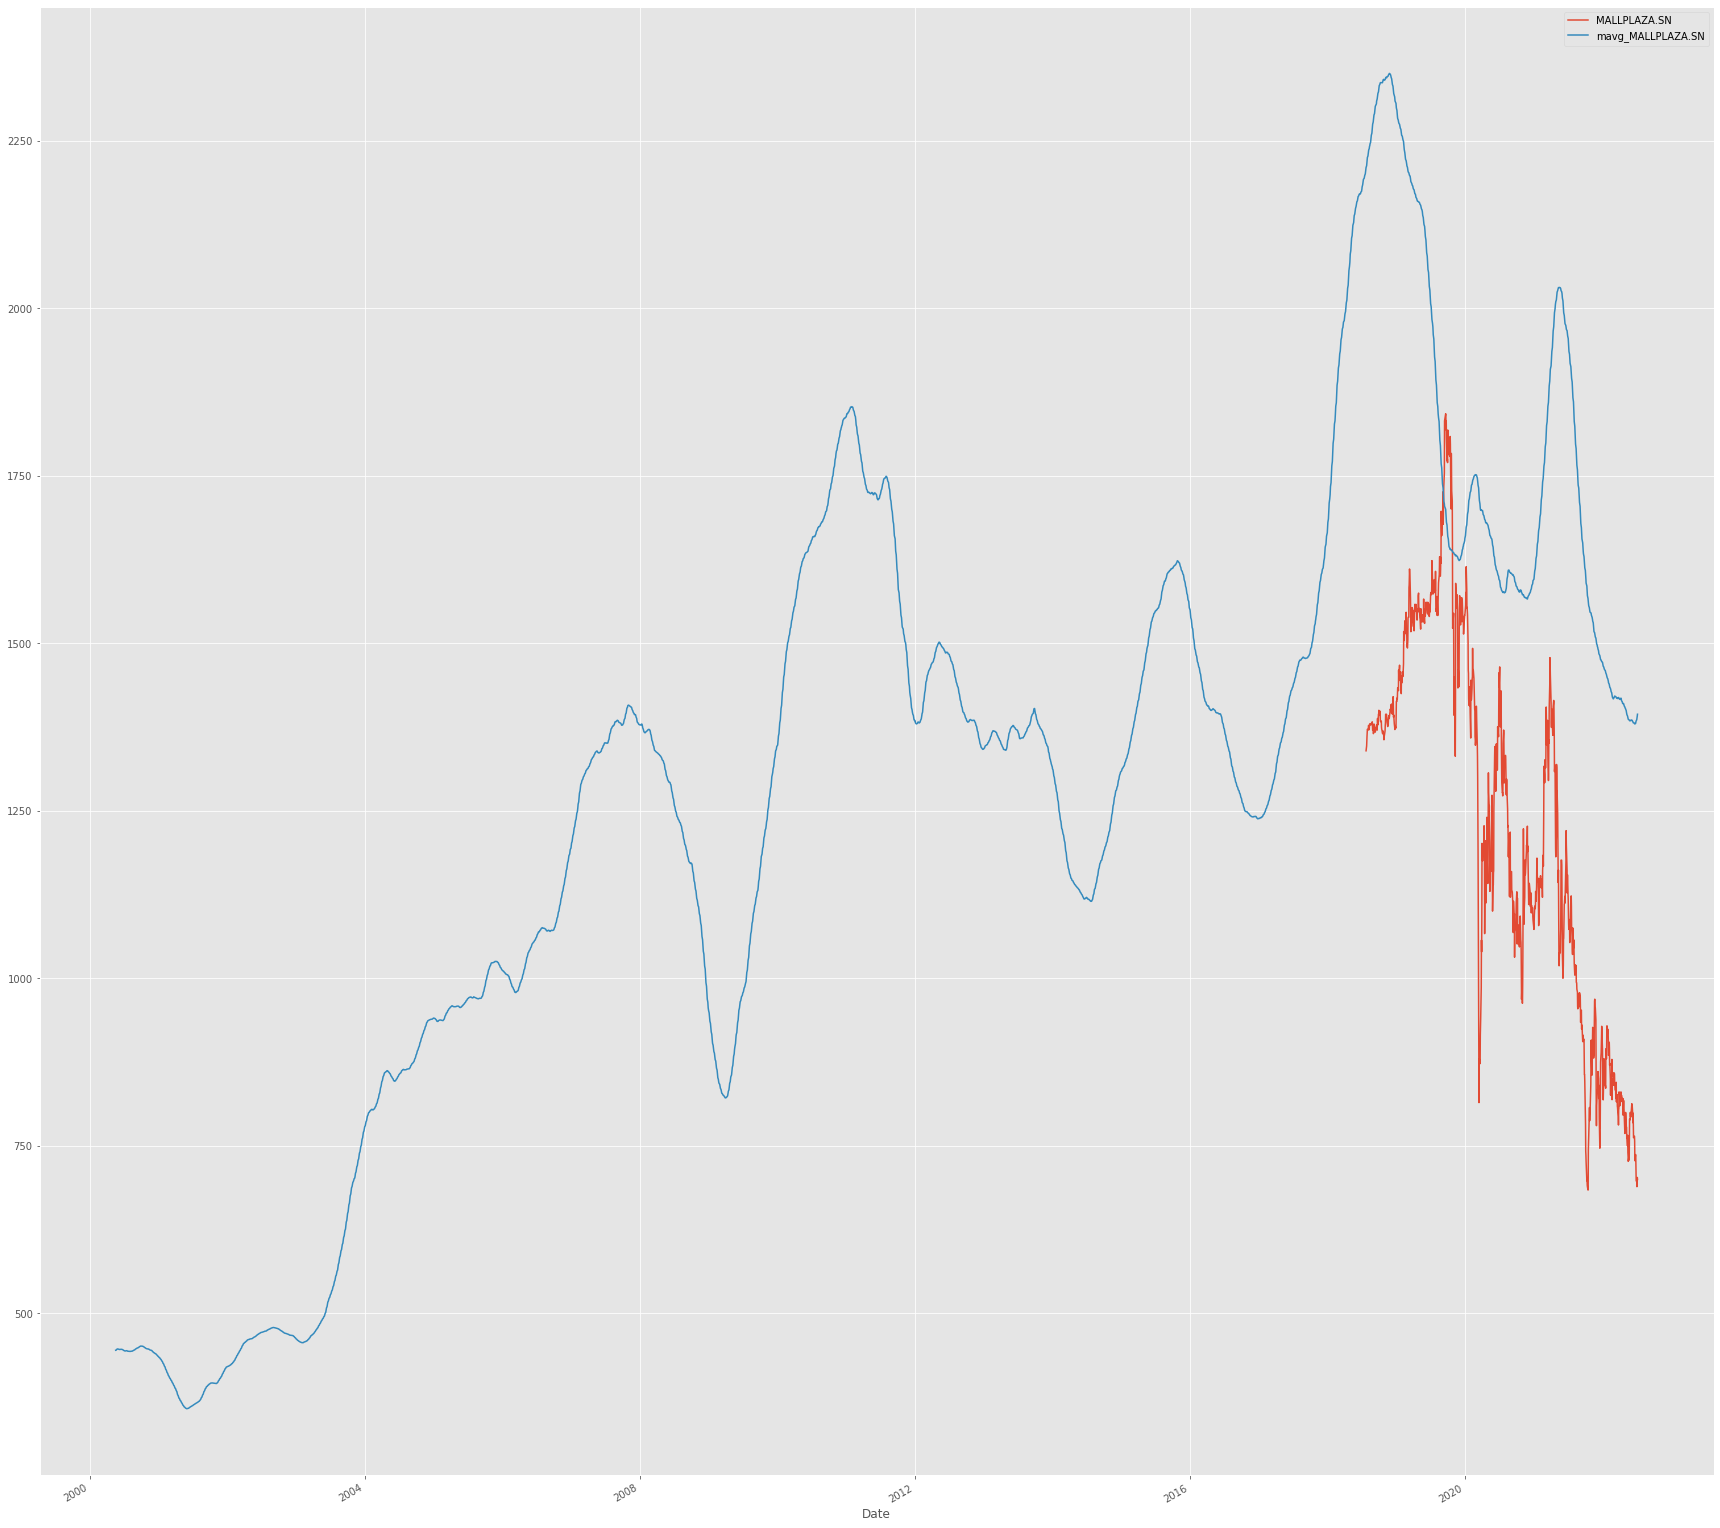

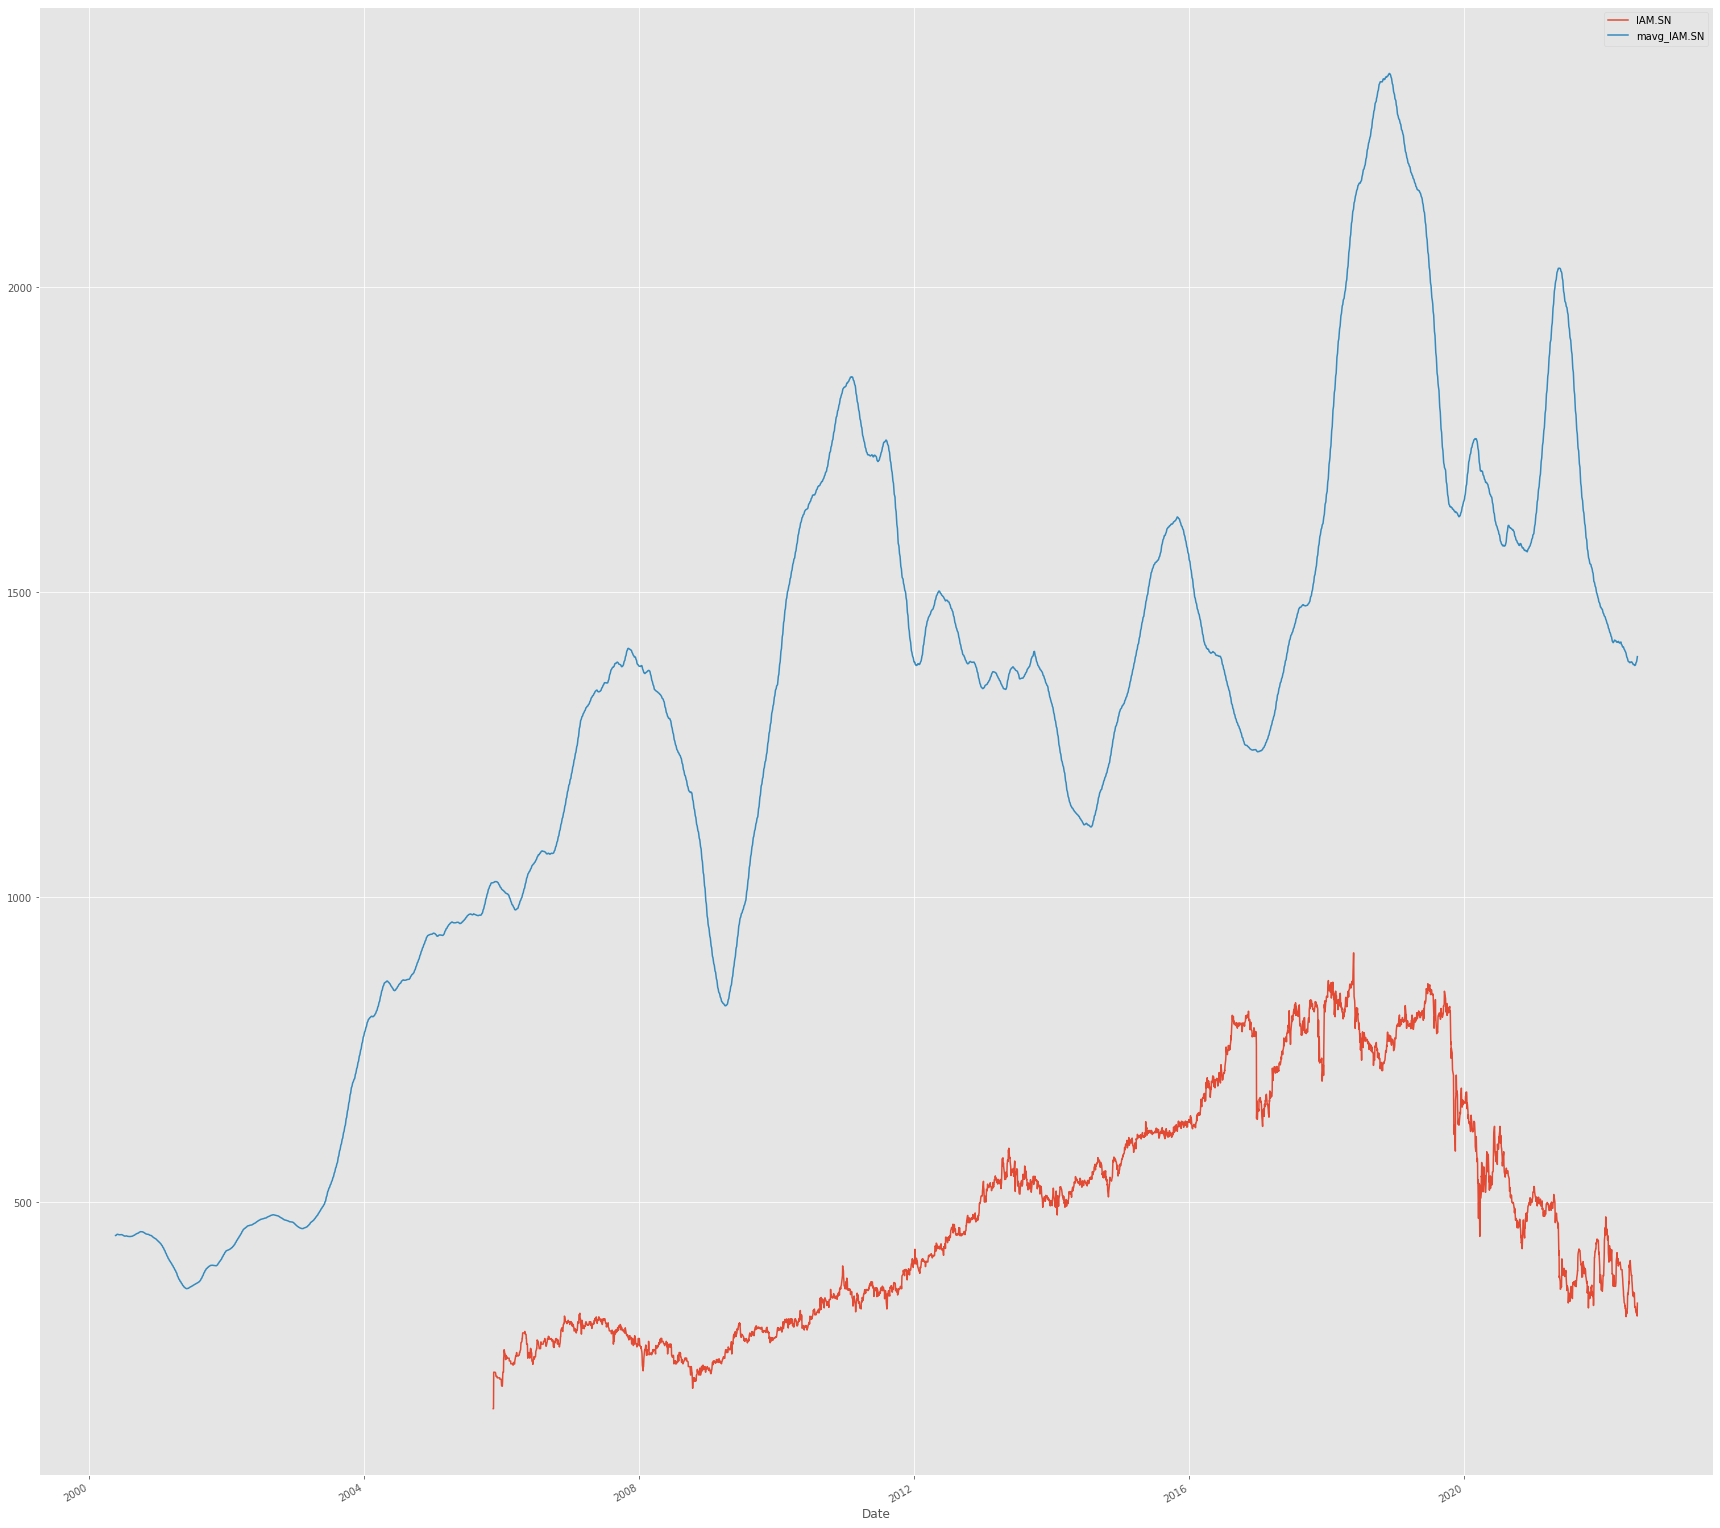

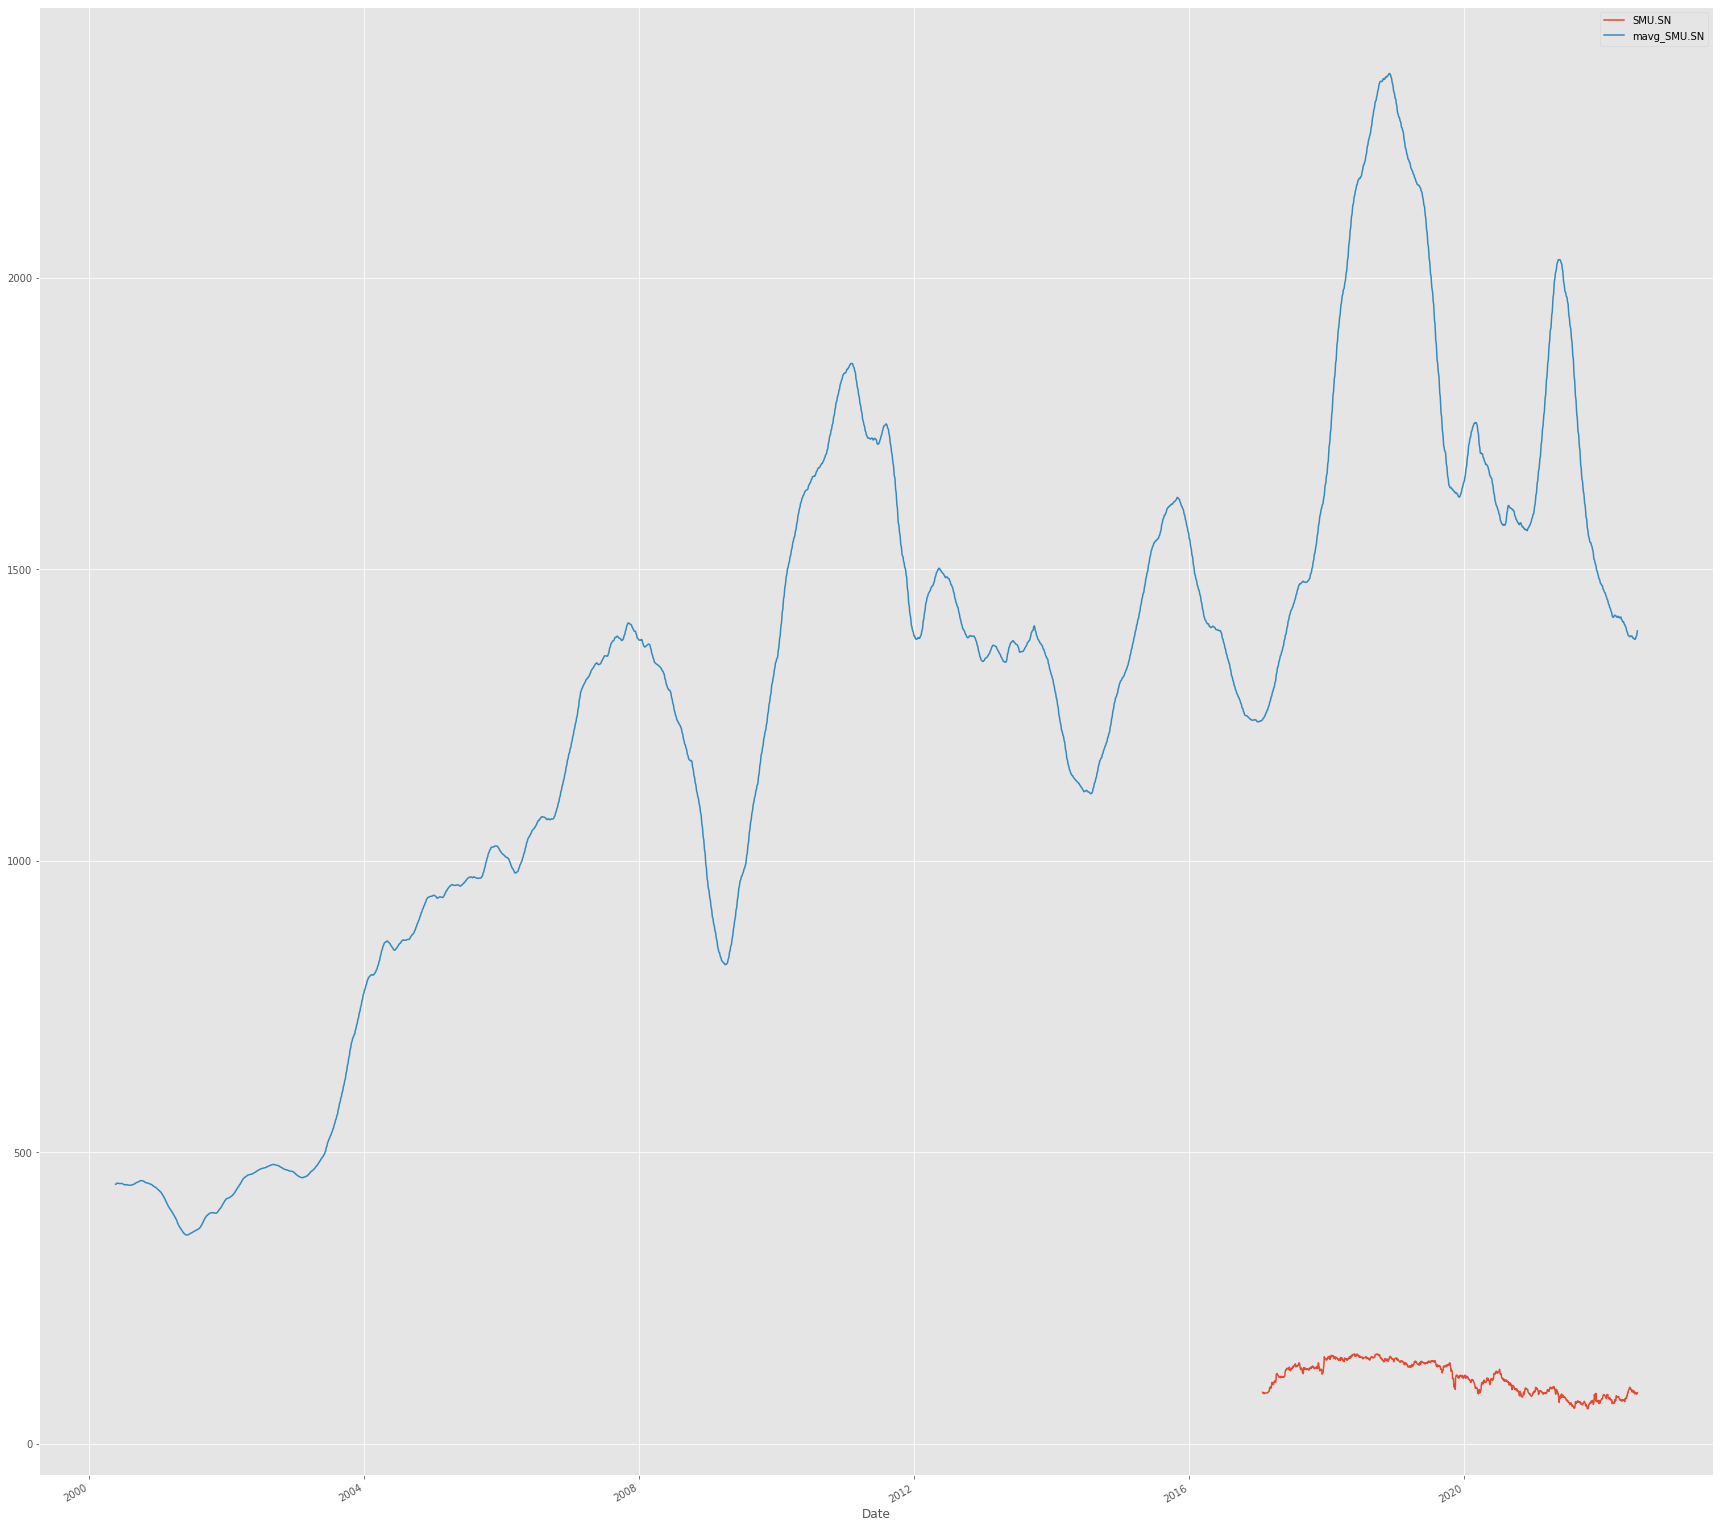

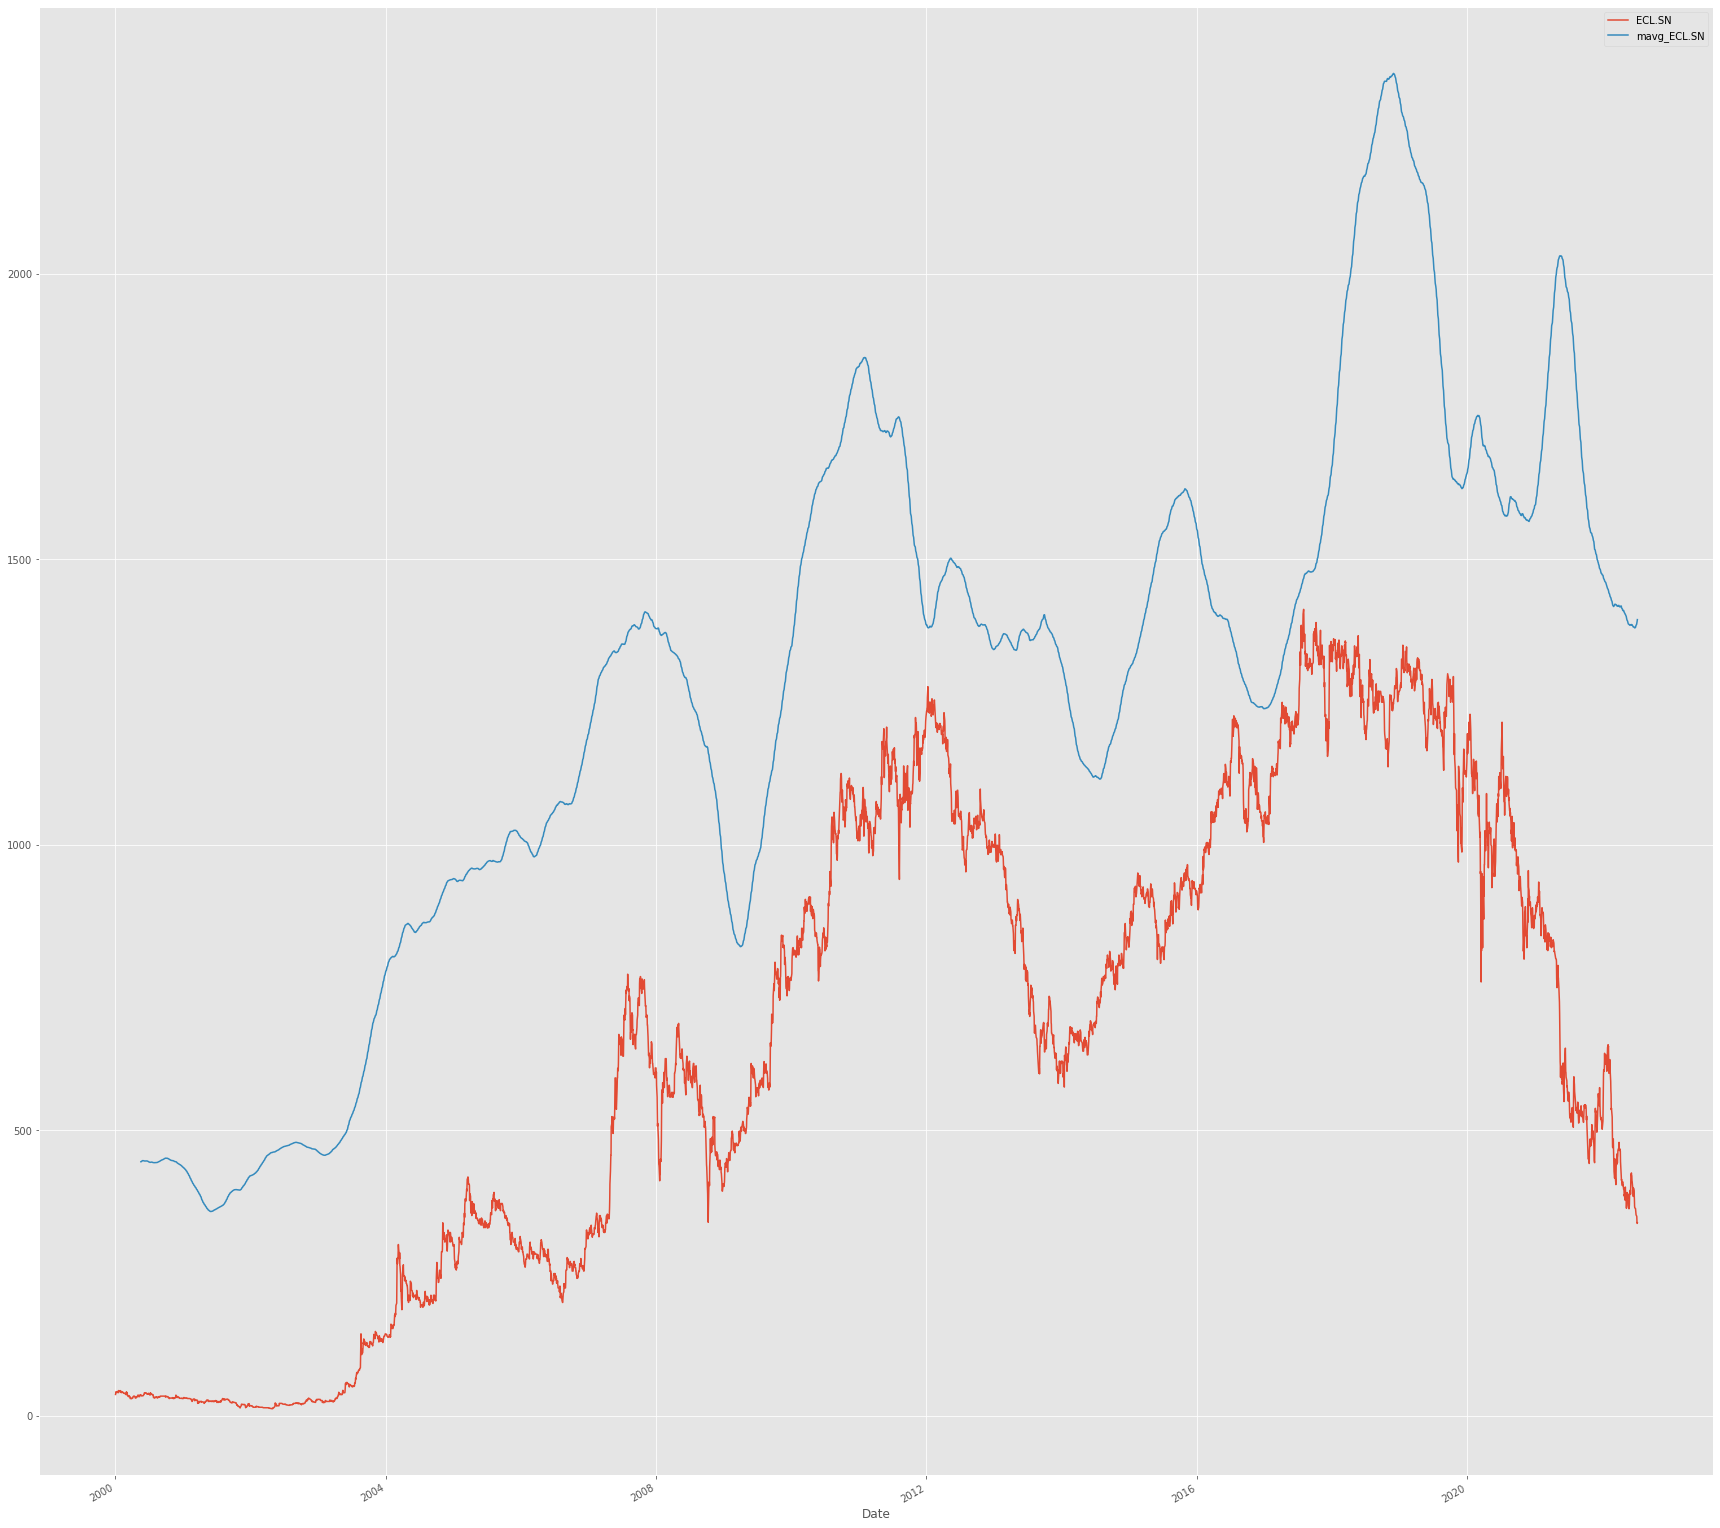

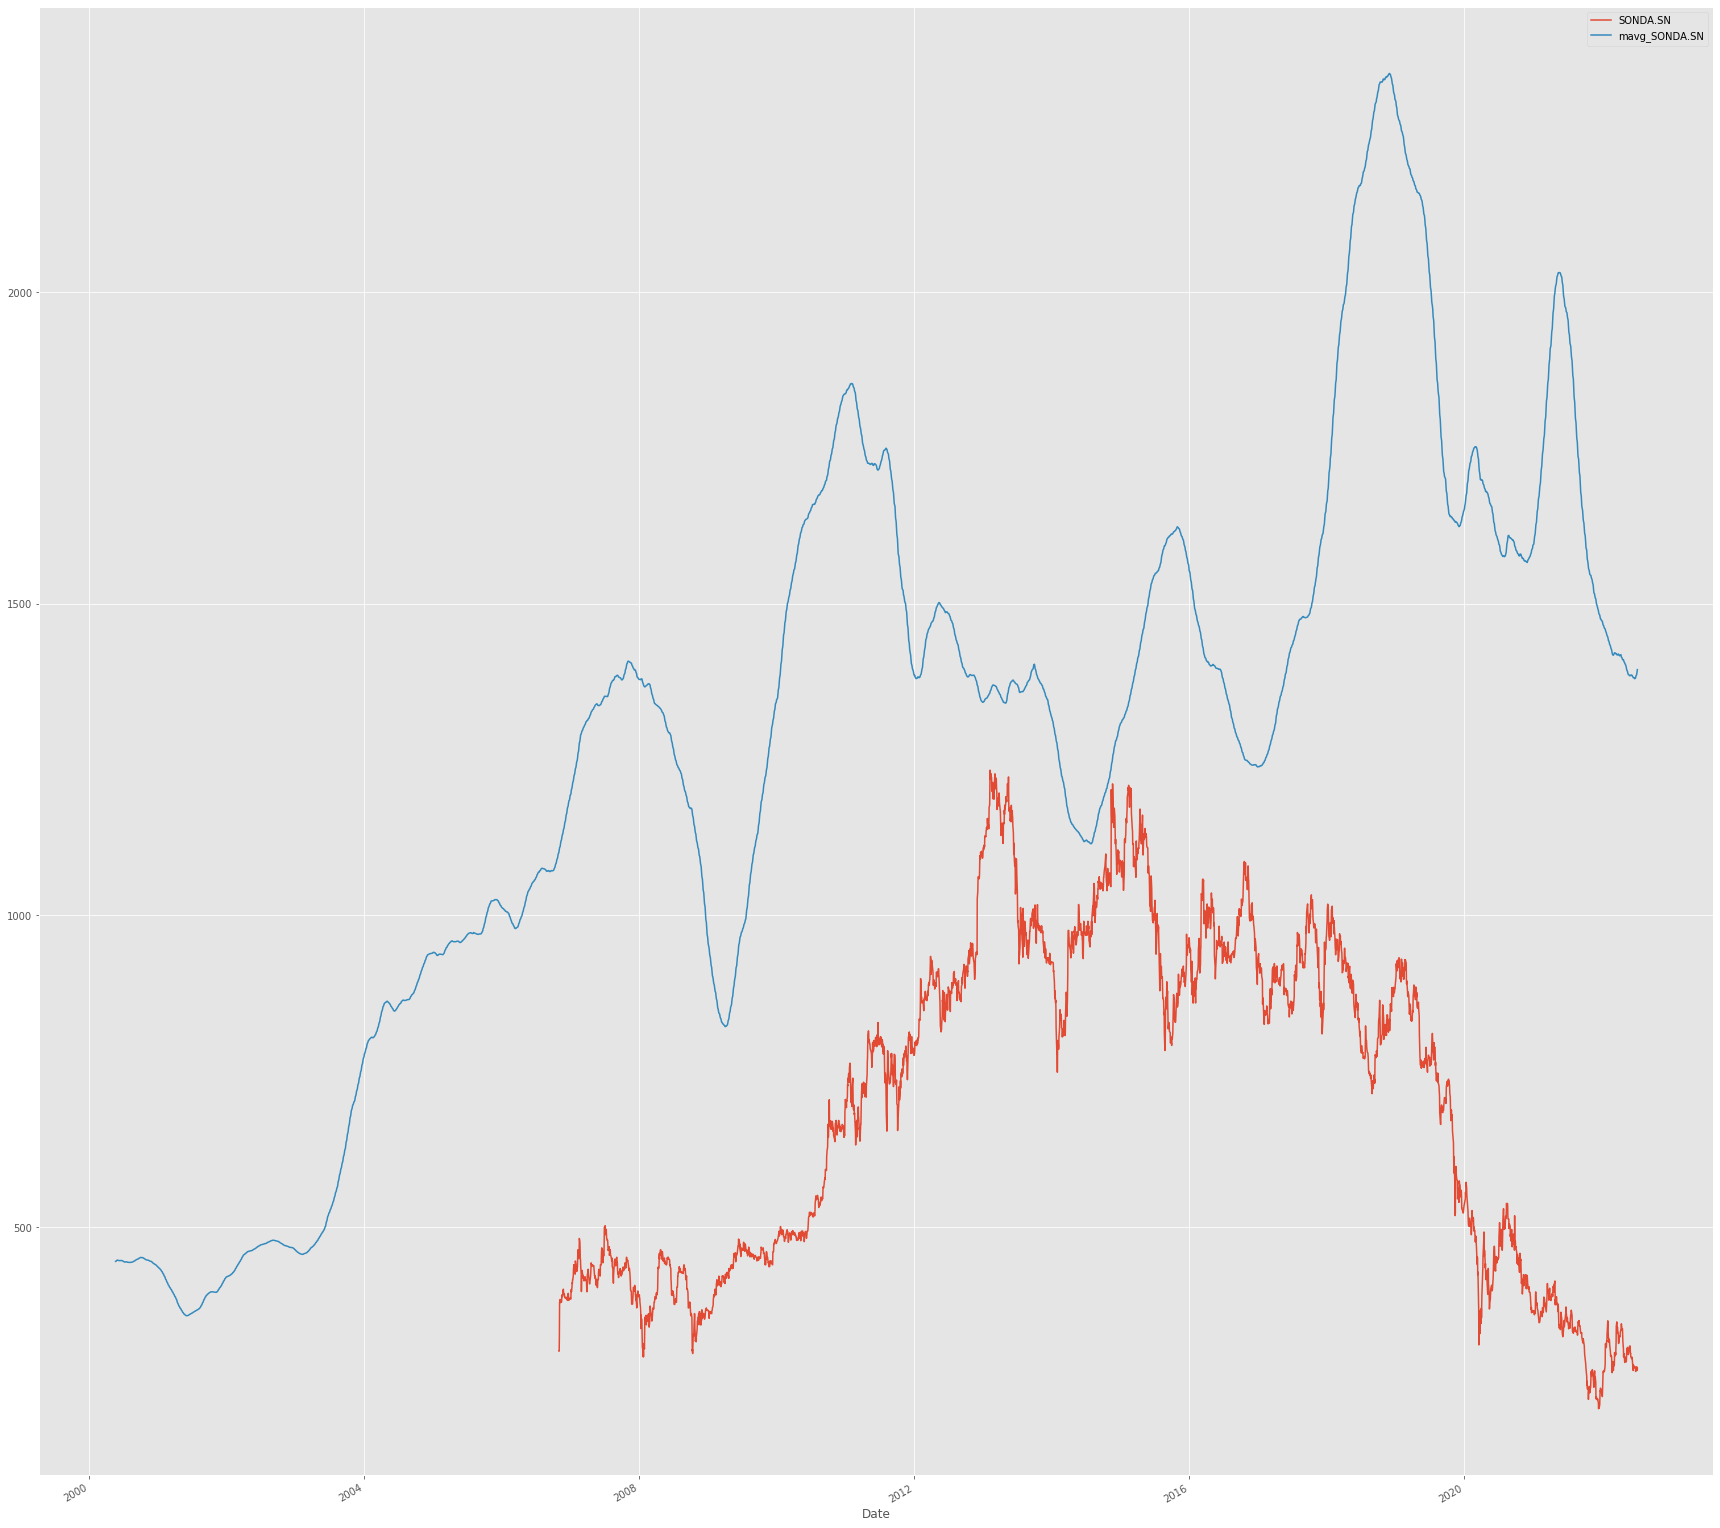

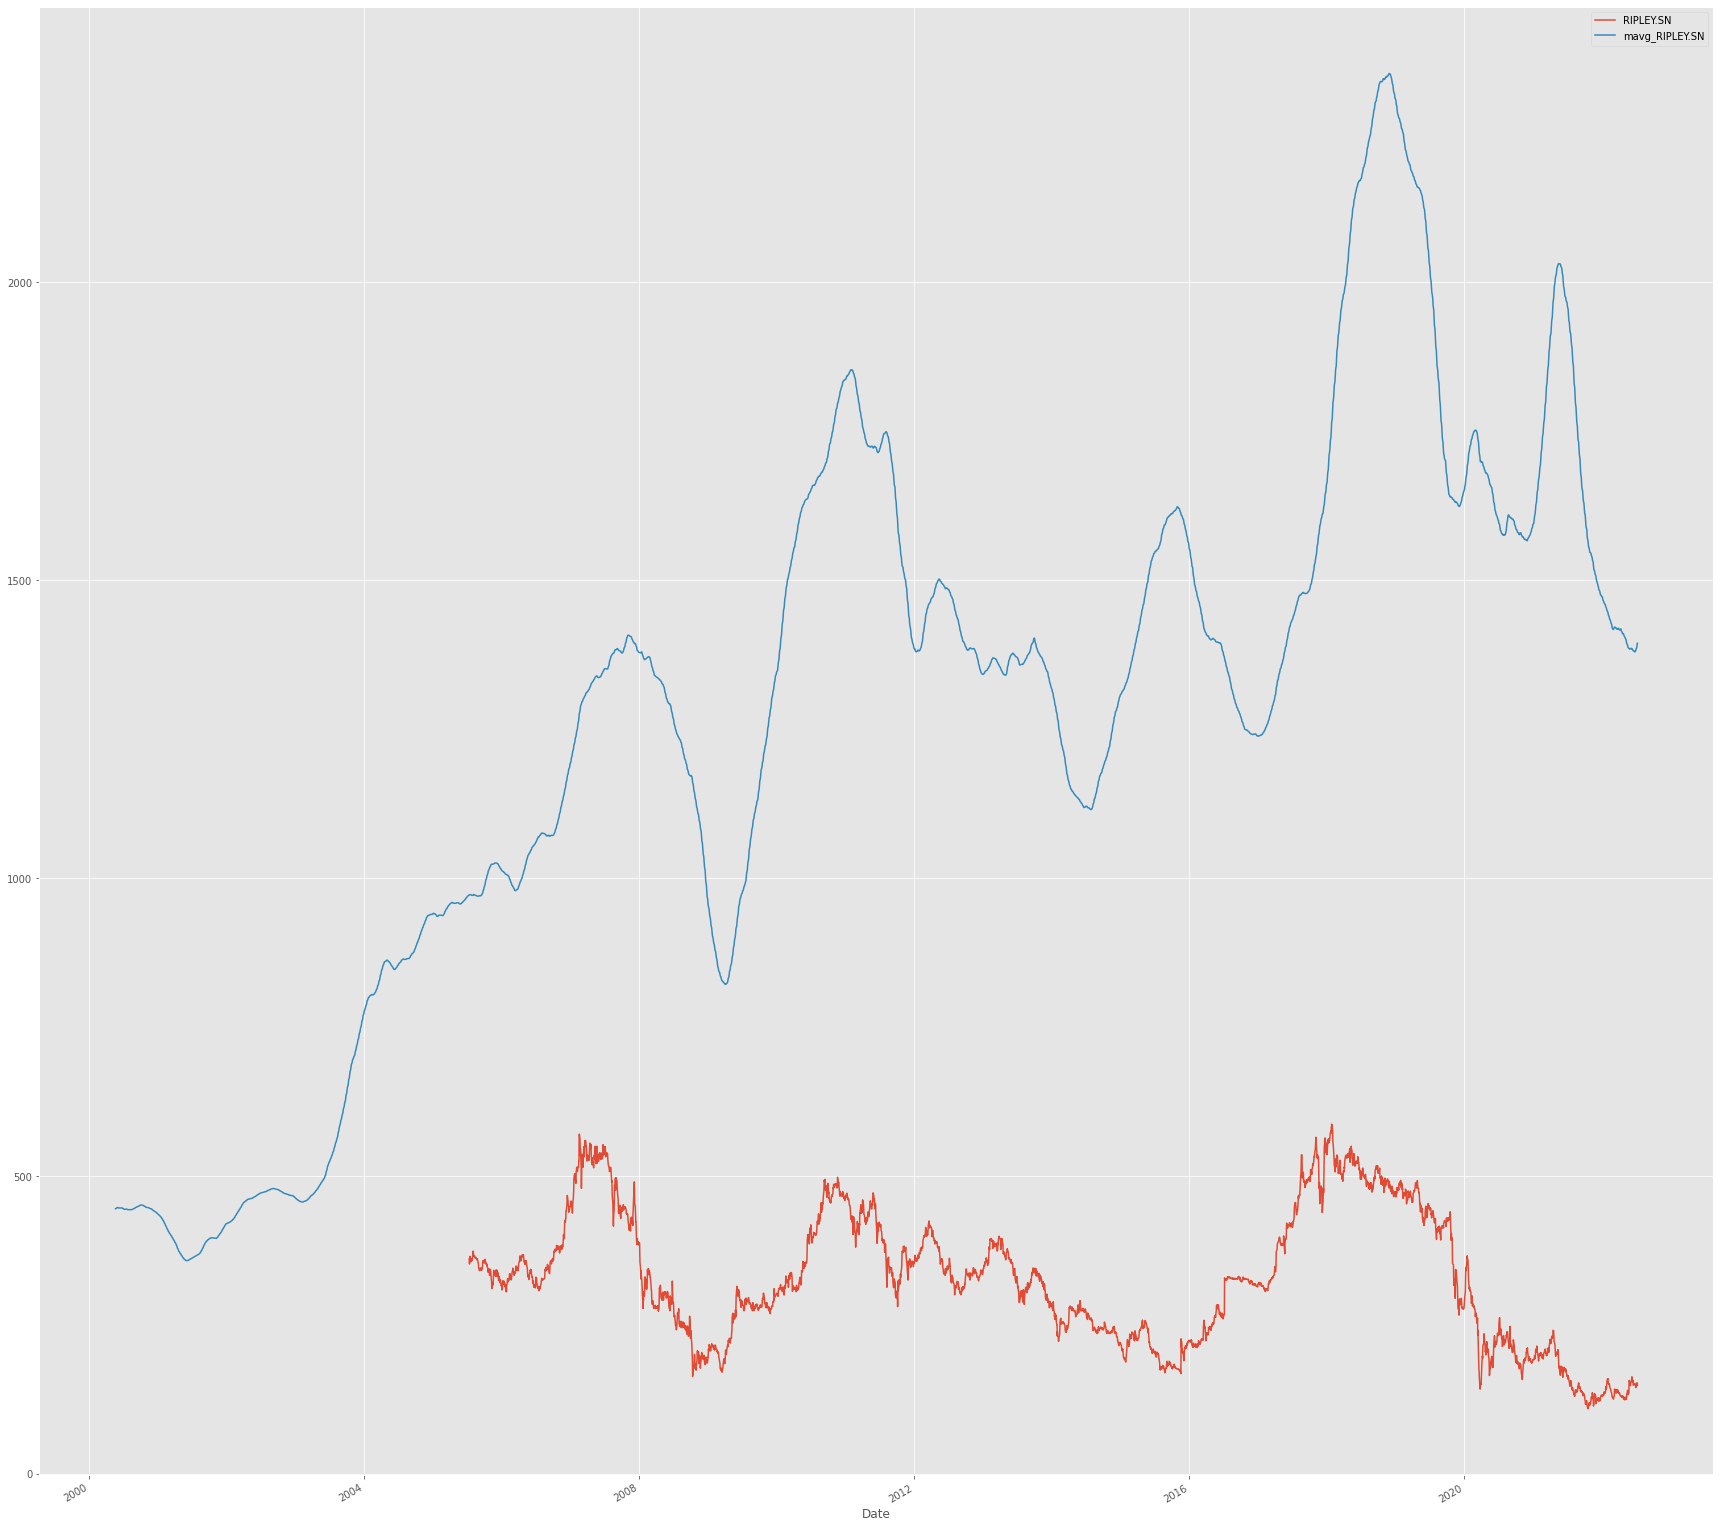

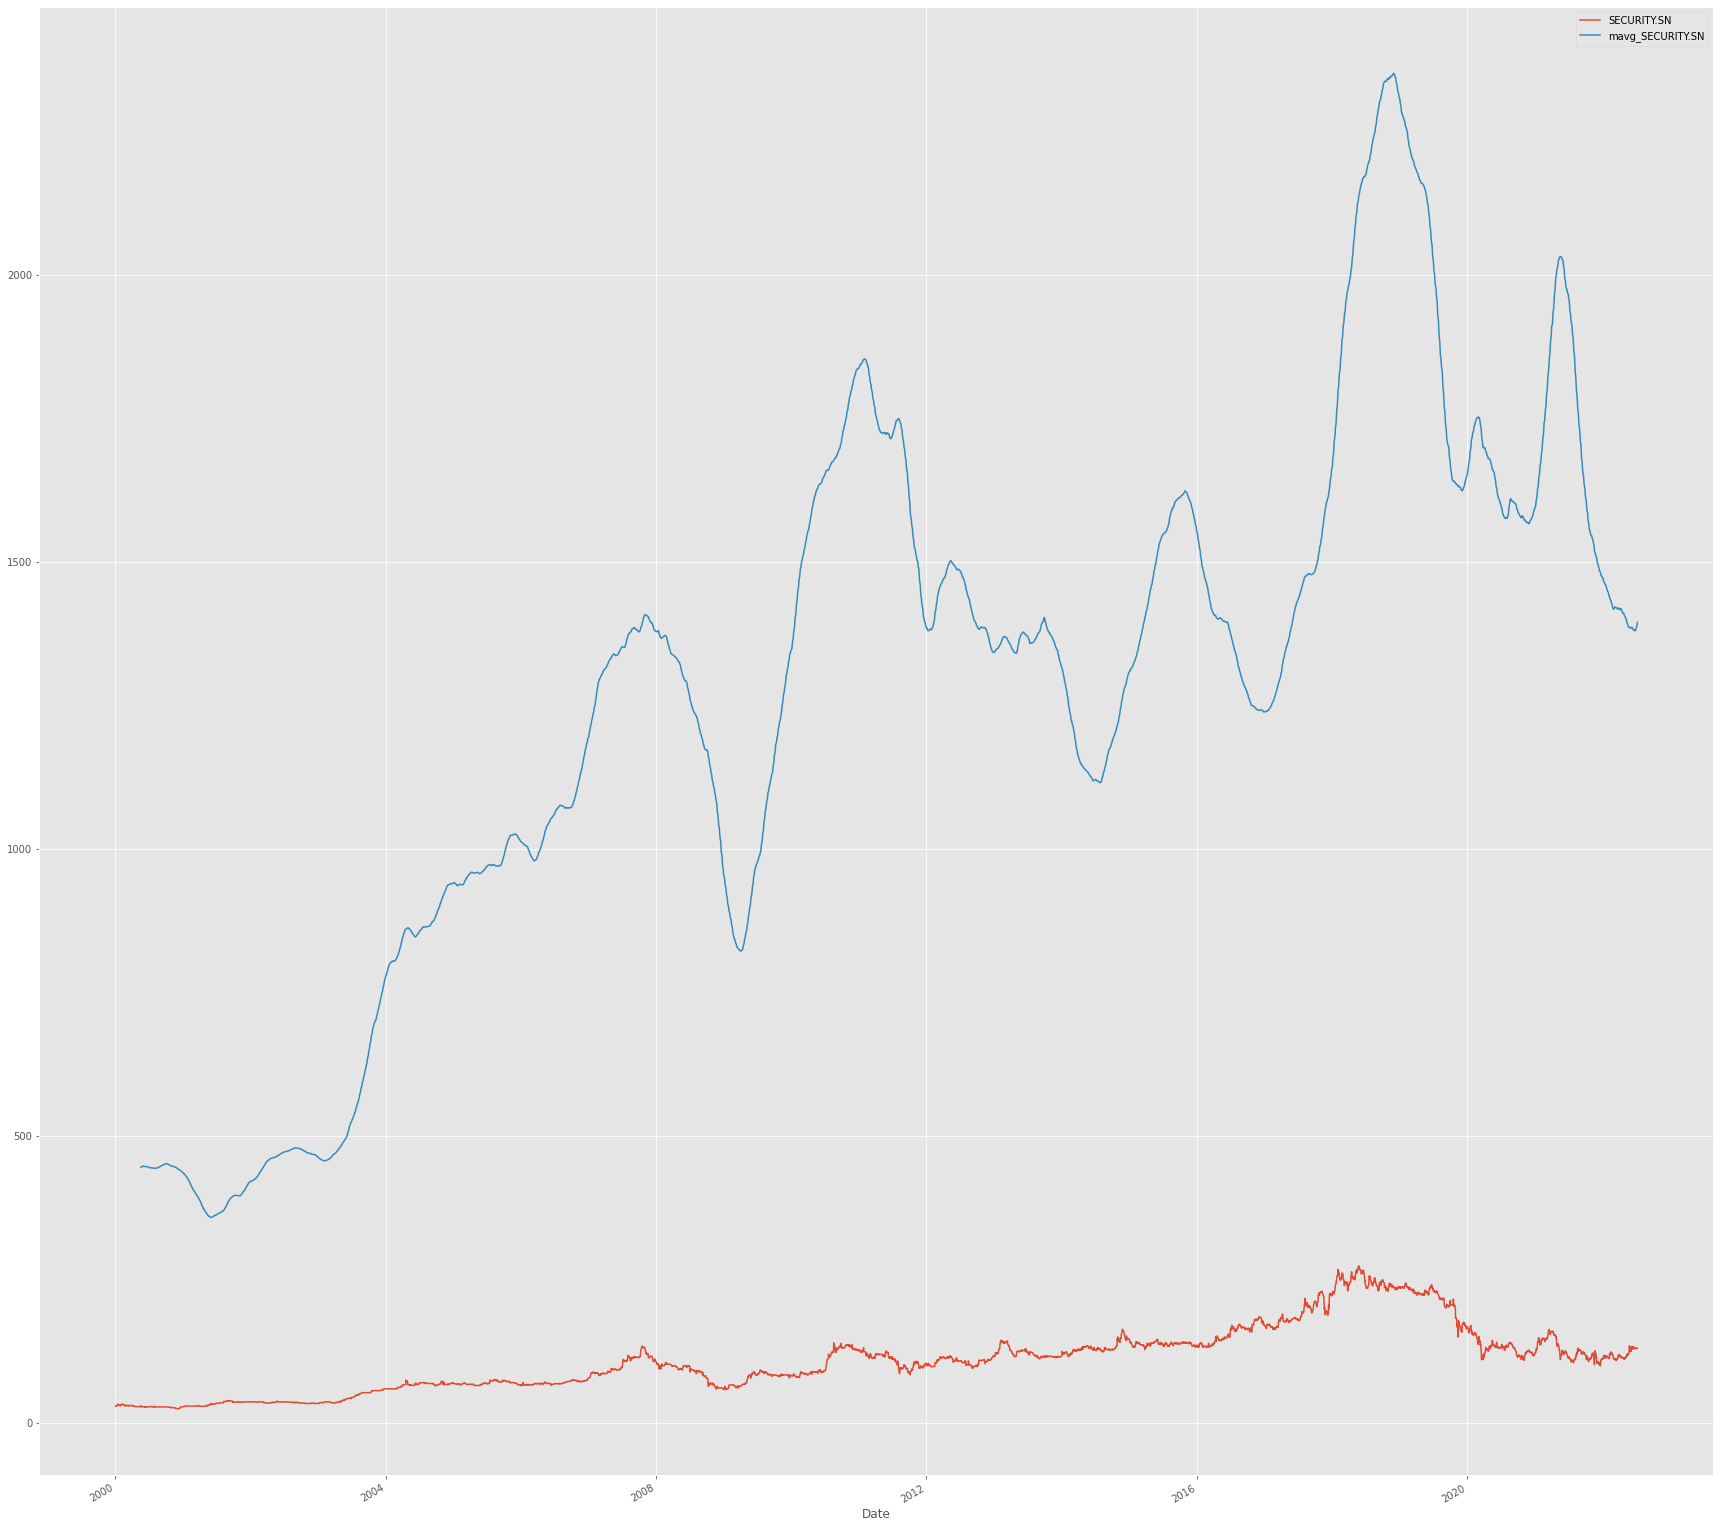

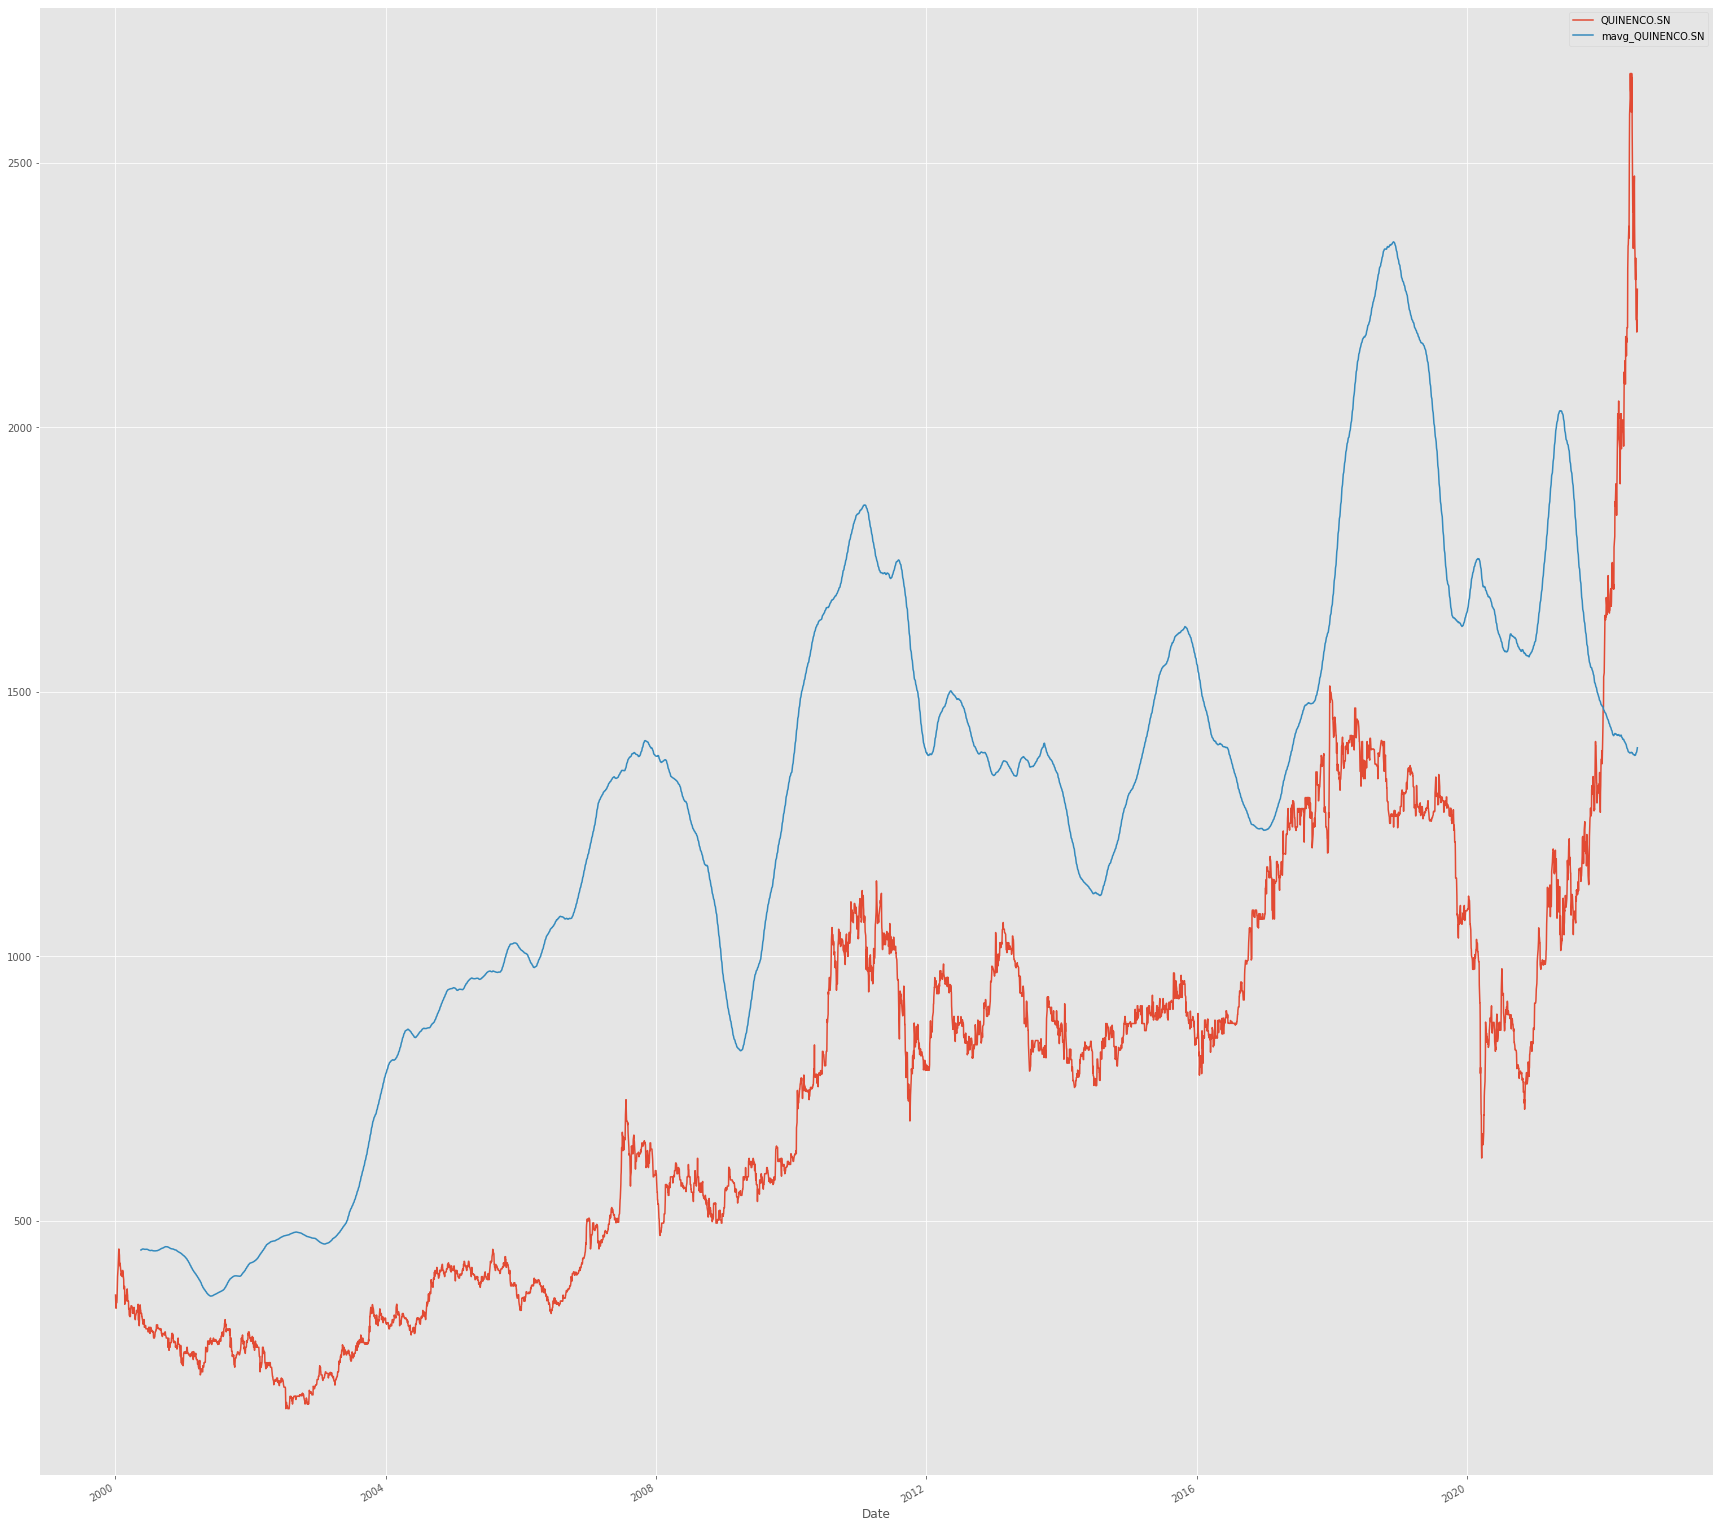

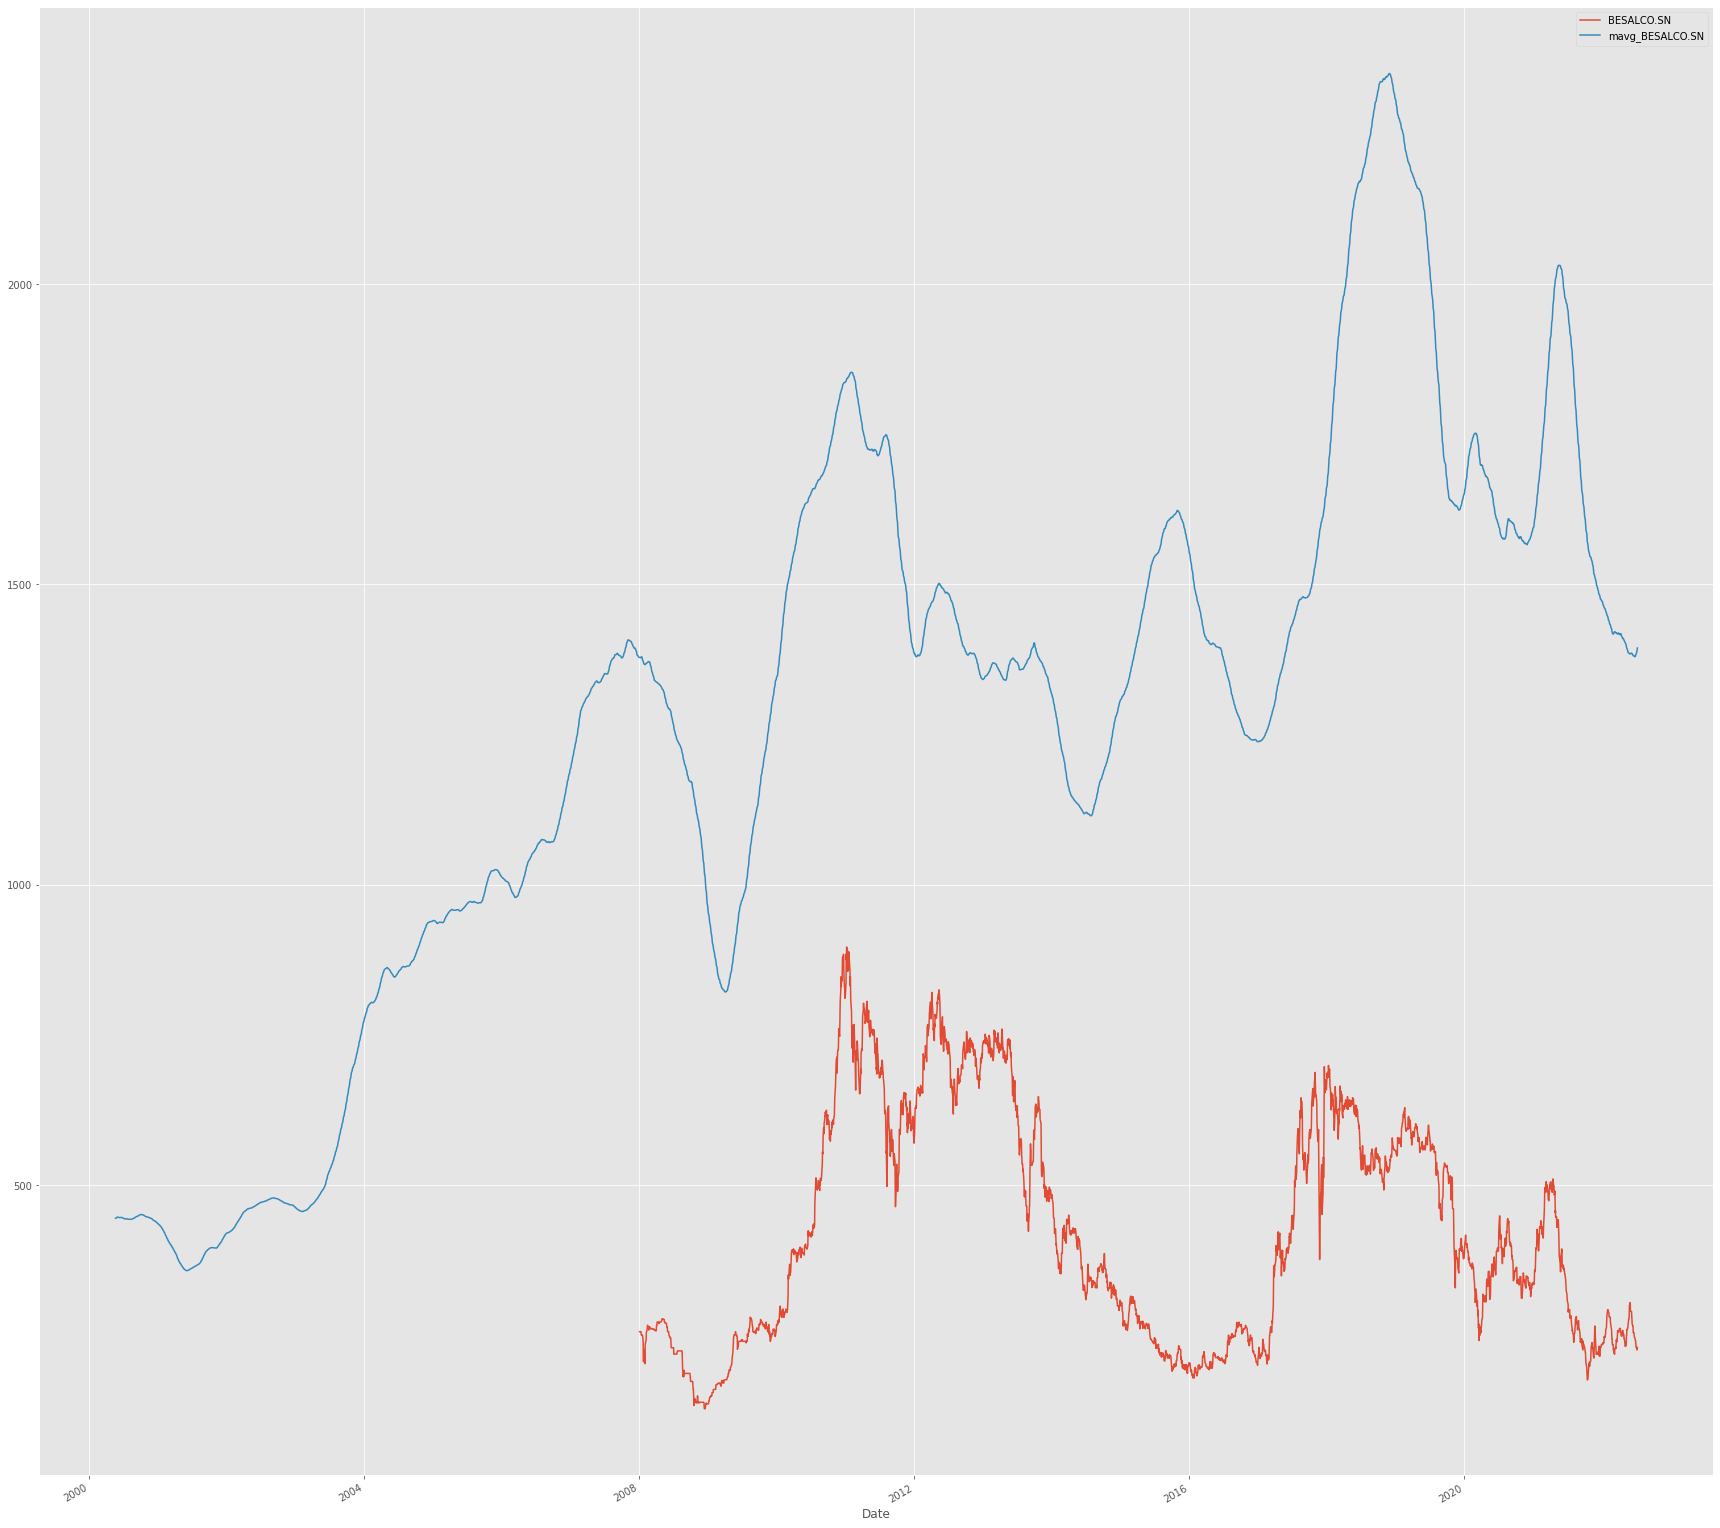

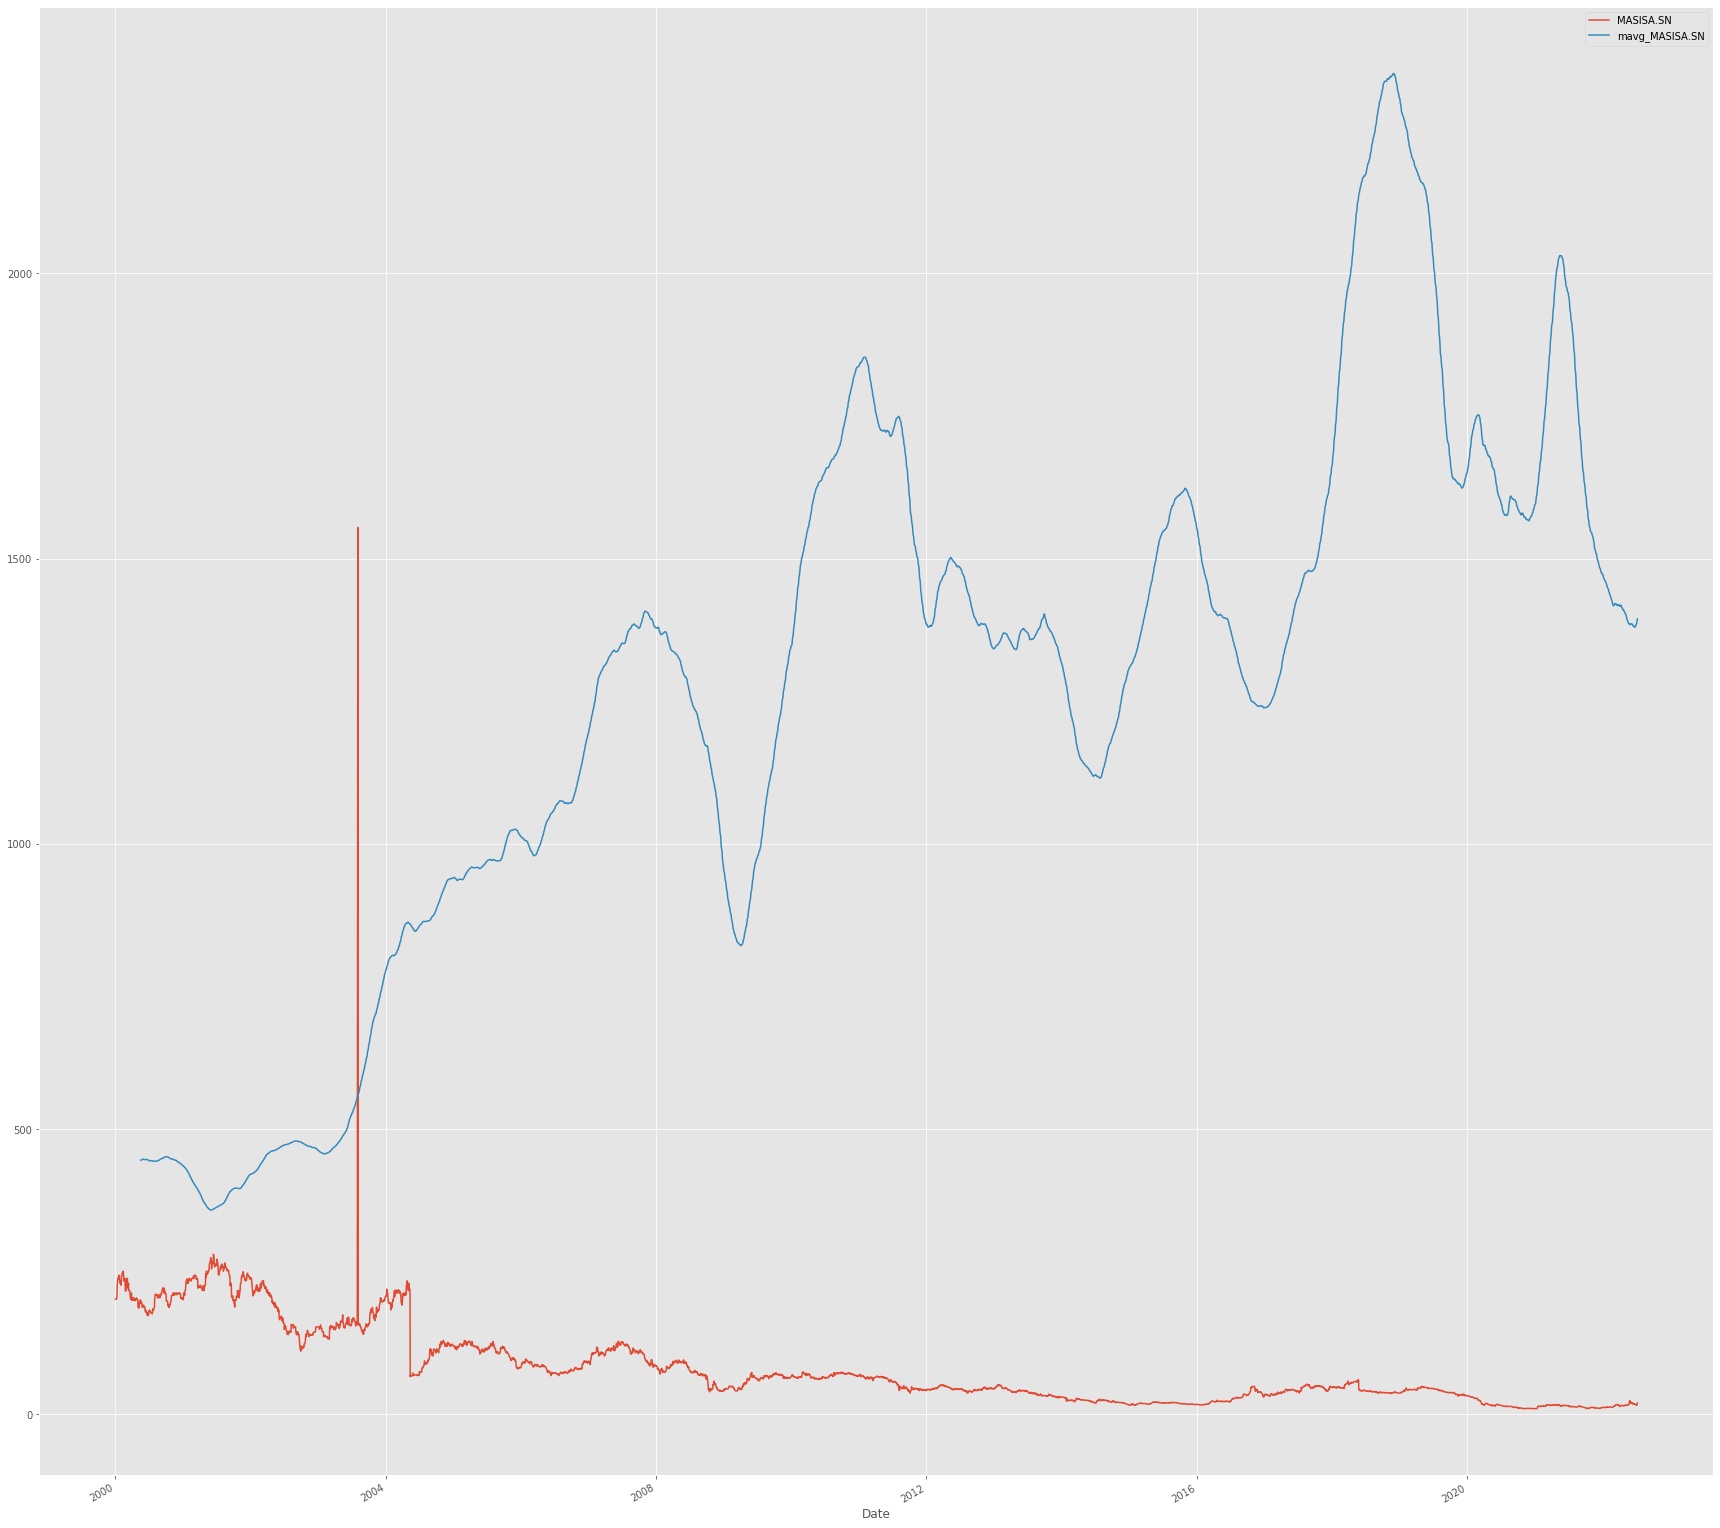

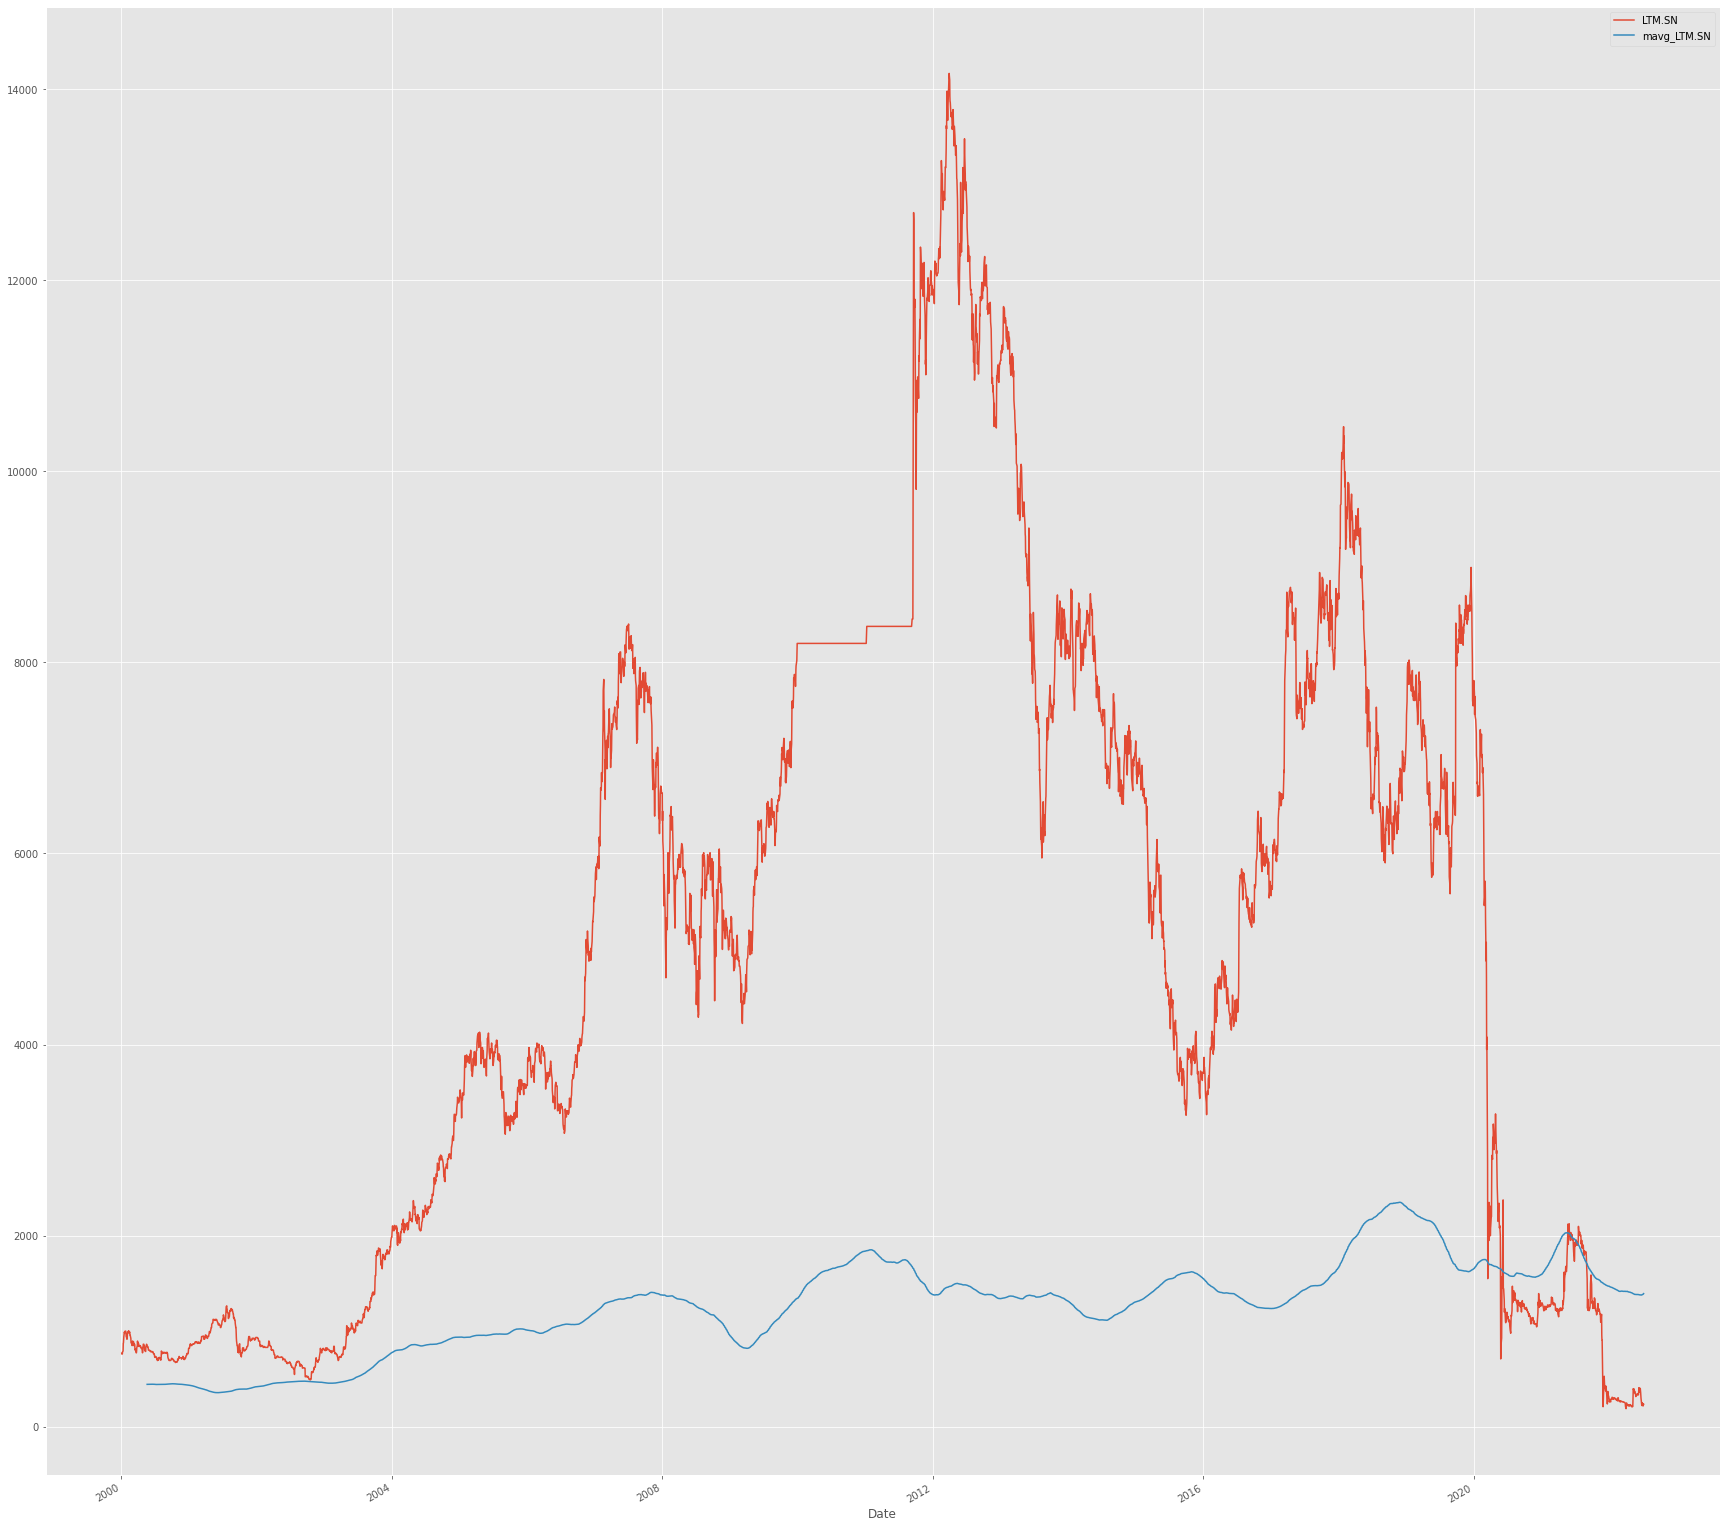

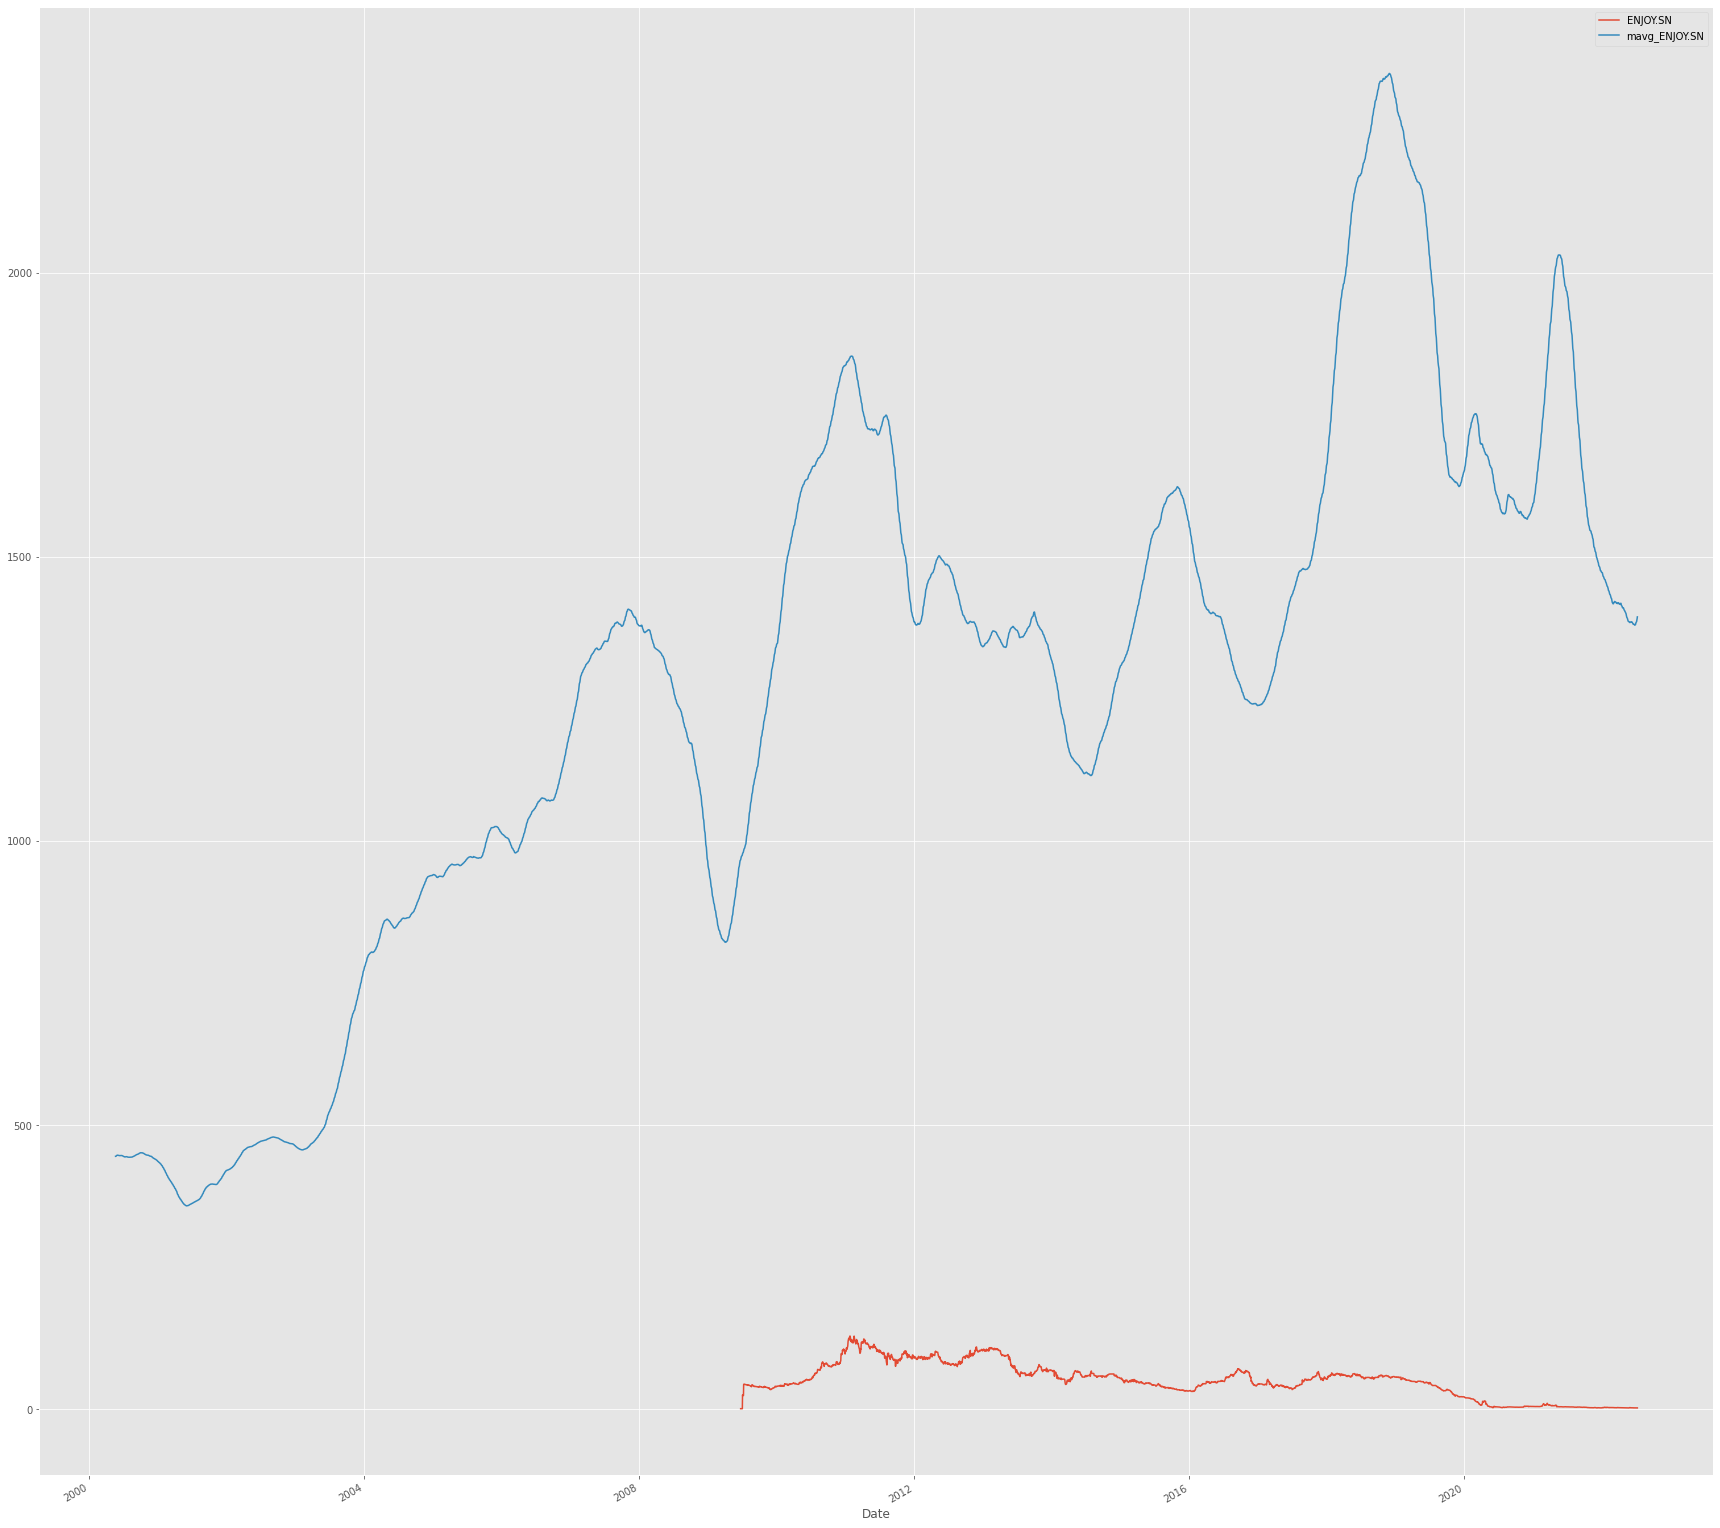

In [12]:
for i in ipsa:
  %matplotlib inline
  import matplotlib.pyplot as plt
  from matplotlib import style

  # Adjusting the size of matplotlib
  import matplotlib as mpl
  mpl.rc('figure', figsize=(30, 30))
  mpl.__version__

  # Adjusting the style of matplotlib
  style.use('ggplot')

  globals()["close_px_" + str(i[0:-3])].plot(label=i)
  globals()["mavg" + str(i[0:-3])].plot(label='mavg_'+i)
  plt.legend()
  plt.show()


Returns defined as: 
$$ $$
$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [13]:
rets = close_px / close_px.shift(1) - 1
rets.head()

# close_px.pct_change().head()

Date
2000-01-03         NaN
2000-01-04   -0.008929
2000-01-05   -0.003604
2000-01-06    0.000018
2000-01-07    0.014449
Name: Adj Close, dtype: float64

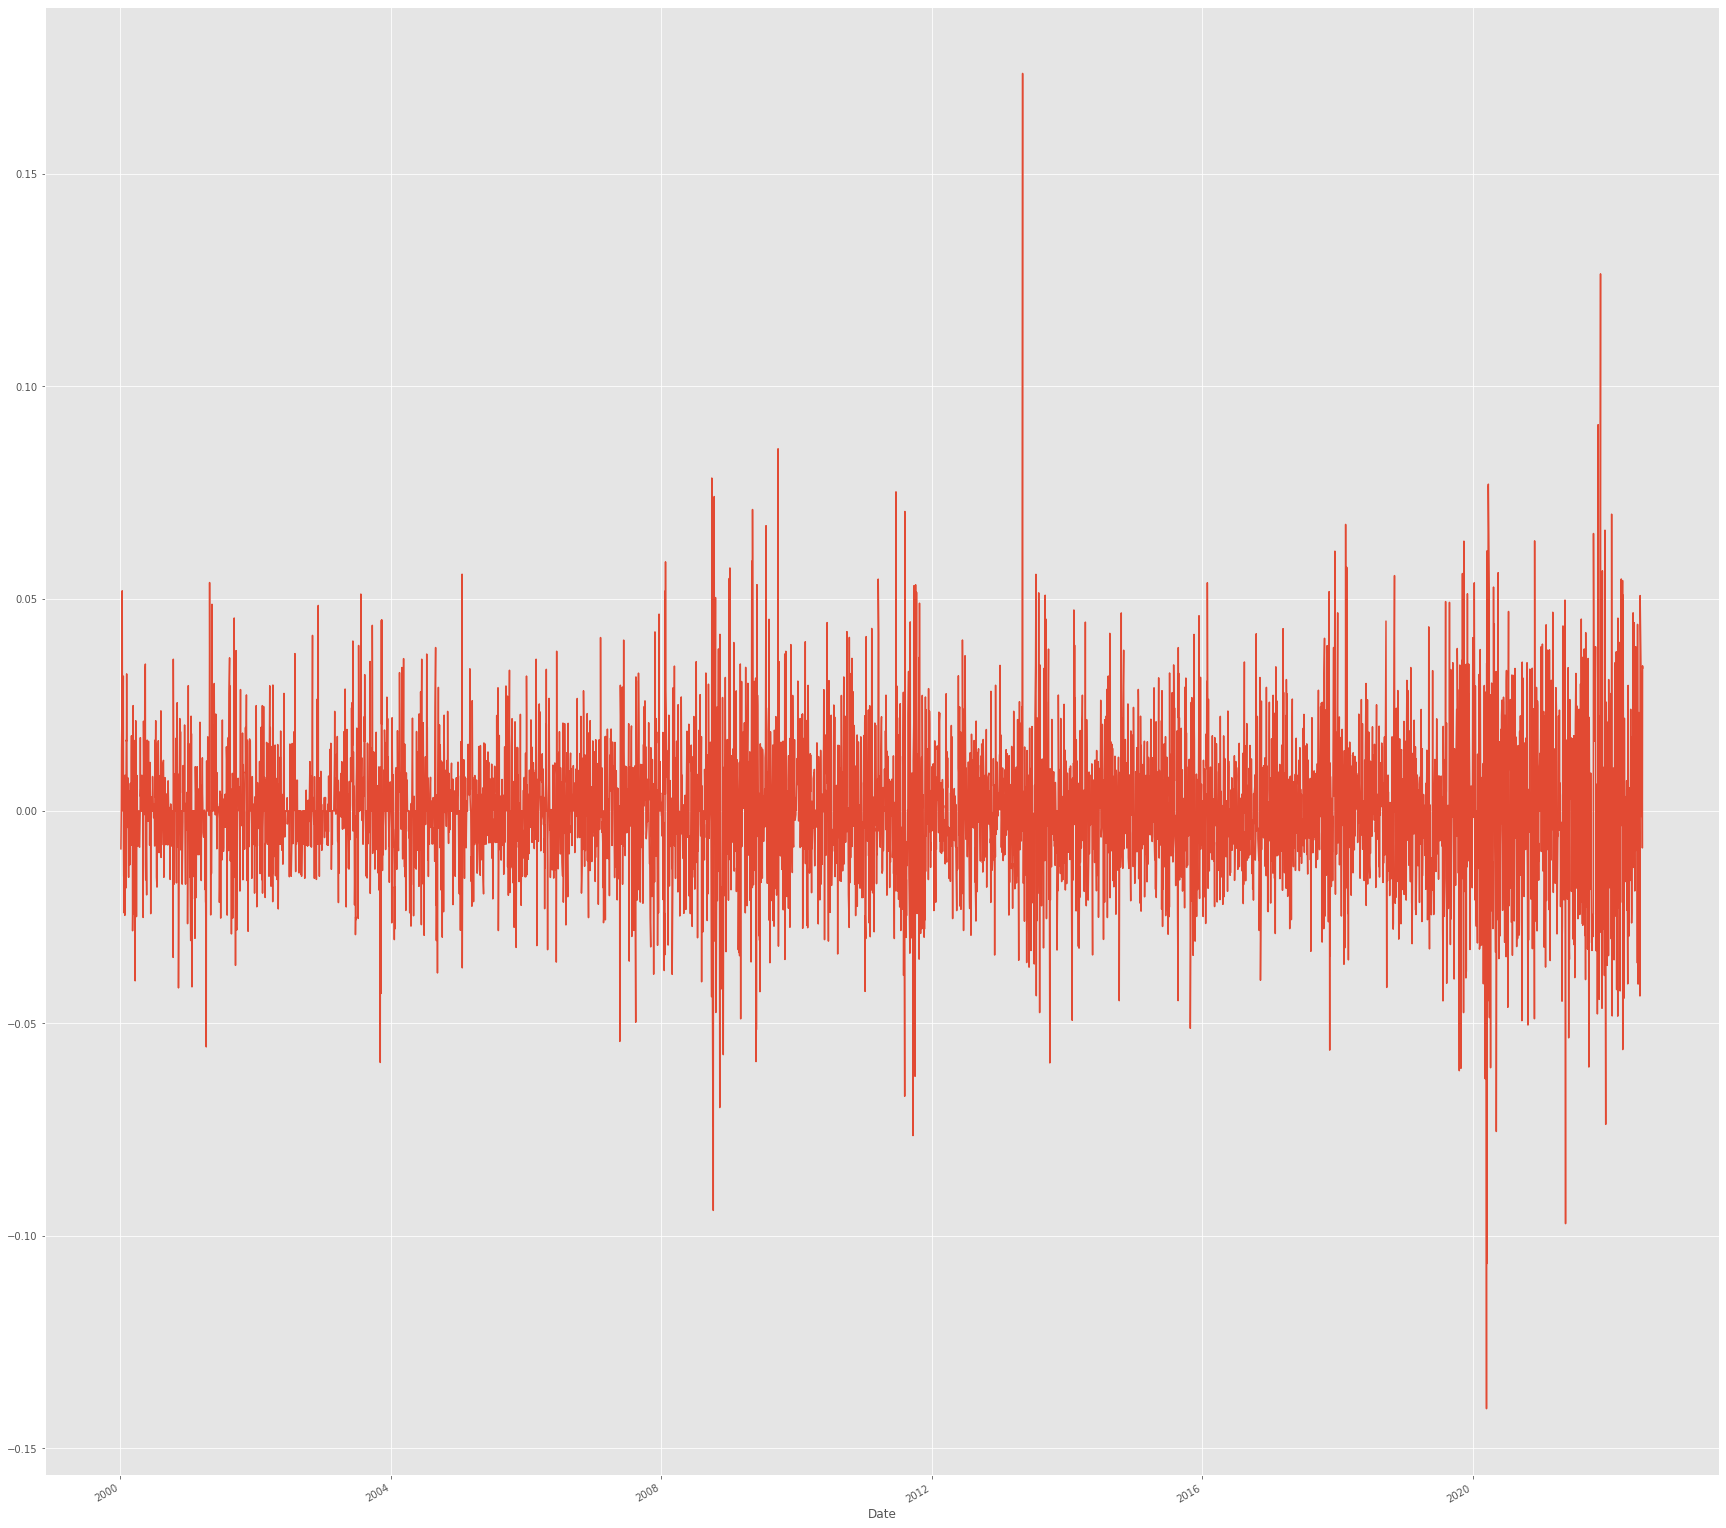

In [14]:
rets.plot(label='return')

## Doing the competitor analysis/Correlation

1. How does one company perform in relative with its competitor
2. What are the correlations among these companies

In [15]:

dfcomp = web.DataReader(ipsa,'yahoo',
                               start=start, 
                               end=end)['Adj Close']
dfcomp.tail()

Symbols        HLAG.DE  MAERSK-B.CO   VALE  INVERCAP.SN  SQM-B.SN   CHILE.SN  \
Date                                                                           
2022-07-04  244.000000      16655.0    NaN  2447.800049   79296.0  84.360001   
2022-07-05  248.600006      16045.0  13.79  2447.800049   80350.0  82.599998   
2022-07-06  251.199997      16110.0  13.79  2440.000000   80390.0  83.000000   
2022-07-07  272.399994      17255.0  14.49  2511.100098   84646.0  82.769997   
2022-07-08  281.399994      17710.0  14.25  2497.699951   84142.0  83.000000   

Symbols     BSANTANDER.SN  COPEC.SN  CENCOSUD.SN  FALABELLA.SN  ...  \
Date                                                            ...   
2022-07-04      37.939999    6912.0  1189.000000        2058.5  ...   
2022-07-05      37.250000    6950.0  1190.000000        2059.0  ...   
2022-07-06      36.880001    6850.0  1190.400024        2037.0  ...   
2022-07-07      36.500000    6910.0  1221.099976        2024.0  ...   
2022-07-08      36.910000    7000.0  1235.000000        1988.0  ...   

Symbols        SMU.SN      ECL.SN    SONDA.SN   RIPLEY.SN  SECURITY.SN  \
Date                                                                     
2022-07-04  85.000000  350.160004  272.649994  147.839996   129.869995   
2022-07-05  85.000000  348.899994  275.890015  150.500000   130.330002   
2022-07-06  86.099998  338.779999  270.000000  153.000000   130.089996   
2022-07-07  86.919998  337.100006  273.079987  149.500000   130.229996   
2022-07-08  87.480003  338.279999  273.079987  149.039993   130.000000   

Symbols     QUINENCO.SN  BESALCO.SN  MASISA.SN      LTM.SN  ENJOY.SN  
Date                                                                  
2022-07-04  2202.600098  230.419998      15.90  224.710007     2.364  
2022-07-05  2180.000000  226.809998      15.62  218.699997     2.328  
2022-07-06  2196.000000  226.000000      15.85  239.770004     2.304  
2022-07-07  2215.000000  229.910004      18.00  231.240005     2.320  
2022-07-08  2261.000000  229.910004      19.58  236.199997     2.320  

[5 rows x 37 columns]

Get the dimension of dataframes

In [16]:
dfcomp.shape

(5839, 37)

In [17]:
retscomp = dfcomp.pct_change()

corr = retscomp.corr()
corr

Symbols         HLAG.DE  MAERSK-B.CO      VALE  INVERCAP.SN  SQM-B.SN  \
Symbols                                                                 
HLAG.DE        1.000000     0.366164  0.109622     0.034047  0.105770   
MAERSK-B.CO    0.366164     1.000000  0.312265     0.105634  0.200669   
VALE           0.109622     0.312265  1.000000     0.148560  0.361377   
INVERCAP.SN    0.034047     0.105634  0.148560     1.000000  0.146241   
SQM-B.SN       0.105770     0.200669  0.361377     0.146241  1.000000   
CHILE.SN       0.067730     0.172970  0.236809     0.132113  0.339568   
BSANTANDER.SN  0.081609     0.205312  0.292833     0.126314  0.358998   
COPEC.SN       0.057235     0.177222  0.276118     0.137711  0.347745   
CENCOSUD.SN    0.011845     0.160788  0.236175     0.115453  0.305982   
FALABELLA.SN   0.094402     0.172788  0.256627     0.135457  0.331904   
ENELAM.SN      0.077868     0.156739  0.269651     0.108976  0.339213   
CMPC.SN        0.068469     0.169052  0.238885     0.122607  0.316243   
BCI.SN         0.036471     0.180724  0.221117     0.108583  0.303192   
VAPORES.SN     0.367606     0.181339  0.195832     0.126076  0.240440   
CAP.SN         0.096973     0.208256  0.365940     0.434173  0.347374   
CCU.SN         0.074729     0.125905  0.195132     0.088410  0.284442   
ENELCHILE.SN   0.050664     0.133570  0.111937     0.088829  0.258154   
ANDINA-B.SN    0.050413     0.126596  0.188683     0.106710  0.269702   
CONCHATORO.SN  0.004428     0.096150  0.102006     0.098611  0.188593   
PARAUCO.SN     0.083547     0.157190  0.173311     0.119061  0.233159   
ITAUCORP.SN    0.062917     0.153992  0.168278     0.116132  0.271228   
AGUAS-A.SN     0.073702     0.104575  0.131417     0.092355  0.191827   
COLBUN.SN      0.075166     0.153424  0.180924     0.100546  0.248935   
CENCOSHOPP.SN  0.113049     0.184310  0.166133     0.096778  0.278271   
ENTEL.SN       0.055634     0.130829  0.172925     0.115563  0.262578   
MALLPLAZA.SN   0.008511     0.102186  0.085251     0.097252  0.288799   
IAM.SN         0.053264     0.123714  0.159430     0.112208  0.212937   
SMU.SN         0.061930     0.142625  0.131743     0.133924  0.230842   
ECL.SN         0.044373     0.110810  0.151953     0.102116  0.164084   
SONDA.SN       0.080646     0.170541  0.214502     0.116684  0.293498   
RIPLEY.SN      0.031972     0.184775  0.234091     0.149348  0.255474   
SECURITY.SN    0.084939     0.112013  0.118602     0.118979  0.177655   
QUINENCO.SN    0.082085     0.105853  0.129146     0.096115  0.184886   
BESALCO.SN     0.051978     0.148536  0.146461     0.127679  0.210911   
MASISA.SN      0.052601     0.024888  0.017988     0.019806  0.036474   
LTM.SN         0.003648     0.134422  0.176750     0.080841  0.209936   
ENJOY.SN       0.052920    -0.022540 -0.010068     0.004731  0.030648   

Symbols        CHILE.SN  BSANTANDER.SN  COPEC.SN  CENCOSUD.SN  FALABELLA.SN  \
Symbols                                                                       
HLAG.DE        0.067730       0.081609  0.057235     0.011845      0.094402   
MAERSK-B.CO    0.172970       0.205312  0.177222     0.160788      0.172788   
VALE           0.236809       0.292833  0.276118     0.236175      0.256627   
INVERCAP.SN    0.132113       0.126314  0.137711     0.115453      0.135457   
SQM-B.SN       0.339568       0.358998  0.347745     0.305982      0.331904   
CHILE.SN       1.000000       0.587384  0.489803     0.461428      0.479084   
BSANTANDER.SN  0.587384       1.000000  0.447153     0.407882      0.432684   
COPEC.SN       0.489803       0.447153  1.000000     0.416551      0.479556   
CENCOSUD.SN    0.461428       0.407882  0.416551     1.000000      0.454353   
FALABELLA.SN   0.479084       0.432684  0.479556     0.454353      1.000000   
ENELAM.SN      0.440683       0.416267  0.391816     0.341230      0.388893   
CMPC.SN        0.441242       0.410033  0.591614     0.399123      0.436354   
BCI.SN         0.475459       0.489464  0.4629

In [18]:
#plt.scatter(retscomp.CAP.SN, retscomp.VAPORES.SN)
#plt.xlabel('Returns CAP.SN')
#plt.ylabel('Returns VAPORES.SN')

You can do scatter matrix with all the competitors data and find the kde of each m
KDE will determine if your chart is more normally distributed leaning to the 
* left: Returns are more likely to be negative in the long run
* centre: Returns are more likely to be 0 in the long run
* right: Returns are more likely to be positive in the long run

In [19]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
#pd.plotting.scatter_matrix(retscomp, diagonal='kde', figsize=(600, 600));

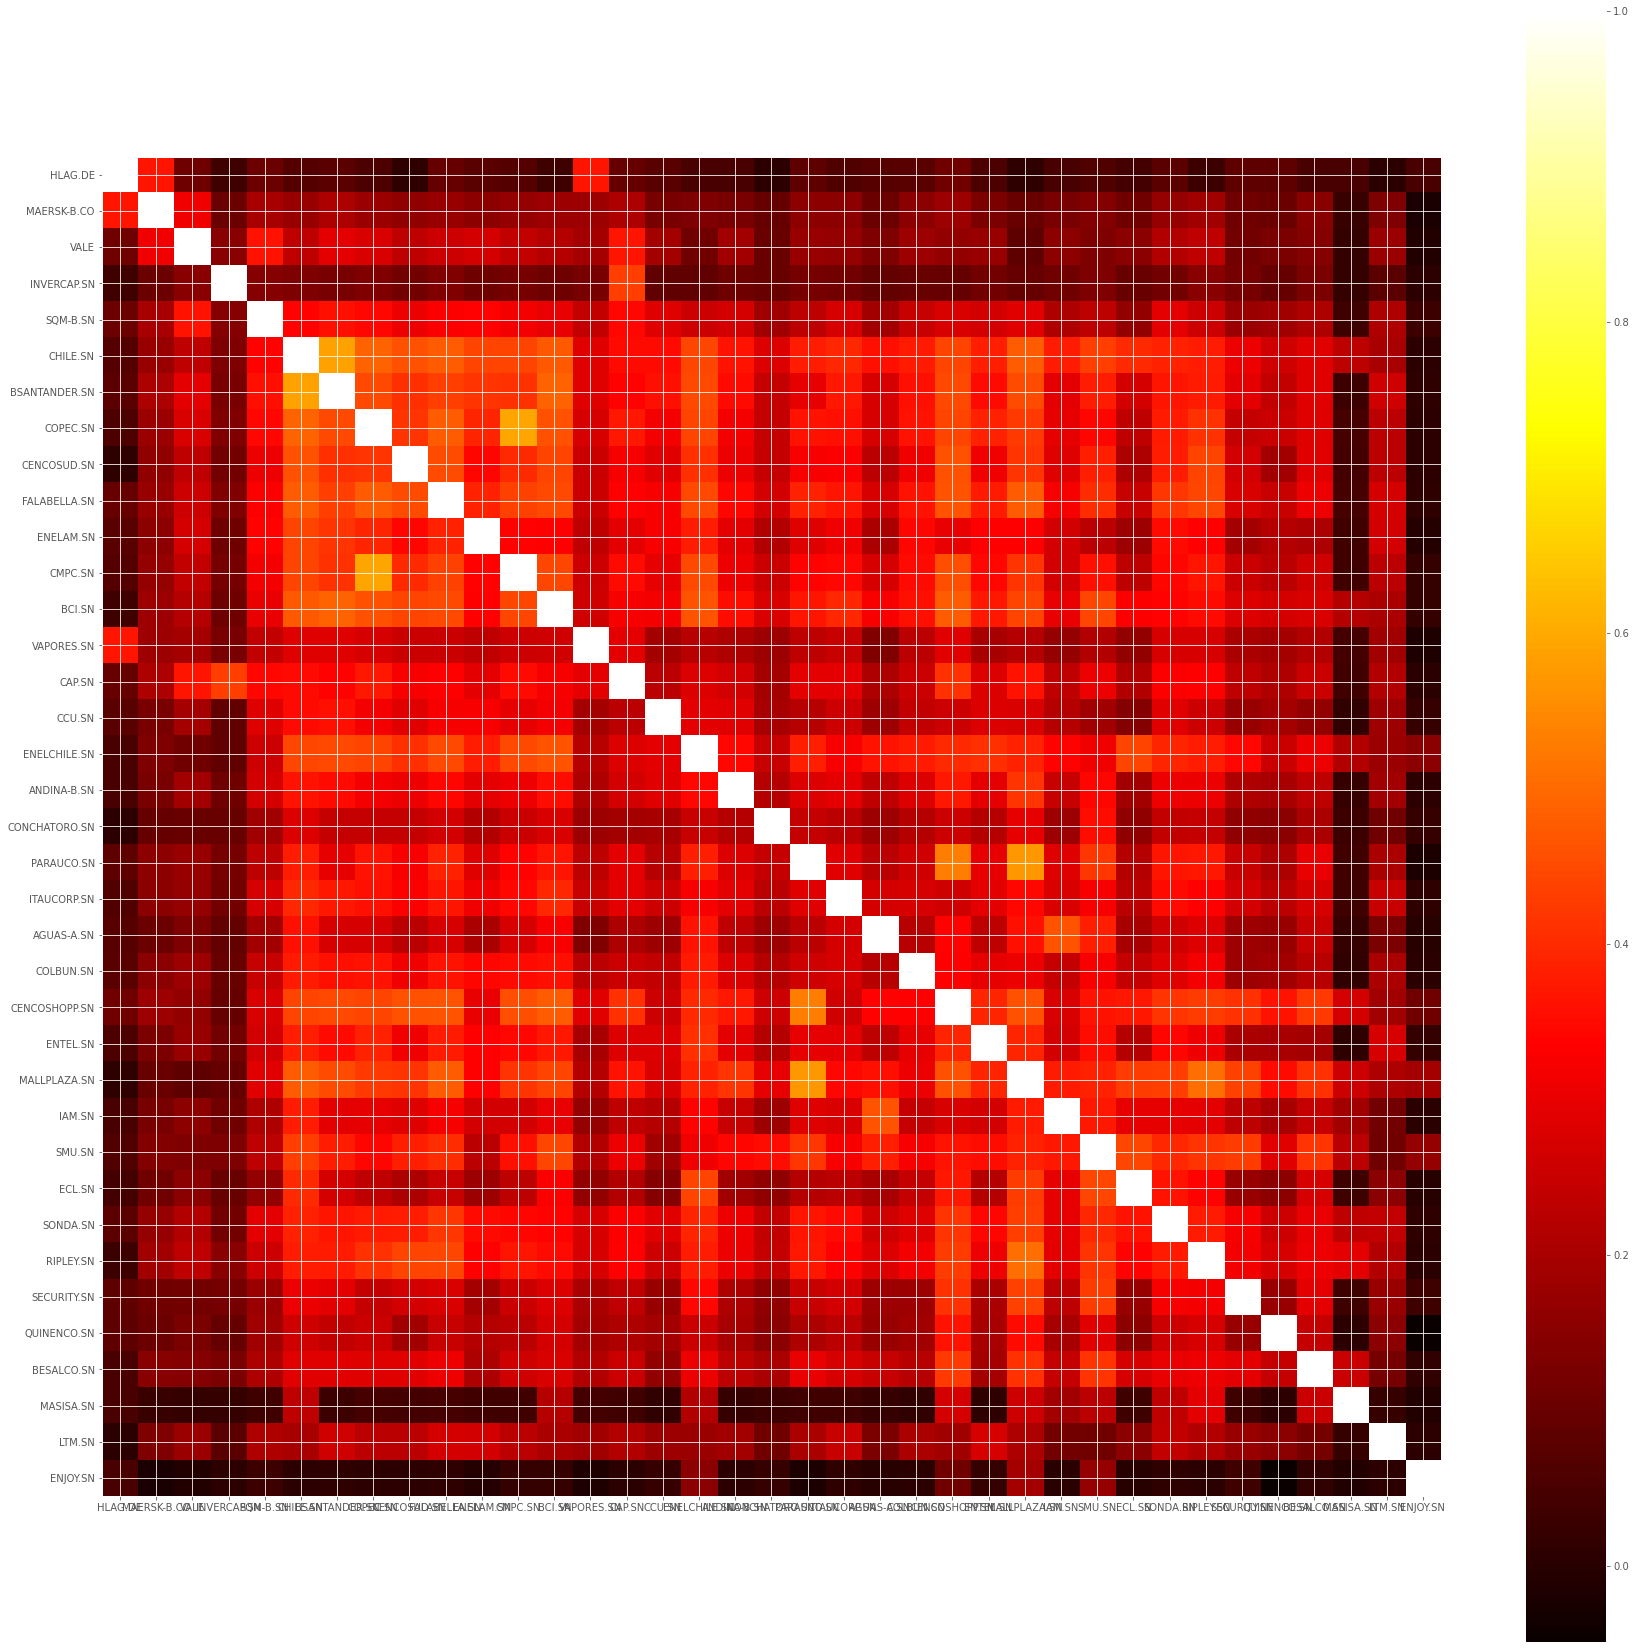

In [21]:
plt.imshow(corr, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);

[texto del vínculo](https://)## Stocks mean and Risk calculation
Which stocks are risky and bearing returns

Kurtosis and skewness

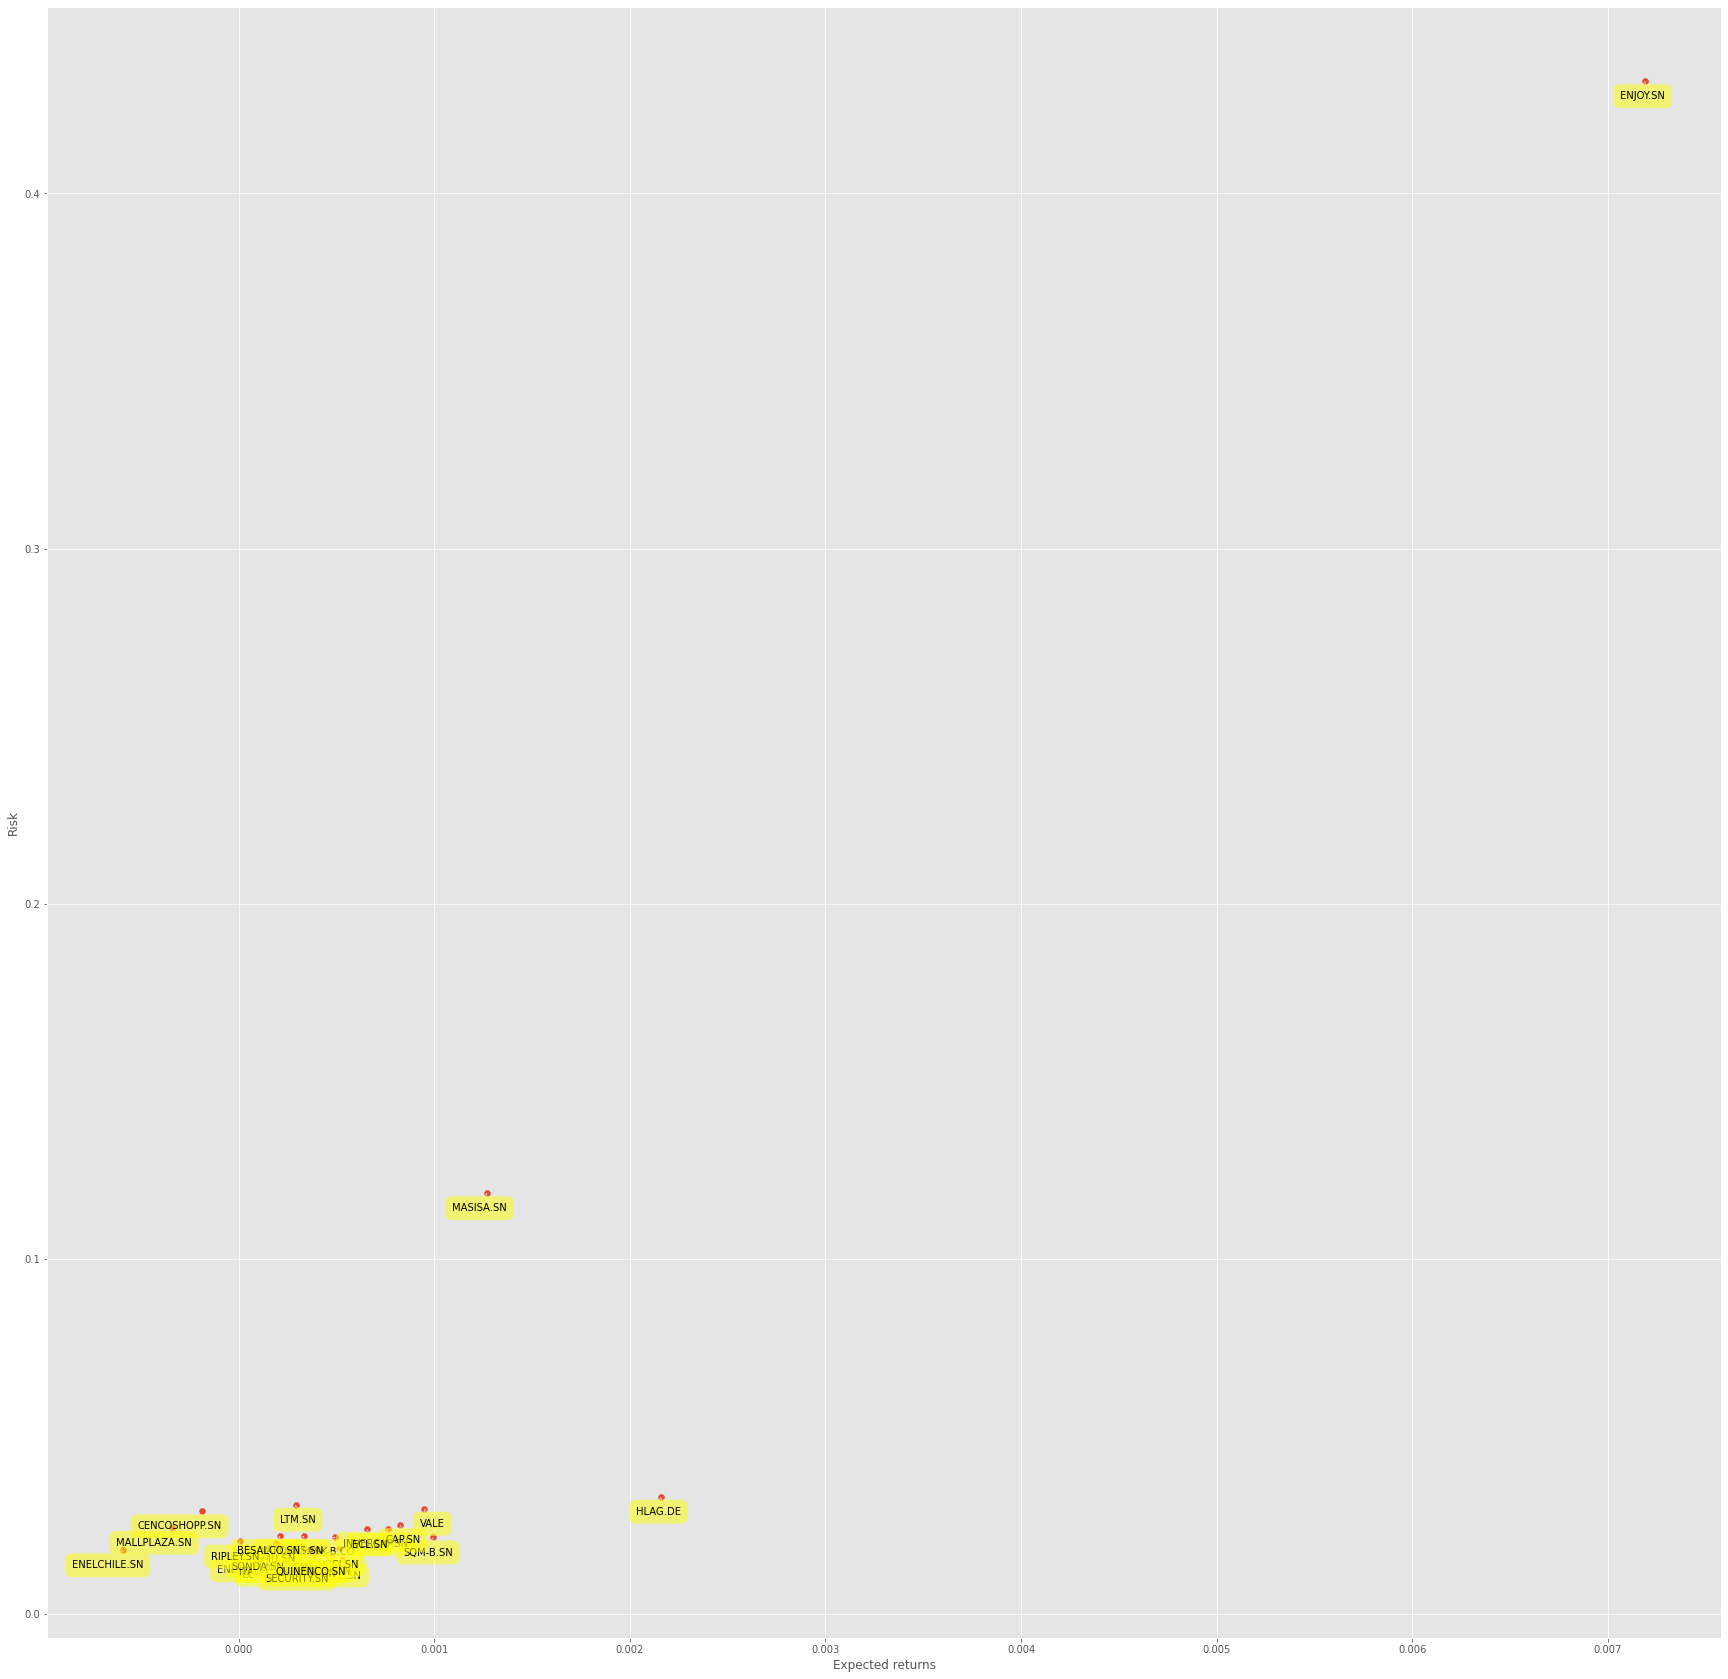

In [22]:
plt.scatter(retscomp.mean(), retscomp.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(retscomp.columns, retscomp.mean(), retscomp.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.7', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

# Predicting the stocks price

To predict the return of the stocks in the next period - Prediction analysis
* Simple Linear Analysis
* Quadratic Linear Analysis (QDA)
* K Nearest Neighbor (KNN)

But first, let us extract the necessary columns first from df:
* Adj Close
* Adj Volume
* HL Percentage
* PCT Change

In [23]:
df.head()

High         Low        Open       Close     Volume  \
Date                                                                    
2000-01-03  597.762390  592.941711  597.762390  597.762390    42628.0   
2000-01-04  588.121033  564.017700  573.659058  573.659058    84739.0   
2000-01-05  573.659058  559.197083  559.197083  559.197083  1732852.0   
2000-01-06  588.121033  554.694580  556.304688  556.304688   239800.0   
2000-01-07  573.659058  559.197083  573.659058  573.659058  1411319.0   

             Adj Close  
Date                    
2000-01-03  359.923798  
2000-01-04  345.410767  
2000-01-05  336.702911  
2000-01-06  334.961365  
2000-01-07  345.410767

In [24]:
dfreg = df.loc[:,['Adj Close','Volume']]
dfreg['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0
dfreg.head()

Adj Close     Volume    HL_PCT  PCT_change
Date                                                   
2000-01-03  359.923798    42628.0  0.806454         0.0
2000-01-04  345.410767    84739.0  4.201683         0.0
2000-01-05  336.702911  1732852.0  2.586204         0.0
2000-01-06  334.961365   239800.0  6.008659         0.0
2000-01-07  345.410767  1411319.0  2.521005         0.0

In [25]:
import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Drop missing value
dfreg.fillna(value=-99999, inplace=True)

print(dfreg.shape)
# We want to separate 1 percent of the data to forecast
forecast_out = int(math.ceil(0.01 * len(dfreg)))

# Separating the label here, we want to predict the AdjClose
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
X = np.array(dfreg.drop(['label'], 1))

# Scale the X so that everyone can have the same distribution for linear regression
X = preprocessing.scale(X)

# Finally We want to find Data Series of late X and early X (train) for model generation and evaluation
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

# Separate label and identify it as y
y = np.array(dfreg['label'])
y = y[:-forecast_out]

print('Dimension of X',X.shape)
print('Dimension of y',y.shape)

(5709, 4)
Dimension of X (5651, 4)
Dimension of y (5651,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  app.launch_new_instance()


In [26]:
# Separation of training and testing of model by cross validation train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Model Generation

* To predict the return of the stocks in the next period - Prediction analysis
    * Simple Linear Analysis
    * Quadratic Linear Analysis (QDA)
    * K Nearest Neighbor (KNN)

## Build the model

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import datetime


from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Linear regression
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(X_train, y_train)


# Quadratic Regression 2
clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(X_train, y_train)

# Quadratic Regression 3
clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(X_train, y_train)
    
# KNN Regression
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=2)

## Test the model

In [28]:
confidencereg = clfreg.score(X_test, y_test)
confidencepoly2 = clfpoly2.score(X_test,y_test)
confidencepoly3 = clfpoly3.score(X_test,y_test)
confidenceknn = clfknn.score(X_test, y_test)

print("The linear regression confidence is ",confidencereg)
print("The quadratic regression 2 confidence is ",confidencepoly2)
print("The quadratic regression 3 confidence is ",confidencepoly3)
print("The knn regression confidence is ",confidenceknn)

The linear regression confidence is  0.9355133210883718
The quadratic regression 2 confidence is  0.9373749388763124
The quadratic regression 3 confidence is  0.9356934952592594
The knn regression confidence is  0.9326858575730087


This means that the linear regression holds the most accuracy of it as being linear and justify the trend of stocks as being linear most of the times. 

However this does not mean we can just put stocks in it. There are still many issues to consider, especially with different companies that have different price trajectories over time. Google really is very linear: Up and to the right. Many companies aren't, so keep this in mind. 

We need to plot out the graph to make the most sense of it 

In [29]:
# Printing the forecast

forecast_set = clfreg.predict(X_lately)
dfreg['Forecast'] = np.nan
print(forecast_set, confidencereg, forecast_out)

[2083.88739441 2086.76108008 2104.48121324 2094.26511358 2095.3558904
 2054.31338729 2091.9715731  2130.10223876 2193.79654879 2246.75399638
 2177.4530282  2219.32194841 2182.53174149 2170.53656494 2290.06453119
 2256.50906132 2244.45348914 2271.95224271 2254.19153697 2285.77000266
 2284.77255344 2421.03048049 2422.45869413 2449.27378476 2443.21434039
 2483.58465648 2462.14703337 2576.54648376 2660.08406472 2736.23725183
 2745.33628478 2792.82177903 2760.72234466 2750.79509622 2724.39871777
 2722.45843786 2794.56198105 2777.52589954 2785.89788336 2689.39028252
 2558.01423342 2529.11595079 2560.43921815 2461.14998803 2528.39628119
 2550.82885834 2585.92390738 2506.10939779 2455.4887378  2404.53836598
 2422.10243021 2351.48493822 2302.63144593 2290.8456601  2281.13484596
 2297.56180599 2316.39116372 2365.39299319] 0.9355133210883718 58


# Plotting the Prediction

In [30]:
last_date = dfreg.iloc[-1].name
last_unix = last_date
next_unix = last_unix + datetime.timedelta(days=1)

for i in forecast_set:
    next_date = next_unix
    next_unix += datetime.timedelta(days=1)
    dfreg.loc[next_date] = [np.nan for _ in range(len(dfreg.columns)-1)]+[i]

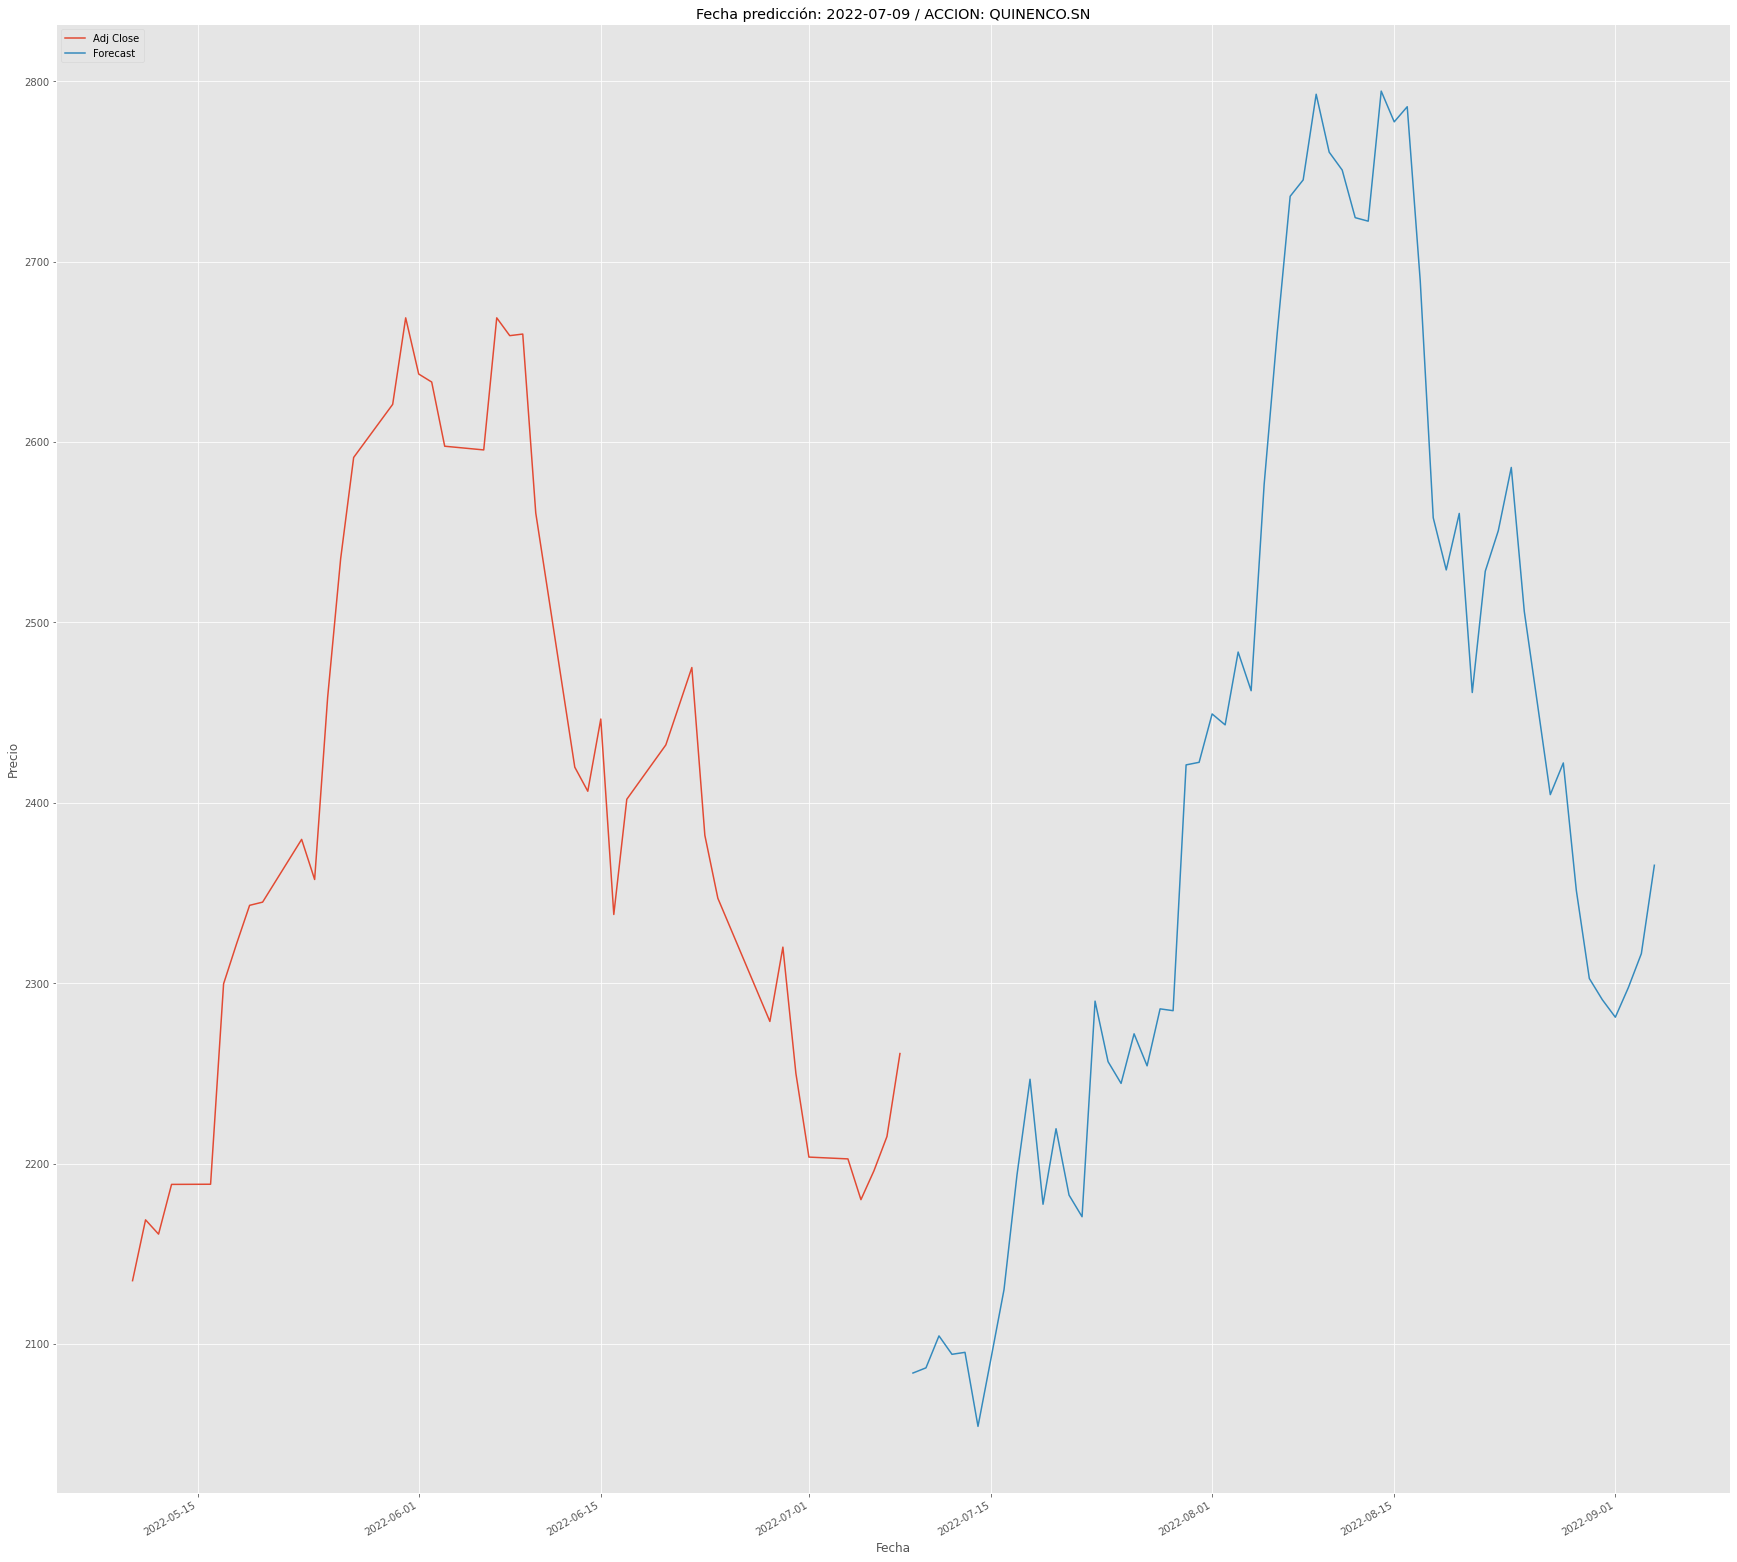

In [31]:
dfreg['Adj Close'].tail(100).plot()
dfreg['Forecast'].tail(100).plot()
plt.legend(loc=2)
plt.xlabel('Fecha')
plt.ylabel('Precio')
current_date = datetime.date.today()
plt.title("Fecha predicción: "+str(current_date) +" / ACCION: "+ str(accion_predecir))
plt.show()

# Challenges (To Be Continued):
* Assuming economic qualitative factors such as news (news sourcing and sentimental analysis)
* Assuming economic quantitative factors such as HPI of a certain country, economic inequality among origin of company
* Cleaning out the data
* Importing data files

# Next lesson:
## Lesson 4 Basic Python for Data Analytics (Predicting Employee Retention)

# Python: How to Get Live Market Data (Less Than 0.1-Second Lag).
This article is going to be a bit special. I am going to test the latest release from Yahoo Finance API for Python, which provide the possibility to get live data with less than a second lag for free.

Before to start
First of all, if you want to track my progress and before to start, you will need to have installed on your machine a Python 3 version and the following packages:
Pandas
NumPy
Yfinance
Plotly (Not mandatory, but useful for plotting)
If any of these packages are not already installed, you can use the pip command, as shown below.

In [32]:
!pip install yfinance
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Once you have ensured that the following packages are installed, we can start.
If you already have experience with Python, you can jump to the second step. The first step will consist of importing data.
I. Import package
The first step will consist of importing the necessary packages.
You will start by importing your packages previously installed by using the following lines of code:

In [33]:
# Raw Package
import numpy as np
import pandas as pd

#Data Source
import yfinance as yf

#Data viz
import plotly.graph_objs as go


def print_real_time(accion_predecirss):
  #Interval required 1 minute
  accion = accion_predecirss
  data = yf.download(tickers=accion, period='1d', interval='1m')

  #declare figure
  fig = go.Figure()


  #Candlestick
  fig.add_trace(go.Candlestick(x=data.index,
                  open=data['Open'],
                  high=data['High'],
                  low=data['Low'],
                  close=data['Close'], name = 'market data'))

  # Add titles
  fig.update_layout(
      title='EVOLUCIÓN EN VIVO DEL PRECIO DE LA ACCIÓN: '+accion,
      yaxis_title='PRECIO DE LAS ACCION ' + accion)

  # X-Axes
  fig.update_xaxes(
      rangeslider_visible=True,
      rangeselector=dict(
          buttons=list([
              dict(count=15, label="15m", step="minute", stepmode="backward"),
              dict(count=45, label="45m", step="minute", stepmode="backward"),
              dict(count=1, label="HTD", step="hour", stepmode="todate"),
              dict(count=3, label="3h", step="hour", stepmode="backward"),
              dict(step="all")
          ])
      )
  )

  #Show
  fig.show()

  #while True:
    #print(data)

for count, value in enumerate(ipsa):
  print("*********************************************************")
  print(count, value)
  print_real_time(value)
  print("*********************************************************")


*********************************************************
0 HLAG.DE
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
1 MAERSK-B.CO
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
2 VALE
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
3 INVERCAP.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
4 SQM-B.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
5 CHILE.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
6 BSANTANDER.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
7 COPEC.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
8 CENCOSUD.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
9 FALABELLA.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
10 ENELAM.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
11 CMPC.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
12 BCI.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
13 VAPORES.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
14 CAP.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
15 CCU.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
16 ENELCHILE.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
17 ANDINA-B.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
18 CONCHATORO.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
19 PARAUCO.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
20 ITAUCORP.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
21 AGUAS-A.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
22 COLBUN.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
23 CENCOSHOPP.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
24 ENTEL.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
25 MALLPLAZA.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
26 IAM.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
27 SMU.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
28 ECL.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
29 SONDA.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
30 RIPLEY.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
31 SECURITY.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
32 QUINENCO.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
33 BESALCO.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
34 MASISA.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
35 LTM.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************
*********************************************************
36 ENJOY.SN
[*********************100%***********************]  1 of 1 completed


*********************************************************


In [34]:
def make_forecast(ticker, periods, hist='max'):
    """
    forecast the given ticker (stock) period days into the future (from today)

    inputs
    ------
    > ticker
        >> ticker of stock to forecast
    > periods
        >> number of days into the future to forecast (from today's date)
    > hist
        >> amount of historical data to consider
            > default: max
            > options: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
    """
    # pull historical data from yahoo finance
    stock_data = yf.Ticker(ticker)

    hist_data = stock_data.history(hist, auto_adjust=True)

    # create new dataframe to hold dates (ds) & adjusted closing prices (y)
    df = pd.DataFrame()

    df['ds'] = hist_data.index.values
    df['y'] = hist_data['Close'].values

    # create a Prophet model from that data
    m = Prophet(daily_seasonality=False)
    m.fit(df)

    future = m.make_future_dataframe(periods, freq='D')

    forecast = m.predict(future)

    m.plot(forecast)

    #return forecast

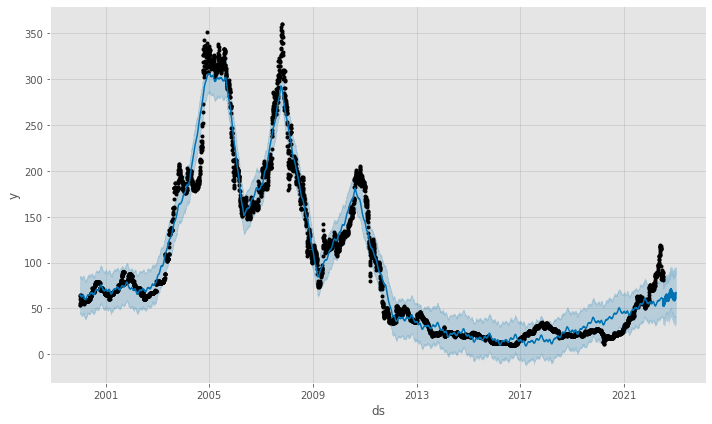

In [35]:
from fbprophet import Prophet

m = Prophet(daily_seasonality=False)



# kkr real estate finance trust
make_forecast('VAPORES.SN', 180)